<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-2---Introduction" data-toc-modified-id="Notebook-2---Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook 2 - Introduction</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Data-Reduction-Function" data-toc-modified-id="Data-Reduction-Function-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Data Reduction Function</a></span></li><li><span><a href="#Set-up-X-and-y" data-toc-modified-id="Set-up-X-and-y-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Set up X and y</a></span></li><li><span><a href="#Time-Series-Split" data-toc-modified-id="Time-Series-Split-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Time Series Split</a></span></li><li><span><a href="#Scaling-Training-Set-and-Test-Set" data-toc-modified-id="Scaling-Training-Set-and-Test-Set-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Scaling Training Set and Test Set</a></span></li><li><span><a href="#Initial-MLPRegressor-Evaluation" data-toc-modified-id="Initial-MLPRegressor-Evaluation-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Initial MLPRegressor Evaluation</a></span><ul class="toc-item"><li><span><a href="#Loss-vs.-Iteration-Analysis" data-toc-modified-id="Loss-vs.-Iteration-Analysis-1.0.5.1"><span class="toc-item-num">1.0.5.1&nbsp;&nbsp;</span>Loss vs. Iteration Analysis</a></span></li></ul></li><li><span><a href="#MLPRegressor-Grid-Search----Best-Parameters-and-Run-Time" data-toc-modified-id="MLPRegressor-Grid-Search----Best-Parameters-and-Run-Time-1.0.6"><span class="toc-item-num">1.0.6&nbsp;&nbsp;</span>MLPRegressor Grid Search -  Best Parameters and Run Time</a></span></li><li><span><a href="#MLP-Grid-Search-Evaluation" data-toc-modified-id="MLP-Grid-Search-Evaluation-1.0.7"><span class="toc-item-num">1.0.7&nbsp;&nbsp;</span>MLP Grid Search Evaluation</a></span></li><li><span><a href="#MLPRegressor---200-Iterations-with-&quot;Optimized-Parameters&quot;" data-toc-modified-id="MLPRegressor---200-Iterations-with-&quot;Optimized-Parameters&quot;-1.0.8"><span class="toc-item-num">1.0.8&nbsp;&nbsp;</span>MLPRegressor - 200 Iterations with "Optimized Parameters"</a></span></li></ul></li><li><span><a href="#RFR---Submission" data-toc-modified-id="RFR---Submission-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>RFR - Submission</a></span><ul class="toc-item"><li><span><a href="#Transform-Test_Data" data-toc-modified-id="Transform-Test_Data-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Transform Test_Data</a></span></li><li><span><a href="#Fit-RFR-on-Full-training_data-from-WiDS" data-toc-modified-id="Fit-RFR-on-Full-training_data-from-WiDS-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Fit RFR on Full training_data from WiDS</a></span></li></ul></li></ul></li><li><span><a href="#Notebook-2-Conclusion" data-toc-modified-id="Notebook-2-Conclusion-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook 2 Conclusion</a></span></li></ul></div>

# Notebook 2 - Introduction
Workflow Initial MLPRegressor --> MLPRegressor Optimization --> MLPR vs. RFR Comparison--> RFR Baseline WiDS Submission

We have refined our ability to prepare and evaluate models in this notebook.  We adopted a data reduction strategy to reduce each parameter's data type to minimize memory load and run times. We will run our MLPRegressor on Google Collab and on my local machine to compare run times to establish more efficient methodology moving forward. 

We will optimize a Multi-layer Perceptron Regressor(MLPR or MLPRegressor) as they have shown success in predictive modeling with times-series data. We will compare our scoring metrics from the MLPRegressor to our optimized Random Forest Regressor(RFR) from Notebook 1. 

We will make a submission to WiDS Kaggle Submission page to give ourselves a true baseline to improve upon moving forward on this project. 

In [1]:
#Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from math import sqrt

In [2]:
#Import scoring metrics
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [3]:
# Read in clean training set with start date as datetime index
time_training_data = pd.read_csv('data/time_training_data_clean.csv', index_col='startdate')

In [4]:
time_training_data.head()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,Csb,Dfa,Dfb,Dfc,Dsb,Dsc,Dwa,Dwb,month_number,season_number
startdate,,,,,,,,,,,,,,,,,,,,,
2014-09-01,0,0.000000,0.833333,237.00,29.02,31.64,29.57,30.73,29.71,31.52,...,0,0,0,0,0,0,0,0,9,4
2014-09-01,290938,0.818182,0.633333,323.63,24.18,26.75,21.09,23.43,21.15,24.08,...,0,0,0,0,0,0,0,0,9,4
2014-09-01,35819,0.227273,0.900000,385.92,31.16,32.19,33.26,29.80,28.08,33.64,...,0,0,0,0,0,0,0,0,9,4
2014-09-01,290207,0.818182,0.600000,303.36,23.34,25.66,20.46,23.00,21.76,24.03,...,0,0,0,0,0,0,0,0,9,4
2014-09-01,289476,0.818182,0.566667,319.97,22.50,24.57,19.67,22.34,21.61,21.83,...,0,0,0,0,0,0,0,0,9,4


In [5]:
time_training_data.dtypes

index                                   int64
lat                                   float64
lon                                   float64
contest-pevpr-sfc-gauss-14d__pevpr    float64
nmme0-tmp2m-34w__cancm30              float64
                                       ...   
Dsc                                     int64
Dwa                                     int64
Dwb                                     int64
month_number                            int64
season_number                           int64
Length: 261, dtype: object

In [6]:
#Change index of startdate to date time
time_training_data.index =  pd.to_datetime(time_training_data.index)

### Data Reduction Function
- We will reduce run times of models using this data reduction function converting all data types to the data type of lowest memory usage.
- Function acquired from my esteemed teammate in the contest Daniel Logan.

In [7]:
#Function acquired from Daniel Logan - WiDS teammate
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [8]:
time_training_data = reduce_mem_usage(time_training_data)

Mem. usage decreased to 355.46 Mb (52.7% reduction)


We were able to reduce our data set by 52.7% in memory usage.

### Set up X and y
- X - All features but our target
- y - Our target `contest-tmp2m-14d__tmp2m`

In [9]:
# Set up independent variables of all columns except target
X = time_training_data.drop(['contest-tmp2m-14d__tmp2m'], axis = 1)

In [10]:
# Set up array for target data - dependent variable
y = time_training_data['contest-tmp2m-14d__tmp2m']

In [11]:
# Check
X.shape

(375734, 260)

In [12]:
y.shape

(375734,)

### Time Series Split
- We will run the TimeSeriesSplit to set up our training and test data or really our train and validation data as our real test set will be used for our submission to the WiDS Datathon. 
- This TimeSeriesSplit method was used for our train test split for the Random Forest Regressor in the last notebook. 

In [13]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neural_network import MLPRegressor

In [63]:
for train_idx, test_idx in TimeSeriesSplit(n_splits=5).split(X):
    X_train, X_test = X.iloc[train_idx, :], X.iloc[test_idx,:]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [64]:
#Check
X_train

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,Csb,Dfa,Dfb,Dfc,Dsb,Dsc,Dwa,Dwb,month_number,season_number
startdate,,,,,,,,,,,,,,,,,,,,,
2014-09-01,0,0.000000,0.833333,237.000000,29.020000,31.639999,29.570000,30.730000,29.709999,31.520000,...,0,0,0,0,0,0,0,0,9,4
2014-09-01,290938,0.818182,0.633333,323.630005,24.180000,26.750000,21.090000,23.430000,21.150000,24.080000,...,0,0,0,0,0,0,0,0,9,4
2014-09-01,35819,0.227273,0.900000,385.920013,31.160000,32.189999,33.259998,29.799999,28.080000,33.639999,...,0,0,0,0,0,0,0,0,9,4
2014-09-01,290207,0.818182,0.600000,303.359985,23.340000,25.660000,20.459999,23.000000,21.760000,24.030001,...,0,0,0,0,0,0,0,0,9,4
2014-09-01,289476,0.818182,0.566667,319.970001,22.500000,24.570000,19.670000,22.340000,21.610001,21.830000,...,0,0,0,0,0,0,0,0,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-02,285699,0.818182,0.366667,235.639999,3.780000,4.280000,0.080000,2.670000,4.260000,0.010000,...,0,0,0,0,0,0,0,0,5,2
2016-05-02,49586,0.272727,0.733333,573.750000,16.160000,18.850000,15.110000,17.620001,17.250000,16.350000,...,0,0,0,0,0,0,0,0,5,2
2016-05-02,306167,0.863636,0.400000,202.020004,3.760000,3.940000,0.680000,3.540000,5.380000,2.650000,...,0,0,0,0,0,0,0,0,5,2


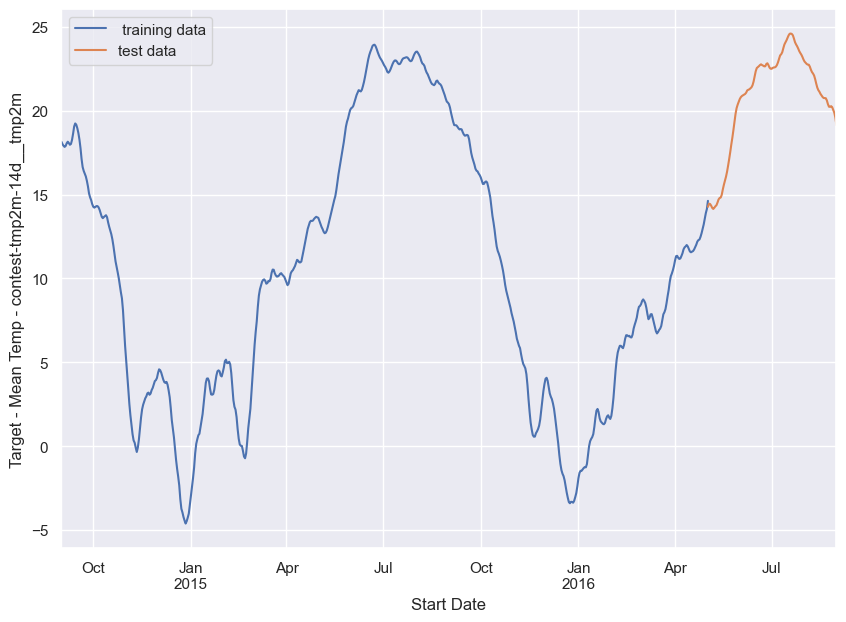

In [65]:
#Visualize test set - Make sure testing data is after training data.
plt.figure()
sns.set(rc={'figure.figsize':(10,7)})
y_train.groupby('startdate').mean().plot(label=' training data')
y_test.groupby('startdate').mean().plot(label = 'test data')
plt.xlabel('Start Date')
plt.ylabel('Target - Mean Temp - contest-tmp2m-14d__tmp2m')
plt.legend()
plt.show()

### Scaling Training Set and Test Set
- Unlike the Random Forest Regressor model in Notebook 1, we will need to scale our data for the MLPRegressor. 
- We will move ahead with a standard scale.
- Scaling was carried out after the train test split or TimeSeriesSplit to prevent data leakage caused by scaling data set together. 

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [68]:
%%time
#Instantiate
MLPmodel = MLPRegressor(verbose = 1, random_state = 32)
#Fit Model
MLPmodel.fit(X_trainscaled, y_train)
print(MLPmodel)

Iteration 1, loss = 2.04532533
Iteration 2, loss = 0.39310842
Iteration 3, loss = 0.32106602
Iteration 4, loss = 0.28316622
Iteration 5, loss = 0.26270250
Iteration 6, loss = 0.24549686
Iteration 7, loss = 0.23248149
Iteration 8, loss = 0.22277903
Iteration 9, loss = 0.21456016
Iteration 10, loss = 0.20773738
Iteration 11, loss = 0.20164685
Iteration 12, loss = 0.19679936
Iteration 13, loss = 0.19283130
Iteration 14, loss = 0.18799976
Iteration 15, loss = 0.18445011
Iteration 16, loss = 0.18186433
Iteration 17, loss = 0.17850235
Iteration 18, loss = 0.17571395
Iteration 19, loss = 0.17379656
Iteration 20, loss = 0.17130016
Iteration 21, loss = 0.16885780
Iteration 22, loss = 0.16706870
Iteration 23, loss = 0.16405897
Iteration 24, loss = 0.16283499
Iteration 25, loss = 0.16018233
Iteration 26, loss = 0.15931057
Iteration 27, loss = 0.15841832
Iteration 28, loss = 0.15551032
Iteration 29, loss = 0.15468517
Iteration 30, loss = 0.15318294
Iteration 31, loss = 0.15269531
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [59]:
# Get Predictions from MLP Model with scaled training data
pred = MLPmodel.predict(X_testscaled)

In [60]:
# Gather results in dataframe for visualization of expected vs. predictions
results_MLP = pd.DataFrame(data = {'Actual':y_test, \
                                   'Predictions':pred}, index=y_test.index)

In [61]:
results_MLP

,Actual,Predictions
startdate,,
2016-01-01,8.568278,7.288152
2016-01-01,10.872447,10.716764
2016-01-01,-7.024219,-7.287463
2016-01-01,-6.184810,-5.734422
2016-01-01,9.002110,8.020726
...,...,...
2016-08-31,19.772009,12.712725
2016-08-31,19.998930,12.922713
2016-08-31,20.392469,12.926745


In [62]:
# Error Metrics for initial MLP
print('R-squared = {:.3f}'.format(r2_score(results_MLP['Actual'],results_MLP['Predictions'])))
print('RMSE = {:.3f}'.format(sqrt(mean_squared_error(results_MLP['Actual'],results_MLP['Predictions'])))) 

R-squared = 0.851
RMSE = 3.662


### Initial MLPRegressor Evaluation
Alright we are getting reasonable results when scaling the data.  These metrics are not better than our Random Forest Regressor in the last notebook.  We will try to optimize the MLPRegressor with a grid search and hope to get better scoring metrics. Initial MLPRegressor using Google Collab took 31min 43s. With Jupyter Notebooks on my cpu, the run time was 13 min 24s.  

**Optimized RFR**
- R-squared = 0.909
- RMSE = 1.694

**MLPR - Initial attempt** -- 5 splits on Times Series split - With smaller test set in May-Aug 2016
- R-squared = 0.828
- RMSE = 2.327

**MLPR - Initial attempt** -- 2 splits on Times Series split - With larger test set in Jan-
- R-squared = 0.851
- RMSE = 3.662

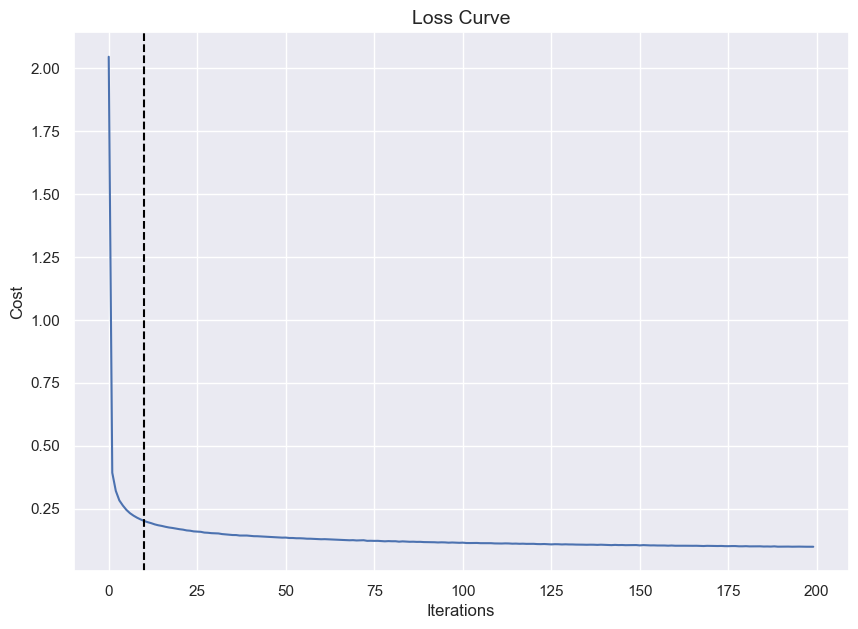

In [60]:
plt.figure()
sns.set(rc={'figure.figsize':(10,7)})
plt.plot(MLPmodel.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.axvline(x=10, color = 'black', linestyle = '--')
plt.show()

#### Loss vs. Iteration Analysis
- Ther is a significant reduction in loss within the first 5-10 interations of our MLPRegressor.  Then, there is a incremental improvement in loss until iteration 100 where the model loss plateaus more or less.

In [22]:
#Set up Grid Search to tune hyper parameters of MLPR
MLPmodel = MLPRegressor(verbose = 1, random_state = 32)

param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [23]:
%%time
from sklearn.model_selection import GridSearchCV

tscv = TimeSeriesSplit(n_splits=2)

MLPgrid = GridSearchCV(MLPmodel, param_grid, cv=tscv)
MLPgrid.fit(X_trainscaled, y_train)

Iteration 1, loss = 1.83822557
Iteration 2, loss = 0.38234857
Iteration 3, loss = 0.30971924
Iteration 4, loss = 0.27343127
Iteration 5, loss = 0.25038407
Iteration 6, loss = 0.23341592
Iteration 7, loss = 0.22035070
Iteration 8, loss = 0.20983228
Iteration 9, loss = 0.20058795
Iteration 10, loss = 0.19276502
Iteration 11, loss = 0.18529484
Iteration 12, loss = 0.17880647
Iteration 13, loss = 0.17340267
Iteration 14, loss = 0.16801613
Iteration 15, loss = 0.16331782
Iteration 16, loss = 0.15915049
Iteration 17, loss = 0.15488190
Iteration 18, loss = 0.15097114
Iteration 19, loss = 0.14787599
Iteration 20, loss = 0.14459589
Iteration 21, loss = 0.14132549
Iteration 22, loss = 0.13841173
Iteration 23, loss = 0.13531648
Iteration 24, loss = 0.13320000
Iteration 25, loss = 0.13094294
Iteration 26, loss = 0.12820895
Iteration 27, loss = 0.12551969
Iteration 28, loss = 0.12396192
Iteration 29, loss = 0.12183486
Iteration 30, loss = 0.11962543
Iteration 31, loss = 0.11754387
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.65712022
Iteration 2, loss = 0.36470407
Iteration 3, loss = 0.30452285
Iteration 4, loss = 0.27045975
Iteration 5, loss = 0.24792828
Iteration 6, loss = 0.23021757
Iteration 7, loss = 0.21649479
Iteration 8, loss = 0.20523018
Iteration 9, loss = 0.19564704
Iteration 10, loss = 0.18757568
Iteration 11, loss = 0.18024403
Iteration 12, loss = 0.17386408
Iteration 13, loss = 0.16794808
Iteration 14, loss = 0.16240636
Iteration 15, loss = 0.15726358
Iteration 16, loss = 0.15280309
Iteration 17, loss = 0.14839971
Iteration 18, loss = 0.14455465
Iteration 19, loss = 0.14062162
Iteration 20, loss = 0.13757709
Iteration 21, loss = 0.13383076
Iteration 22, loss = 0.13083802
Iteration 23, loss = 0.12800712
Iteration 24, loss = 0.12513527
Iteration 25, loss = 0.12258032
Iteration 26, loss = 0.12028404
Iteration 27, loss = 0.11771438
Iteration 28, loss = 0.11552761
Iteration 29, loss = 0.11361252
Iteration 30, loss = 0.11143448
Iteration 31, loss = 0.10959984
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 4.21784197
Iteration 2, loss = 0.53670990
Iteration 3, loss = 0.32140394
Iteration 4, loss = 0.24923310
Iteration 5, loss = 0.21409960
Iteration 6, loss = 0.19272404
Iteration 7, loss = 0.17377965
Iteration 8, loss = 0.16108912
Iteration 9, loss = 0.14856481
Iteration 10, loss = 0.14043594
Iteration 11, loss = 0.13118614
Iteration 12, loss = 0.12484687
Iteration 13, loss = 0.12000148
Iteration 14, loss = 0.10961677
Iteration 15, loss = 0.10642682
Iteration 16, loss = 0.10027691
Iteration 17, loss = 0.09821414
Iteration 18, loss = 0.09437600
Iteration 19, loss = 0.08920445
Iteration 20, loss = 0.08814140
Iteration 21, loss = 0.08420526
Iteration 22, loss = 0.08112398
Iteration 23, loss = 0.07370692
Iteration 24, loss = 0.07508614
Iteration 25, loss = 0.07178792
Iteration 26, loss = 0.07041007
Iteration 27, loss = 0.06694692
Iteration 28, loss = 0.06332870
Iteration 29, loss = 0.06449757
Iteration 30, loss = 0.06254968
Iteration 31, loss = 0.06126823
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.93073650
Iteration 2, loss = 0.45599182
Iteration 3, loss = 0.28886073
Iteration 4, loss = 0.22973905
Iteration 5, loss = 0.19478623
Iteration 6, loss = 0.17448536
Iteration 7, loss = 0.15844713
Iteration 8, loss = 0.14315497
Iteration 9, loss = 0.13503007
Iteration 10, loss = 0.12304589
Iteration 11, loss = 0.11667796
Iteration 12, loss = 0.10967141
Iteration 13, loss = 0.10258564
Iteration 14, loss = 0.09769300
Iteration 15, loss = 0.09387318
Iteration 16, loss = 0.08959938
Iteration 17, loss = 0.08463124
Iteration 18, loss = 0.08304690
Iteration 19, loss = 0.07924504
Iteration 20, loss = 0.07711107
Iteration 21, loss = 0.07460753
Iteration 22, loss = 0.07239511
Iteration 23, loss = 0.07043923
Iteration 24, loss = 0.06871954
Iteration 25, loss = 0.06685495
Iteration 26, loss = 0.06475883
Iteration 27, loss = 0.06324273
Iteration 28, loss = 0.06316966
Iteration 29, loss = 0.06188568
Iteration 30, loss = 0.05996672
Iteration 31, loss = 0.05889611
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.83822557
Iteration 2, loss = 0.38234857
Iteration 3, loss = 0.30971924
Iteration 4, loss = 0.27343127
Iteration 5, loss = 0.25038407
Iteration 6, loss = 0.23341592
Iteration 7, loss = 0.22035070
Iteration 8, loss = 0.20983228
Iteration 9, loss = 0.20058795
Iteration 10, loss = 0.19276502
Iteration 11, loss = 0.18529484
Iteration 12, loss = 0.17880647
Iteration 13, loss = 0.17340267
Iteration 14, loss = 0.16801613
Iteration 15, loss = 0.16331782
Iteration 16, loss = 0.15915049
Iteration 17, loss = 0.15488190
Iteration 18, loss = 0.15097114
Iteration 19, loss = 0.14787599
Iteration 20, loss = 0.14459589
Iteration 21, loss = 0.14132549
Iteration 22, loss = 0.13841173
Iteration 23, loss = 0.13531648
Iteration 24, loss = 0.13320000
Iteration 25, loss = 0.13094294
Iteration 26, loss = 0.12820895
Iteration 27, loss = 0.12551969
Iteration 28, loss = 0.12396192
Iteration 29, loss = 0.12183486
Iteration 30, loss = 0.11962543
Iteration 31, loss = 0.11754387
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.65712022
Iteration 2, loss = 0.36470407
Iteration 3, loss = 0.30452285
Iteration 4, loss = 0.27045975
Iteration 5, loss = 0.24792828
Iteration 6, loss = 0.23021757
Iteration 7, loss = 0.21649479
Iteration 8, loss = 0.20523018
Iteration 9, loss = 0.19564704
Iteration 10, loss = 0.18757568
Iteration 11, loss = 0.18024403
Iteration 12, loss = 0.17386408
Iteration 13, loss = 0.16794808
Iteration 14, loss = 0.16240636
Iteration 15, loss = 0.15726358
Iteration 16, loss = 0.15280309
Iteration 17, loss = 0.14839971
Iteration 18, loss = 0.14455465
Iteration 19, loss = 0.14062162
Iteration 20, loss = 0.13757709
Iteration 21, loss = 0.13383076
Iteration 22, loss = 0.13083802
Iteration 23, loss = 0.12800712
Iteration 24, loss = 0.12513527
Iteration 25, loss = 0.12258032
Iteration 26, loss = 0.12028404
Iteration 27, loss = 0.11771438
Iteration 28, loss = 0.11552761
Iteration 29, loss = 0.11361252
Iteration 30, loss = 0.11143448
Iteration 31, loss = 0.10959984
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 4.21784197
Iteration 2, loss = 0.53670990
Iteration 3, loss = 0.32140394
Iteration 4, loss = 0.24923310
Iteration 5, loss = 0.21409960
Iteration 6, loss = 0.19272404
Iteration 7, loss = 0.17377965
Iteration 8, loss = 0.16108912
Iteration 9, loss = 0.14856481
Iteration 10, loss = 0.14043594
Iteration 11, loss = 0.13118614
Iteration 12, loss = 0.12484687
Iteration 13, loss = 0.12000148
Iteration 14, loss = 0.10961677
Iteration 15, loss = 0.10642682
Iteration 16, loss = 0.10027691
Iteration 17, loss = 0.09821414
Iteration 18, loss = 0.09437600
Iteration 19, loss = 0.08920445
Iteration 20, loss = 0.08814140
Iteration 21, loss = 0.08420526
Iteration 22, loss = 0.08112398
Iteration 23, loss = 0.07370692
Iteration 24, loss = 0.07508614
Iteration 25, loss = 0.07178792
Iteration 26, loss = 0.07041007
Iteration 27, loss = 0.06694692
Iteration 28, loss = 0.06332870
Iteration 29, loss = 0.06449757
Iteration 30, loss = 0.06254968
Iteration 31, loss = 0.06126823
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.93073650
Iteration 2, loss = 0.45599182
Iteration 3, loss = 0.28886073
Iteration 4, loss = 0.22973905
Iteration 5, loss = 0.19478623
Iteration 6, loss = 0.17448536
Iteration 7, loss = 0.15844713
Iteration 8, loss = 0.14315497
Iteration 9, loss = 0.13503007
Iteration 10, loss = 0.12304589
Iteration 11, loss = 0.11667796
Iteration 12, loss = 0.10967141
Iteration 13, loss = 0.10258564
Iteration 14, loss = 0.09769300
Iteration 15, loss = 0.09387318
Iteration 16, loss = 0.08959938
Iteration 17, loss = 0.08463124
Iteration 18, loss = 0.08304690
Iteration 19, loss = 0.07924504
Iteration 20, loss = 0.07711107
Iteration 21, loss = 0.07460753
Iteration 22, loss = 0.07239511
Iteration 23, loss = 0.07043923
Iteration 24, loss = 0.06871954
Iteration 25, loss = 0.06685495
Iteration 26, loss = 0.06475883
Iteration 27, loss = 0.06324273
Iteration 28, loss = 0.06316966
Iteration 29, loss = 0.06188568
Iteration 30, loss = 0.05996672
Iteration 31, loss = 0.05889611
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.83822557
Iteration 2, loss = 0.38234857
Iteration 3, loss = 0.30971924
Iteration 4, loss = 0.27343127
Iteration 5, loss = 0.25038407
Iteration 6, loss = 0.23341592
Iteration 7, loss = 0.22035070
Iteration 8, loss = 0.20983228
Iteration 9, loss = 0.20058795
Iteration 10, loss = 0.19276502
Iteration 11, loss = 0.18529484
Iteration 12, loss = 0.17880647
Iteration 13, loss = 0.17340267
Iteration 14, loss = 0.16801613
Iteration 15, loss = 0.16331782
Iteration 16, loss = 0.15915049
Iteration 17, loss = 0.15488190
Iteration 18, loss = 0.15097114
Iteration 19, loss = 0.14787599
Iteration 20, loss = 0.14459589
Iteration 21, loss = 0.14132549
Iteration 22, loss = 0.13841173
Iteration 23, loss = 0.13531648
Iteration 24, loss = 0.13320000
Iteration 25, loss = 0.13094294
Iteration 26, loss = 0.12820895
Iteration 27, loss = 0.12551969
Iteration 28, loss = 0.12396192
Iteration 29, loss = 0.12183486
Iteration 30, loss = 0.11962543
Iteration 31, loss = 0.11754387
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.65712022
Iteration 2, loss = 0.36470407
Iteration 3, loss = 0.30452285
Iteration 4, loss = 0.27045975
Iteration 5, loss = 0.24792828
Iteration 6, loss = 0.23021757
Iteration 7, loss = 0.21649479
Iteration 8, loss = 0.20523018
Iteration 9, loss = 0.19564704
Iteration 10, loss = 0.18757568
Iteration 11, loss = 0.18024403
Iteration 12, loss = 0.17386408
Iteration 13, loss = 0.16794808
Iteration 14, loss = 0.16240636
Iteration 15, loss = 0.15726358
Iteration 16, loss = 0.15280309
Iteration 17, loss = 0.14839971
Iteration 18, loss = 0.14455465
Iteration 19, loss = 0.14062162
Iteration 20, loss = 0.13757709
Iteration 21, loss = 0.13383076
Iteration 22, loss = 0.13083802
Iteration 23, loss = 0.12800712
Iteration 24, loss = 0.12513527
Iteration 25, loss = 0.12258032
Iteration 26, loss = 0.12028404
Iteration 27, loss = 0.11771438
Iteration 28, loss = 0.11552761
Iteration 29, loss = 0.11361252
Iteration 30, loss = 0.11143448
Iteration 31, loss = 0.10959984
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 4.21784197
Iteration 2, loss = 0.53670990
Iteration 3, loss = 0.32140394
Iteration 4, loss = 0.24923310
Iteration 5, loss = 0.21409960
Iteration 6, loss = 0.19272404
Iteration 7, loss = 0.17377965
Iteration 8, loss = 0.16108912
Iteration 9, loss = 0.14856481
Iteration 10, loss = 0.14043594
Iteration 11, loss = 0.13118614
Iteration 12, loss = 0.12484687
Iteration 13, loss = 0.12000148
Iteration 14, loss = 0.10961677
Iteration 15, loss = 0.10642682
Iteration 16, loss = 0.10027691
Iteration 17, loss = 0.09821414
Iteration 18, loss = 0.09437600
Iteration 19, loss = 0.08920445
Iteration 20, loss = 0.08814140
Iteration 21, loss = 0.08420526
Iteration 22, loss = 0.08112398
Iteration 23, loss = 0.07370692
Iteration 24, loss = 0.07508614
Iteration 25, loss = 0.07178792
Iteration 26, loss = 0.07041007
Iteration 27, loss = 0.06694692
Iteration 28, loss = 0.06332870
Iteration 29, loss = 0.06449757
Iteration 30, loss = 0.06254968
Iteration 31, loss = 0.06126823
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.93073650
Iteration 2, loss = 0.45599182
Iteration 3, loss = 0.28886073
Iteration 4, loss = 0.22973905
Iteration 5, loss = 0.19478623
Iteration 6, loss = 0.17448536
Iteration 7, loss = 0.15844713
Iteration 8, loss = 0.14315497
Iteration 9, loss = 0.13503007
Iteration 10, loss = 0.12304589
Iteration 11, loss = 0.11667796
Iteration 12, loss = 0.10967141
Iteration 13, loss = 0.10258564
Iteration 14, loss = 0.09769300
Iteration 15, loss = 0.09387318
Iteration 16, loss = 0.08959938
Iteration 17, loss = 0.08463124
Iteration 18, loss = 0.08304690
Iteration 19, loss = 0.07924504
Iteration 20, loss = 0.07711107
Iteration 21, loss = 0.07460753
Iteration 22, loss = 0.07239511
Iteration 23, loss = 0.07043923
Iteration 24, loss = 0.06871954
Iteration 25, loss = 0.06685495
Iteration 26, loss = 0.06475883
Iteration 27, loss = 0.06324273
Iteration 28, loss = 0.06316966
Iteration 29, loss = 0.06188568
Iteration 30, loss = 0.05996672
Iteration 31, loss = 0.05889611
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.83822557
Iteration 2, loss = 0.38234857
Iteration 3, loss = 0.30971924
Iteration 4, loss = 0.27343127
Iteration 5, loss = 0.25038407
Iteration 6, loss = 0.23341592
Iteration 7, loss = 0.22035070
Iteration 8, loss = 0.20983228
Iteration 9, loss = 0.20058795
Iteration 10, loss = 0.19276502
Iteration 11, loss = 0.18529484
Iteration 12, loss = 0.17880647
Iteration 13, loss = 0.17340267
Iteration 14, loss = 0.16801613
Iteration 15, loss = 0.16331782
Iteration 16, loss = 0.15915049
Iteration 17, loss = 0.15488190
Iteration 18, loss = 0.15097114
Iteration 19, loss = 0.14787599
Iteration 20, loss = 0.14459589
Iteration 21, loss = 0.14132549
Iteration 22, loss = 0.13841173
Iteration 23, loss = 0.13531648
Iteration 24, loss = 0.13320000
Iteration 25, loss = 0.13094294
Iteration 26, loss = 0.12820895
Iteration 27, loss = 0.12551969
Iteration 28, loss = 0.12396192
Iteration 29, loss = 0.12183486
Iteration 30, loss = 0.11962543
Iteration 31, loss = 0.11754387
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.65712022
Iteration 2, loss = 0.36470407
Iteration 3, loss = 0.30452285
Iteration 4, loss = 0.27045975
Iteration 5, loss = 0.24792828
Iteration 6, loss = 0.23021757
Iteration 7, loss = 0.21649479
Iteration 8, loss = 0.20523018
Iteration 9, loss = 0.19564704
Iteration 10, loss = 0.18757568
Iteration 11, loss = 0.18024403
Iteration 12, loss = 0.17386408
Iteration 13, loss = 0.16794808
Iteration 14, loss = 0.16240636
Iteration 15, loss = 0.15726358
Iteration 16, loss = 0.15280309
Iteration 17, loss = 0.14839971
Iteration 18, loss = 0.14455465
Iteration 19, loss = 0.14062162
Iteration 20, loss = 0.13757709
Iteration 21, loss = 0.13383076
Iteration 22, loss = 0.13083802
Iteration 23, loss = 0.12800712
Iteration 24, loss = 0.12513527
Iteration 25, loss = 0.12258032
Iteration 26, loss = 0.12028404
Iteration 27, loss = 0.11771438
Iteration 28, loss = 0.11552761
Iteration 29, loss = 0.11361252
Iteration 30, loss = 0.11143448
Iteration 31, loss = 0.10959984
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 4.21784197
Iteration 2, loss = 0.53670990
Iteration 3, loss = 0.32140394
Iteration 4, loss = 0.24923310
Iteration 5, loss = 0.21409960
Iteration 6, loss = 0.19272404
Iteration 7, loss = 0.17377965
Iteration 8, loss = 0.16108912
Iteration 9, loss = 0.14856481
Iteration 10, loss = 0.14043594
Iteration 11, loss = 0.13118614
Iteration 12, loss = 0.12484687
Iteration 13, loss = 0.12000148
Iteration 14, loss = 0.10961677
Iteration 15, loss = 0.10642682
Iteration 16, loss = 0.10027691
Iteration 17, loss = 0.09821414
Iteration 18, loss = 0.09437600
Iteration 19, loss = 0.08920445
Iteration 20, loss = 0.08814140
Iteration 21, loss = 0.08420526
Iteration 22, loss = 0.08112398
Iteration 23, loss = 0.07370692
Iteration 24, loss = 0.07508614
Iteration 25, loss = 0.07178792
Iteration 26, loss = 0.07041007
Iteration 27, loss = 0.06694692
Iteration 28, loss = 0.06332870
Iteration 29, loss = 0.06449757
Iteration 30, loss = 0.06254968
Iteration 31, loss = 0.06126823
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.93073650
Iteration 2, loss = 0.45599182
Iteration 3, loss = 0.28886073
Iteration 4, loss = 0.22973905
Iteration 5, loss = 0.19478623
Iteration 6, loss = 0.17448536
Iteration 7, loss = 0.15844713
Iteration 8, loss = 0.14315497
Iteration 9, loss = 0.13503007
Iteration 10, loss = 0.12304589
Iteration 11, loss = 0.11667796
Iteration 12, loss = 0.10967141
Iteration 13, loss = 0.10258564
Iteration 14, loss = 0.09769300
Iteration 15, loss = 0.09387318
Iteration 16, loss = 0.08959938
Iteration 17, loss = 0.08463124
Iteration 18, loss = 0.08304690
Iteration 19, loss = 0.07924504
Iteration 20, loss = 0.07711107
Iteration 21, loss = 0.07460753
Iteration 22, loss = 0.07239511
Iteration 23, loss = 0.07043923
Iteration 24, loss = 0.06871954
Iteration 25, loss = 0.06685495
Iteration 26, loss = 0.06475883
Iteration 27, loss = 0.06324273
Iteration 28, loss = 0.06316966
Iteration 29, loss = 0.06188568
Iteration 30, loss = 0.05996672
Iteration 31, loss = 0.05889611
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.15532577
Iteration 2, loss = 0.39343972
Iteration 3, loss = 0.31877239
Iteration 4, loss = 0.28081219
Iteration 5, loss = 0.25778406
Iteration 6, loss = 0.23950796
Iteration 7, loss = 0.22597633
Iteration 8, loss = 0.21423855
Iteration 9, loss = 0.20529436
Iteration 10, loss = 0.19730490
Iteration 11, loss = 0.18962429
Iteration 12, loss = 0.18351231
Iteration 13, loss = 0.17793223
Iteration 14, loss = 0.17227001
Iteration 15, loss = 0.16799199
Iteration 16, loss = 0.16330386
Iteration 17, loss = 0.15934790
Iteration 18, loss = 0.15570746
Iteration 19, loss = 0.15197342
Iteration 20, loss = 0.14879394
Iteration 21, loss = 0.14569451
Iteration 22, loss = 0.14277227
Iteration 23, loss = 0.14011437
Iteration 24, loss = 0.13742010
Iteration 25, loss = 0.13520361
Iteration 26, loss = 0.13247948
Iteration 27, loss = 0.13033816
Iteration 28, loss = 0.12884792
Iteration 29, loss = 0.12616039
Iteration 30, loss = 0.12453787
Iteration 31, loss = 0.12229934
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.87154053
Iteration 2, loss = 0.36984641
Iteration 3, loss = 0.30516072
Iteration 4, loss = 0.26994873
Iteration 5, loss = 0.24698589
Iteration 6, loss = 0.23022427
Iteration 7, loss = 0.21633826
Iteration 8, loss = 0.20582139
Iteration 9, loss = 0.19615374
Iteration 10, loss = 0.18765500
Iteration 11, loss = 0.18006272
Iteration 12, loss = 0.17382802
Iteration 13, loss = 0.16796413
Iteration 14, loss = 0.16289001
Iteration 15, loss = 0.15812997
Iteration 16, loss = 0.15364505
Iteration 17, loss = 0.14933868
Iteration 18, loss = 0.14575272
Iteration 19, loss = 0.14237033
Iteration 20, loss = 0.13907103
Iteration 21, loss = 0.13642913
Iteration 22, loss = 0.13356152
Iteration 23, loss = 0.13071465
Iteration 24, loss = 0.12837162
Iteration 25, loss = 0.12605723
Iteration 26, loss = 0.12373836
Iteration 27, loss = 0.12178743
Iteration 28, loss = 0.11997184
Iteration 29, loss = 0.11779571
Iteration 30, loss = 0.11604227
Iteration 31, loss = 0.11430701
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.95007903
Iteration 2, loss = 0.89860534
Iteration 3, loss = 0.43090945
Iteration 4, loss = 0.29672167
Iteration 5, loss = 0.23836571
Iteration 6, loss = 0.20469992
Iteration 7, loss = 0.18703825
Iteration 8, loss = 0.16745081
Iteration 9, loss = 0.15797741
Iteration 10, loss = 0.14938935
Iteration 11, loss = 0.13819736
Iteration 12, loss = 0.13012764
Iteration 13, loss = 0.12605646
Iteration 14, loss = 0.12030603
Iteration 15, loss = 0.11454012
Iteration 16, loss = 0.11011978
Iteration 17, loss = 0.10506112
Iteration 18, loss = 0.10146477
Iteration 19, loss = 0.09738579
Iteration 20, loss = 0.09428762
Iteration 21, loss = 0.09163282
Iteration 22, loss = 0.08808688
Iteration 23, loss = 0.08529721
Iteration 24, loss = 0.08556597
Iteration 25, loss = 0.08235728
Iteration 26, loss = 0.07957660
Iteration 27, loss = 0.07545961
Iteration 28, loss = 0.07523147
Iteration 29, loss = 0.07416414
Iteration 30, loss = 0.07205068
Iteration 31, loss = 0.07023346
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 11.30522517
Iteration 2, loss = 0.64824290
Iteration 3, loss = 0.33222301
Iteration 4, loss = 0.25001003
Iteration 5, loss = 0.20885924
Iteration 6, loss = 0.18571819
Iteration 7, loss = 0.16572888
Iteration 8, loss = 0.15166235
Iteration 9, loss = 0.14082520
Iteration 10, loss = 0.13186499
Iteration 11, loss = 0.12484348
Iteration 12, loss = 0.11807725
Iteration 13, loss = 0.11180171
Iteration 14, loss = 0.10692312
Iteration 15, loss = 0.10156887
Iteration 16, loss = 0.09835988
Iteration 17, loss = 0.09496421
Iteration 18, loss = 0.08927314
Iteration 19, loss = 0.08783164
Iteration 20, loss = 0.08511380
Iteration 21, loss = 0.08244346
Iteration 22, loss = 0.08097415
Iteration 23, loss = 0.07784105
Iteration 24, loss = 0.07721806
Iteration 25, loss = 0.07390274
Iteration 26, loss = 0.07296439
Iteration 27, loss = 0.07139478
Iteration 28, loss = 0.06998576
Iteration 29, loss = 0.06868677
Iteration 30, loss = 0.06775640
Iteration 31, loss = 0.06623529
Iteration 32, lo

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.15532577
Iteration 2, loss = 0.39343972
Iteration 3, loss = 0.31877239
Iteration 4, loss = 0.28081219
Iteration 5, loss = 0.25778406
Iteration 6, loss = 0.23950796
Iteration 7, loss = 0.22597633
Iteration 8, loss = 0.21423855
Iteration 9, loss = 0.20529436
Iteration 10, loss = 0.19730490
Iteration 11, loss = 0.18962429
Iteration 12, loss = 0.18351231
Iteration 13, loss = 0.17793223
Iteration 14, loss = 0.17227001
Iteration 15, loss = 0.16799199
Iteration 16, loss = 0.16330386
Iteration 17, loss = 0.15934790
Iteration 18, loss = 0.15570746
Iteration 19, loss = 0.15197342
Iteration 20, loss = 0.14879394
Iteration 21, loss = 0.14569451
Iteration 22, loss = 0.14277227
Iteration 23, loss = 0.14011437
Iteration 24, loss = 0.13742010
Iteration 25, loss = 0.13520361
Iteration 26, loss = 0.13247948
Iteration 27, loss = 0.13033816
Iteration 28, loss = 0.12884792
Iteration 29, loss = 0.12616039
Iteration 30, loss = 0.12453787
Iteration 31, loss = 0.12229934
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.87154053
Iteration 2, loss = 0.36984641
Iteration 3, loss = 0.30516072
Iteration 4, loss = 0.26994873
Iteration 5, loss = 0.24698589
Iteration 6, loss = 0.23022427
Iteration 7, loss = 0.21633826
Iteration 8, loss = 0.20582139
Iteration 9, loss = 0.19615374
Iteration 10, loss = 0.18765500
Iteration 11, loss = 0.18006272
Iteration 12, loss = 0.17382802
Iteration 13, loss = 0.16796413
Iteration 14, loss = 0.16289001
Iteration 15, loss = 0.15812997
Iteration 16, loss = 0.15364505
Iteration 17, loss = 0.14933868
Iteration 18, loss = 0.14575272
Iteration 19, loss = 0.14237033
Iteration 20, loss = 0.13907103
Iteration 21, loss = 0.13642913
Iteration 22, loss = 0.13356152
Iteration 23, loss = 0.13071465
Iteration 24, loss = 0.12837162
Iteration 25, loss = 0.12605723
Iteration 26, loss = 0.12373836
Iteration 27, loss = 0.12178743
Iteration 28, loss = 0.11997184
Iteration 29, loss = 0.11779571
Iteration 30, loss = 0.11604227
Iteration 31, loss = 0.11430701
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.95007903
Iteration 2, loss = 0.89860534
Iteration 3, loss = 0.43090945
Iteration 4, loss = 0.29672167
Iteration 5, loss = 0.23836571
Iteration 6, loss = 0.20469992
Iteration 7, loss = 0.18703825
Iteration 8, loss = 0.16745081
Iteration 9, loss = 0.15797741
Iteration 10, loss = 0.14938935
Iteration 11, loss = 0.13819736
Iteration 12, loss = 0.13012764
Iteration 13, loss = 0.12605646
Iteration 14, loss = 0.12030603
Iteration 15, loss = 0.11454012
Iteration 16, loss = 0.11011978
Iteration 17, loss = 0.10506112
Iteration 18, loss = 0.10146477
Iteration 19, loss = 0.09738579
Iteration 20, loss = 0.09428762
Iteration 21, loss = 0.09163282
Iteration 22, loss = 0.08808688
Iteration 23, loss = 0.08529721
Iteration 24, loss = 0.08556597
Iteration 25, loss = 0.08235728
Iteration 26, loss = 0.07957660
Iteration 27, loss = 0.07545961
Iteration 28, loss = 0.07523147
Iteration 29, loss = 0.07416414
Iteration 30, loss = 0.07205068
Iteration 31, loss = 0.07023346
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 11.30522517
Iteration 2, loss = 0.64824290
Iteration 3, loss = 0.33222301
Iteration 4, loss = 0.25001003
Iteration 5, loss = 0.20885924
Iteration 6, loss = 0.18571819
Iteration 7, loss = 0.16572888
Iteration 8, loss = 0.15166235
Iteration 9, loss = 0.14082520
Iteration 10, loss = 0.13186499
Iteration 11, loss = 0.12484348
Iteration 12, loss = 0.11807725
Iteration 13, loss = 0.11180171
Iteration 14, loss = 0.10692312
Iteration 15, loss = 0.10156887
Iteration 16, loss = 0.09835988
Iteration 17, loss = 0.09496421
Iteration 18, loss = 0.08927314
Iteration 19, loss = 0.08783164
Iteration 20, loss = 0.08511380
Iteration 21, loss = 0.08244346
Iteration 22, loss = 0.08097415
Iteration 23, loss = 0.07784105
Iteration 24, loss = 0.07721806
Iteration 25, loss = 0.07390274
Iteration 26, loss = 0.07296439
Iteration 27, loss = 0.07139478
Iteration 28, loss = 0.06998576
Iteration 29, loss = 0.06868677
Iteration 30, loss = 0.06775640
Iteration 31, loss = 0.06623529
Iteration 32, lo

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.15532577
Iteration 2, loss = 0.39343972
Iteration 3, loss = 0.31877239
Iteration 4, loss = 0.28081219
Iteration 5, loss = 0.25778406
Iteration 6, loss = 0.23950796
Iteration 7, loss = 0.22597633
Iteration 8, loss = 0.21423855
Iteration 9, loss = 0.20529436
Iteration 10, loss = 0.19730490
Iteration 11, loss = 0.18962429
Iteration 12, loss = 0.18351231
Iteration 13, loss = 0.17793223
Iteration 14, loss = 0.17227001
Iteration 15, loss = 0.16799199
Iteration 16, loss = 0.16330386
Iteration 17, loss = 0.15934790
Iteration 18, loss = 0.15570746
Iteration 19, loss = 0.15197342
Iteration 20, loss = 0.14879394
Iteration 21, loss = 0.14569451
Iteration 22, loss = 0.14277227
Iteration 23, loss = 0.14011437
Iteration 24, loss = 0.13742010
Iteration 25, loss = 0.13520361
Iteration 26, loss = 0.13247948
Iteration 27, loss = 0.13033816
Iteration 28, loss = 0.12884792
Iteration 29, loss = 0.12616039
Iteration 30, loss = 0.12453787
Iteration 31, loss = 0.12229934
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.87154053
Iteration 2, loss = 0.36984641
Iteration 3, loss = 0.30516072
Iteration 4, loss = 0.26994873
Iteration 5, loss = 0.24698589
Iteration 6, loss = 0.23022427
Iteration 7, loss = 0.21633826
Iteration 8, loss = 0.20582139
Iteration 9, loss = 0.19615374
Iteration 10, loss = 0.18765500
Iteration 11, loss = 0.18006272
Iteration 12, loss = 0.17382802
Iteration 13, loss = 0.16796413
Iteration 14, loss = 0.16289001
Iteration 15, loss = 0.15812997
Iteration 16, loss = 0.15364505
Iteration 17, loss = 0.14933868
Iteration 18, loss = 0.14575272
Iteration 19, loss = 0.14237033
Iteration 20, loss = 0.13907103
Iteration 21, loss = 0.13642913
Iteration 22, loss = 0.13356152
Iteration 23, loss = 0.13071465
Iteration 24, loss = 0.12837162
Iteration 25, loss = 0.12605723
Iteration 26, loss = 0.12373836
Iteration 27, loss = 0.12178743
Iteration 28, loss = 0.11997184
Iteration 29, loss = 0.11779571
Iteration 30, loss = 0.11604227
Iteration 31, loss = 0.11430701
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.95007903
Iteration 2, loss = 0.89860534
Iteration 3, loss = 0.43090945
Iteration 4, loss = 0.29672167
Iteration 5, loss = 0.23836571
Iteration 6, loss = 0.20469992
Iteration 7, loss = 0.18703825
Iteration 8, loss = 0.16745081
Iteration 9, loss = 0.15797741
Iteration 10, loss = 0.14938935
Iteration 11, loss = 0.13819736
Iteration 12, loss = 0.13012764
Iteration 13, loss = 0.12605646
Iteration 14, loss = 0.12030603
Iteration 15, loss = 0.11454012
Iteration 16, loss = 0.11011978
Iteration 17, loss = 0.10506112
Iteration 18, loss = 0.10146477
Iteration 19, loss = 0.09738579
Iteration 20, loss = 0.09428762
Iteration 21, loss = 0.09163282
Iteration 22, loss = 0.08808688
Iteration 23, loss = 0.08529721
Iteration 24, loss = 0.08556597
Iteration 25, loss = 0.08235728
Iteration 26, loss = 0.07957660
Iteration 27, loss = 0.07545961
Iteration 28, loss = 0.07523147
Iteration 29, loss = 0.07416414
Iteration 30, loss = 0.07205068
Iteration 31, loss = 0.07023346
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 11.30522517
Iteration 2, loss = 0.64824290
Iteration 3, loss = 0.33222301
Iteration 4, loss = 0.25001003
Iteration 5, loss = 0.20885924
Iteration 6, loss = 0.18571819
Iteration 7, loss = 0.16572888
Iteration 8, loss = 0.15166235
Iteration 9, loss = 0.14082520
Iteration 10, loss = 0.13186499
Iteration 11, loss = 0.12484348
Iteration 12, loss = 0.11807725
Iteration 13, loss = 0.11180171
Iteration 14, loss = 0.10692312
Iteration 15, loss = 0.10156887
Iteration 16, loss = 0.09835988
Iteration 17, loss = 0.09496421
Iteration 18, loss = 0.08927314
Iteration 19, loss = 0.08783164
Iteration 20, loss = 0.08511380
Iteration 21, loss = 0.08244346
Iteration 22, loss = 0.08097415
Iteration 23, loss = 0.07784105
Iteration 24, loss = 0.07721806
Iteration 25, loss = 0.07390274
Iteration 26, loss = 0.07296439
Iteration 27, loss = 0.07139478
Iteration 28, loss = 0.06998576
Iteration 29, loss = 0.06868677
Iteration 30, loss = 0.06775640
Iteration 31, loss = 0.06623529
Iteration 32, lo

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.15532577
Iteration 2, loss = 0.39343972
Iteration 3, loss = 0.31877239
Iteration 4, loss = 0.28081219
Iteration 5, loss = 0.25778406
Iteration 6, loss = 0.23950796
Iteration 7, loss = 0.22597633
Iteration 8, loss = 0.21423855
Iteration 9, loss = 0.20529436
Iteration 10, loss = 0.19730490
Iteration 11, loss = 0.18962429
Iteration 12, loss = 0.18351231
Iteration 13, loss = 0.17793223
Iteration 14, loss = 0.17227001
Iteration 15, loss = 0.16799199
Iteration 16, loss = 0.16330386
Iteration 17, loss = 0.15934790
Iteration 18, loss = 0.15570746
Iteration 19, loss = 0.15197342
Iteration 20, loss = 0.14879394
Iteration 21, loss = 0.14569451
Iteration 22, loss = 0.14277227
Iteration 23, loss = 0.14011437
Iteration 24, loss = 0.13742010
Iteration 25, loss = 0.13520361
Iteration 26, loss = 0.13247948
Iteration 27, loss = 0.13033816
Iteration 28, loss = 0.12884792
Iteration 29, loss = 0.12616039
Iteration 30, loss = 0.12453787
Iteration 31, loss = 0.12229934
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.87154053
Iteration 2, loss = 0.36984641
Iteration 3, loss = 0.30516072
Iteration 4, loss = 0.26994873
Iteration 5, loss = 0.24698589
Iteration 6, loss = 0.23022427
Iteration 7, loss = 0.21633826
Iteration 8, loss = 0.20582139
Iteration 9, loss = 0.19615374
Iteration 10, loss = 0.18765500
Iteration 11, loss = 0.18006272
Iteration 12, loss = 0.17382802
Iteration 13, loss = 0.16796413
Iteration 14, loss = 0.16289001
Iteration 15, loss = 0.15812997
Iteration 16, loss = 0.15364505
Iteration 17, loss = 0.14933868
Iteration 18, loss = 0.14575272
Iteration 19, loss = 0.14237033
Iteration 20, loss = 0.13907103
Iteration 21, loss = 0.13642913
Iteration 22, loss = 0.13356152
Iteration 23, loss = 0.13071465
Iteration 24, loss = 0.12837162
Iteration 25, loss = 0.12605723
Iteration 26, loss = 0.12373836
Iteration 27, loss = 0.12178743
Iteration 28, loss = 0.11997184
Iteration 29, loss = 0.11779571
Iteration 30, loss = 0.11604227
Iteration 31, loss = 0.11430701
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.95007903
Iteration 2, loss = 0.89860534
Iteration 3, loss = 0.43090945
Iteration 4, loss = 0.29672167
Iteration 5, loss = 0.23836571
Iteration 6, loss = 0.20469992
Iteration 7, loss = 0.18703825
Iteration 8, loss = 0.16745081
Iteration 9, loss = 0.15797741
Iteration 10, loss = 0.14938935
Iteration 11, loss = 0.13819736
Iteration 12, loss = 0.13012764
Iteration 13, loss = 0.12605646
Iteration 14, loss = 0.12030603
Iteration 15, loss = 0.11454012
Iteration 16, loss = 0.11011978
Iteration 17, loss = 0.10506112
Iteration 18, loss = 0.10146477
Iteration 19, loss = 0.09738579
Iteration 20, loss = 0.09428762
Iteration 21, loss = 0.09163282
Iteration 22, loss = 0.08808688
Iteration 23, loss = 0.08529721
Iteration 24, loss = 0.08556597
Iteration 25, loss = 0.08235728
Iteration 26, loss = 0.07957660
Iteration 27, loss = 0.07545961
Iteration 28, loss = 0.07523147
Iteration 29, loss = 0.07416414
Iteration 30, loss = 0.07205068
Iteration 31, loss = 0.07023346
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 11.30522517
Iteration 2, loss = 0.64824290
Iteration 3, loss = 0.33222301
Iteration 4, loss = 0.25001003
Iteration 5, loss = 0.20885924
Iteration 6, loss = 0.18571819
Iteration 7, loss = 0.16572888
Iteration 8, loss = 0.15166235
Iteration 9, loss = 0.14082520
Iteration 10, loss = 0.13186499
Iteration 11, loss = 0.12484348
Iteration 12, loss = 0.11807725
Iteration 13, loss = 0.11180171
Iteration 14, loss = 0.10692312
Iteration 15, loss = 0.10156887
Iteration 16, loss = 0.09835988
Iteration 17, loss = 0.09496421
Iteration 18, loss = 0.08927314
Iteration 19, loss = 0.08783164
Iteration 20, loss = 0.08511380
Iteration 21, loss = 0.08244346
Iteration 22, loss = 0.08097415
Iteration 23, loss = 0.07784105
Iteration 24, loss = 0.07721806
Iteration 25, loss = 0.07390274
Iteration 26, loss = 0.07296439
Iteration 27, loss = 0.07139478
Iteration 28, loss = 0.06998576
Iteration 29, loss = 0.06868677
Iteration 30, loss = 0.06775640
Iteration 31, loss = 0.06623529
Iteration 32, lo

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.13630571
Iteration 2, loss = 0.41156979
Iteration 3, loss = 0.33075910
Iteration 4, loss = 0.29072542
Iteration 5, loss = 0.26597929
Iteration 6, loss = 0.24795240
Iteration 7, loss = 0.23403847
Iteration 8, loss = 0.22181738
Iteration 9, loss = 0.21304840
Iteration 10, loss = 0.20411347
Iteration 11, loss = 0.19674550
Iteration 12, loss = 0.19028324
Iteration 13, loss = 0.18404055
Iteration 14, loss = 0.18001161
Iteration 15, loss = 0.17429764
Iteration 16, loss = 0.17058679
Iteration 17, loss = 0.16616087
Iteration 18, loss = 0.16299671
Iteration 19, loss = 0.15917220
Iteration 20, loss = 0.15594705
Iteration 21, loss = 0.15317331
Iteration 22, loss = 0.14993045
Iteration 23, loss = 0.14694550
Iteration 24, loss = 0.14466809
Iteration 25, loss = 0.14182157
Iteration 26, loss = 0.13968836
Iteration 27, loss = 0.13708334
Iteration 28, loss = 0.13494955
Iteration 29, loss = 0.13316464
Iteration 30, loss = 0.13090123
Iteration 31, loss = 0.12884835
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.89526199
Iteration 2, loss = 0.39435285
Iteration 3, loss = 0.32893198
Iteration 4, loss = 0.29247830
Iteration 5, loss = 0.26725908
Iteration 6, loss = 0.24901219
Iteration 7, loss = 0.23456497
Iteration 8, loss = 0.22222329
Iteration 9, loss = 0.21219267
Iteration 10, loss = 0.20352886
Iteration 11, loss = 0.19636202
Iteration 12, loss = 0.18942859
Iteration 13, loss = 0.18329410
Iteration 14, loss = 0.17810742
Iteration 15, loss = 0.17288713
Iteration 16, loss = 0.16864115
Iteration 17, loss = 0.16447737
Iteration 18, loss = 0.16078274
Iteration 19, loss = 0.15698763
Iteration 20, loss = 0.15376658
Iteration 21, loss = 0.15056222
Iteration 22, loss = 0.14757861
Iteration 23, loss = 0.14476262
Iteration 24, loss = 0.14187262
Iteration 25, loss = 0.13965245
Iteration 26, loss = 0.13752207
Iteration 27, loss = 0.13525965
Iteration 28, loss = 0.13294208
Iteration 29, loss = 0.13089825
Iteration 30, loss = 0.12902012
Iteration 31, loss = 0.12700497
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.94845957
Iteration 2, loss = 1.10447089
Iteration 3, loss = 0.51319165
Iteration 4, loss = 0.33995558
Iteration 5, loss = 0.26653577
Iteration 6, loss = 0.22692386
Iteration 7, loss = 0.20505703
Iteration 8, loss = 0.18052043
Iteration 9, loss = 0.17052450
Iteration 10, loss = 0.15569780
Iteration 11, loss = 0.14599026
Iteration 12, loss = 0.13678452
Iteration 13, loss = 0.13306636
Iteration 14, loss = 0.12921618
Iteration 15, loss = 0.12145563
Iteration 16, loss = 0.11716851
Iteration 17, loss = 0.11175489
Iteration 18, loss = 0.10729911
Iteration 19, loss = 0.10579428
Iteration 20, loss = 0.10294765
Iteration 21, loss = 0.09915991
Iteration 22, loss = 0.09503529
Iteration 23, loss = 0.09265239
Iteration 24, loss = 0.09243001
Iteration 25, loss = 0.08791669
Iteration 26, loss = 0.09030127
Iteration 27, loss = 0.08411538
Iteration 28, loss = 0.08239041
Iteration 29, loss = 0.08028024
Iteration 30, loss = 0.08206261
Iteration 31, loss = 0.07893573
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 11.64897593
Iteration 2, loss = 0.81975543
Iteration 3, loss = 0.38087477
Iteration 4, loss = 0.27909386
Iteration 5, loss = 0.22994017
Iteration 6, loss = 0.20062163
Iteration 7, loss = 0.18518249
Iteration 8, loss = 0.16889443
Iteration 9, loss = 0.15973776
Iteration 10, loss = 0.15033613
Iteration 11, loss = 0.14032831
Iteration 12, loss = 0.13504493
Iteration 13, loss = 0.12804213
Iteration 14, loss = 0.12272501
Iteration 15, loss = 0.11992817
Iteration 16, loss = 0.11403275
Iteration 17, loss = 0.11117440
Iteration 18, loss = 0.10694424
Iteration 19, loss = 0.10482551
Iteration 20, loss = 0.10223522
Iteration 21, loss = 0.10002135
Iteration 22, loss = 0.09620917
Iteration 23, loss = 0.09501419
Iteration 24, loss = 0.09227021
Iteration 25, loss = 0.09208538
Iteration 26, loss = 0.08927163
Iteration 27, loss = 0.08837318
Iteration 28, loss = 0.08693456
Iteration 29, loss = 0.08562405
Iteration 30, loss = 0.08389124
Iteration 31, loss = 0.08213392
Iteration 32, lo

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.13630571
Iteration 2, loss = 0.41156979
Iteration 3, loss = 0.33075910
Iteration 4, loss = 0.29072542
Iteration 5, loss = 0.26597929
Iteration 6, loss = 0.24795240
Iteration 7, loss = 0.23403847
Iteration 8, loss = 0.22181738
Iteration 9, loss = 0.21304840
Iteration 10, loss = 0.20411347
Iteration 11, loss = 0.19674550
Iteration 12, loss = 0.19028324
Iteration 13, loss = 0.18404055
Iteration 14, loss = 0.18001161
Iteration 15, loss = 0.17429764
Iteration 16, loss = 0.17058679
Iteration 17, loss = 0.16616087
Iteration 18, loss = 0.16299671
Iteration 19, loss = 0.15917220
Iteration 20, loss = 0.15594705
Iteration 21, loss = 0.15317331
Iteration 22, loss = 0.14993045
Iteration 23, loss = 0.14694550
Iteration 24, loss = 0.14466809
Iteration 25, loss = 0.14182157
Iteration 26, loss = 0.13968836
Iteration 27, loss = 0.13708334
Iteration 28, loss = 0.13494955
Iteration 29, loss = 0.13316464
Iteration 30, loss = 0.13090123
Iteration 31, loss = 0.12884835
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.89526199
Iteration 2, loss = 0.39435285
Iteration 3, loss = 0.32893198
Iteration 4, loss = 0.29247830
Iteration 5, loss = 0.26725908
Iteration 6, loss = 0.24901219
Iteration 7, loss = 0.23456497
Iteration 8, loss = 0.22222329
Iteration 9, loss = 0.21219267
Iteration 10, loss = 0.20352886
Iteration 11, loss = 0.19636202
Iteration 12, loss = 0.18942859
Iteration 13, loss = 0.18329410
Iteration 14, loss = 0.17810742
Iteration 15, loss = 0.17288713
Iteration 16, loss = 0.16864115
Iteration 17, loss = 0.16447737
Iteration 18, loss = 0.16078274
Iteration 19, loss = 0.15698763
Iteration 20, loss = 0.15376658
Iteration 21, loss = 0.15056222
Iteration 22, loss = 0.14757861
Iteration 23, loss = 0.14476262
Iteration 24, loss = 0.14187262
Iteration 25, loss = 0.13965245
Iteration 26, loss = 0.13752207
Iteration 27, loss = 0.13525965
Iteration 28, loss = 0.13294208
Iteration 29, loss = 0.13089825
Iteration 30, loss = 0.12902012
Iteration 31, loss = 0.12700497
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.94845957
Iteration 2, loss = 1.10447089
Iteration 3, loss = 0.51319165
Iteration 4, loss = 0.33995558
Iteration 5, loss = 0.26653577
Iteration 6, loss = 0.22692386
Iteration 7, loss = 0.20505703
Iteration 8, loss = 0.18052043
Iteration 9, loss = 0.17052450
Iteration 10, loss = 0.15569780
Iteration 11, loss = 0.14599026
Iteration 12, loss = 0.13678452
Iteration 13, loss = 0.13306636
Iteration 14, loss = 0.12921618
Iteration 15, loss = 0.12145563
Iteration 16, loss = 0.11716851
Iteration 17, loss = 0.11175489
Iteration 18, loss = 0.10729911
Iteration 19, loss = 0.10579428
Iteration 20, loss = 0.10294765
Iteration 21, loss = 0.09915991
Iteration 22, loss = 0.09503529
Iteration 23, loss = 0.09265239
Iteration 24, loss = 0.09243001
Iteration 25, loss = 0.08791669
Iteration 26, loss = 0.09030127
Iteration 27, loss = 0.08411538
Iteration 28, loss = 0.08239041
Iteration 29, loss = 0.08028024
Iteration 30, loss = 0.08206261
Iteration 31, loss = 0.07893573
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 11.64897593
Iteration 2, loss = 0.81975543
Iteration 3, loss = 0.38087477
Iteration 4, loss = 0.27909386
Iteration 5, loss = 0.22994017
Iteration 6, loss = 0.20062163
Iteration 7, loss = 0.18518249
Iteration 8, loss = 0.16889443
Iteration 9, loss = 0.15973776
Iteration 10, loss = 0.15033613
Iteration 11, loss = 0.14032831
Iteration 12, loss = 0.13504493
Iteration 13, loss = 0.12804213
Iteration 14, loss = 0.12272501
Iteration 15, loss = 0.11992817
Iteration 16, loss = 0.11403275
Iteration 17, loss = 0.11117440
Iteration 18, loss = 0.10694424
Iteration 19, loss = 0.10482551
Iteration 20, loss = 0.10223522
Iteration 21, loss = 0.10002135
Iteration 22, loss = 0.09620917
Iteration 23, loss = 0.09501419
Iteration 24, loss = 0.09227021
Iteration 25, loss = 0.09208538
Iteration 26, loss = 0.08927163
Iteration 27, loss = 0.08837318
Iteration 28, loss = 0.08693456
Iteration 29, loss = 0.08562405
Iteration 30, loss = 0.08389124
Iteration 31, loss = 0.08213392
Iteration 32, lo

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.13630571
Iteration 2, loss = 0.41156979
Iteration 3, loss = 0.33075910
Iteration 4, loss = 0.29072542
Iteration 5, loss = 0.26597929
Iteration 6, loss = 0.24795240
Iteration 7, loss = 0.23403847
Iteration 8, loss = 0.22181738
Iteration 9, loss = 0.21304840
Iteration 10, loss = 0.20411347
Iteration 11, loss = 0.19674550
Iteration 12, loss = 0.19028324
Iteration 13, loss = 0.18404055
Iteration 14, loss = 0.18001161
Iteration 15, loss = 0.17429764
Iteration 16, loss = 0.17058679
Iteration 17, loss = 0.16616087
Iteration 18, loss = 0.16299671
Iteration 19, loss = 0.15917220
Iteration 20, loss = 0.15594705
Iteration 21, loss = 0.15317331
Iteration 22, loss = 0.14993045
Iteration 23, loss = 0.14694550
Iteration 24, loss = 0.14466809
Iteration 25, loss = 0.14182157
Iteration 26, loss = 0.13968836
Iteration 27, loss = 0.13708334
Iteration 28, loss = 0.13494955
Iteration 29, loss = 0.13316464
Iteration 30, loss = 0.13090123
Iteration 31, loss = 0.12884835
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.89526199
Iteration 2, loss = 0.39435285
Iteration 3, loss = 0.32893198
Iteration 4, loss = 0.29247830
Iteration 5, loss = 0.26725908
Iteration 6, loss = 0.24901219
Iteration 7, loss = 0.23456497
Iteration 8, loss = 0.22222329
Iteration 9, loss = 0.21219267
Iteration 10, loss = 0.20352886
Iteration 11, loss = 0.19636202
Iteration 12, loss = 0.18942859
Iteration 13, loss = 0.18329410
Iteration 14, loss = 0.17810742
Iteration 15, loss = 0.17288713
Iteration 16, loss = 0.16864115
Iteration 17, loss = 0.16447737
Iteration 18, loss = 0.16078274
Iteration 19, loss = 0.15698763
Iteration 20, loss = 0.15376658
Iteration 21, loss = 0.15056222
Iteration 22, loss = 0.14757861
Iteration 23, loss = 0.14476262
Iteration 24, loss = 0.14187262
Iteration 25, loss = 0.13965245
Iteration 26, loss = 0.13752207
Iteration 27, loss = 0.13525965
Iteration 28, loss = 0.13294208
Iteration 29, loss = 0.13089825
Iteration 30, loss = 0.12902012
Iteration 31, loss = 0.12700497
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.94845957
Iteration 2, loss = 1.10447089
Iteration 3, loss = 0.51319165
Iteration 4, loss = 0.33995558
Iteration 5, loss = 0.26653577
Iteration 6, loss = 0.22692386
Iteration 7, loss = 0.20505703
Iteration 8, loss = 0.18052043
Iteration 9, loss = 0.17052450
Iteration 10, loss = 0.15569780
Iteration 11, loss = 0.14599026
Iteration 12, loss = 0.13678452
Iteration 13, loss = 0.13306636
Iteration 14, loss = 0.12921618
Iteration 15, loss = 0.12145563
Iteration 16, loss = 0.11716851
Iteration 17, loss = 0.11175489
Iteration 18, loss = 0.10729911
Iteration 19, loss = 0.10579428
Iteration 20, loss = 0.10294765
Iteration 21, loss = 0.09915991
Iteration 22, loss = 0.09503529
Iteration 23, loss = 0.09265239
Iteration 24, loss = 0.09243001
Iteration 25, loss = 0.08791669
Iteration 26, loss = 0.09030127
Iteration 27, loss = 0.08411538
Iteration 28, loss = 0.08239041
Iteration 29, loss = 0.08028024
Iteration 30, loss = 0.08206261
Iteration 31, loss = 0.07893573
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 11.64897593
Iteration 2, loss = 0.81975543
Iteration 3, loss = 0.38087477
Iteration 4, loss = 0.27909386
Iteration 5, loss = 0.22994017
Iteration 6, loss = 0.20062163
Iteration 7, loss = 0.18518249
Iteration 8, loss = 0.16889443
Iteration 9, loss = 0.15973776
Iteration 10, loss = 0.15033613
Iteration 11, loss = 0.14032831
Iteration 12, loss = 0.13504493
Iteration 13, loss = 0.12804213
Iteration 14, loss = 0.12272501
Iteration 15, loss = 0.11992817
Iteration 16, loss = 0.11403275
Iteration 17, loss = 0.11117440
Iteration 18, loss = 0.10694424
Iteration 19, loss = 0.10482551
Iteration 20, loss = 0.10223522
Iteration 21, loss = 0.10002135
Iteration 22, loss = 0.09620917
Iteration 23, loss = 0.09501419
Iteration 24, loss = 0.09227021
Iteration 25, loss = 0.09208538
Iteration 26, loss = 0.08927163
Iteration 27, loss = 0.08837318
Iteration 28, loss = 0.08693456
Iteration 29, loss = 0.08562405
Iteration 30, loss = 0.08389124
Iteration 31, loss = 0.08213392
Iteration 32, lo

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.13630571
Iteration 2, loss = 0.41156979
Iteration 3, loss = 0.33075910
Iteration 4, loss = 0.29072542
Iteration 5, loss = 0.26597929
Iteration 6, loss = 0.24795240
Iteration 7, loss = 0.23403847
Iteration 8, loss = 0.22181738
Iteration 9, loss = 0.21304840
Iteration 10, loss = 0.20411347
Iteration 11, loss = 0.19674550
Iteration 12, loss = 0.19028324
Iteration 13, loss = 0.18404055
Iteration 14, loss = 0.18001161
Iteration 15, loss = 0.17429764
Iteration 16, loss = 0.17058679
Iteration 17, loss = 0.16616087
Iteration 18, loss = 0.16299671
Iteration 19, loss = 0.15917220
Iteration 20, loss = 0.15594705
Iteration 21, loss = 0.15317331
Iteration 22, loss = 0.14993045
Iteration 23, loss = 0.14694550
Iteration 24, loss = 0.14466809
Iteration 25, loss = 0.14182157
Iteration 26, loss = 0.13968836
Iteration 27, loss = 0.13708334
Iteration 28, loss = 0.13494955
Iteration 29, loss = 0.13316464
Iteration 30, loss = 0.13090123
Iteration 31, loss = 0.12884835
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.89526199
Iteration 2, loss = 0.39435285
Iteration 3, loss = 0.32893198
Iteration 4, loss = 0.29247830
Iteration 5, loss = 0.26725908
Iteration 6, loss = 0.24901219
Iteration 7, loss = 0.23456497
Iteration 8, loss = 0.22222329
Iteration 9, loss = 0.21219267
Iteration 10, loss = 0.20352886
Iteration 11, loss = 0.19636202
Iteration 12, loss = 0.18942859
Iteration 13, loss = 0.18329410
Iteration 14, loss = 0.17810742
Iteration 15, loss = 0.17288713
Iteration 16, loss = 0.16864115
Iteration 17, loss = 0.16447737
Iteration 18, loss = 0.16078274
Iteration 19, loss = 0.15698763
Iteration 20, loss = 0.15376658
Iteration 21, loss = 0.15056222
Iteration 22, loss = 0.14757861
Iteration 23, loss = 0.14476262
Iteration 24, loss = 0.14187262
Iteration 25, loss = 0.13965245
Iteration 26, loss = 0.13752207
Iteration 27, loss = 0.13525965
Iteration 28, loss = 0.13294208
Iteration 29, loss = 0.13089825
Iteration 30, loss = 0.12902012
Iteration 31, loss = 0.12700497
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.94845957
Iteration 2, loss = 1.10447089
Iteration 3, loss = 0.51319165
Iteration 4, loss = 0.33995558
Iteration 5, loss = 0.26653577
Iteration 6, loss = 0.22692386
Iteration 7, loss = 0.20505703
Iteration 8, loss = 0.18052043
Iteration 9, loss = 0.17052450
Iteration 10, loss = 0.15569780
Iteration 11, loss = 0.14599026
Iteration 12, loss = 0.13678452
Iteration 13, loss = 0.13306636
Iteration 14, loss = 0.12921618
Iteration 15, loss = 0.12145563
Iteration 16, loss = 0.11716851
Iteration 17, loss = 0.11175489
Iteration 18, loss = 0.10729911
Iteration 19, loss = 0.10579428
Iteration 20, loss = 0.10294765
Iteration 21, loss = 0.09915991
Iteration 22, loss = 0.09503529
Iteration 23, loss = 0.09265239
Iteration 24, loss = 0.09243001
Iteration 25, loss = 0.08791669
Iteration 26, loss = 0.09030127
Iteration 27, loss = 0.08411538
Iteration 28, loss = 0.08239041
Iteration 29, loss = 0.08028024
Iteration 30, loss = 0.08206261
Iteration 31, loss = 0.07893573
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 11.64897593
Iteration 2, loss = 0.81975543
Iteration 3, loss = 0.38087477
Iteration 4, loss = 0.27909386
Iteration 5, loss = 0.22994017
Iteration 6, loss = 0.20062163
Iteration 7, loss = 0.18518249
Iteration 8, loss = 0.16889443
Iteration 9, loss = 0.15973776
Iteration 10, loss = 0.15033613
Iteration 11, loss = 0.14032831
Iteration 12, loss = 0.13504493
Iteration 13, loss = 0.12804213
Iteration 14, loss = 0.12272501
Iteration 15, loss = 0.11992817
Iteration 16, loss = 0.11403275
Iteration 17, loss = 0.11117440
Iteration 18, loss = 0.10694424
Iteration 19, loss = 0.10482551
Iteration 20, loss = 0.10223522
Iteration 21, loss = 0.10002135
Iteration 22, loss = 0.09620917
Iteration 23, loss = 0.09501419
Iteration 24, loss = 0.09227021
Iteration 25, loss = 0.09208538
Iteration 26, loss = 0.08927163
Iteration 27, loss = 0.08837318
Iteration 28, loss = 0.08693456
Iteration 29, loss = 0.08562405
Iteration 30, loss = 0.08389124
Iteration 31, loss = 0.08213392
Iteration 32, lo

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.88797009
Iteration 2, loss = 0.43287085
Iteration 3, loss = 0.36058674
Iteration 4, loss = 0.32454685
Iteration 5, loss = 0.30169635
Iteration 6, loss = 0.28486656
Iteration 7, loss = 0.27193170
Iteration 8, loss = 0.26154220
Iteration 9, loss = 0.25241203
Iteration 10, loss = 0.24471950
Iteration 11, loss = 0.23730317
Iteration 12, loss = 0.23092047
Iteration 13, loss = 0.22560002
Iteration 14, loss = 0.22029951
Iteration 15, loss = 0.21568807
Iteration 16, loss = 0.21156222
Iteration 17, loss = 0.20737470
Iteration 18, loss = 0.20350055
Iteration 19, loss = 0.20053098
Iteration 20, loss = 0.19725659
Iteration 21, loss = 0.19402701
Iteration 22, loss = 0.19116883
Iteration 23, loss = 0.18809170
Iteration 24, loss = 0.18603633
Iteration 25, loss = 0.18385696
Iteration 26, loss = 0.18111435
Iteration 27, loss = 0.17839660
Iteration 28, loss = 0.17697629
Iteration 29, loss = 0.17484186
Iteration 30, loss = 0.17264853
Iteration 31, loss = 0.17057143
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.70834157
Iteration 2, loss = 0.41664995
Iteration 3, loss = 0.35675968
Iteration 4, loss = 0.32290167
Iteration 5, loss = 0.30055594
Iteration 6, loss = 0.28297419
Iteration 7, loss = 0.26939022
Iteration 8, loss = 0.25823469
Iteration 9, loss = 0.24878514
Iteration 10, loss = 0.24084426
Iteration 11, loss = 0.23362374
Iteration 12, loss = 0.22735069
Iteration 13, loss = 0.22156620
Iteration 14, loss = 0.21609837
Iteration 15, loss = 0.21101247
Iteration 16, loss = 0.20669202
Iteration 17, loss = 0.20232124
Iteration 18, loss = 0.19853092
Iteration 19, loss = 0.19466281
Iteration 20, loss = 0.19168414
Iteration 21, loss = 0.18796198
Iteration 22, loss = 0.18503314
Iteration 23, loss = 0.18221174
Iteration 24, loss = 0.17938611
Iteration 25, loss = 0.17689382
Iteration 26, loss = 0.17462097
Iteration 27, loss = 0.17202355
Iteration 28, loss = 0.16989190
Iteration 29, loss = 0.16794146
Iteration 30, loss = 0.16581192
Iteration 31, loss = 0.16400897
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 4.26863801
Iteration 2, loss = 0.59056517
Iteration 3, loss = 0.37714802
Iteration 4, loss = 0.30672242
Iteration 5, loss = 0.27237235
Iteration 6, loss = 0.25235259
Iteration 7, loss = 0.23470060
Iteration 8, loss = 0.22280554
Iteration 9, loss = 0.20981393
Iteration 10, loss = 0.20437984
Iteration 11, loss = 0.19767342
Iteration 12, loss = 0.18804227
Iteration 13, loss = 0.18813000
Iteration 14, loss = 0.17524795
Iteration 15, loss = 0.17174022
Iteration 16, loss = 0.16937590
Iteration 17, loss = 0.16626353
Iteration 18, loss = 0.16347058
Iteration 19, loss = 0.15792681
Iteration 20, loss = 0.15838514
Iteration 21, loss = 0.15477730
Iteration 22, loss = 0.15033649
Iteration 23, loss = 0.14491986
Iteration 24, loss = 0.14792431
Iteration 25, loss = 0.14371204
Iteration 26, loss = 0.13975868
Iteration 27, loss = 0.13867147
Iteration 28, loss = 0.13544684
Iteration 29, loss = 0.13650826
Iteration 30, loss = 0.13512938
Iteration 31, loss = 0.13323419
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.98333308
Iteration 2, loss = 0.51352558
Iteration 3, loss = 0.34910836
Iteration 4, loss = 0.29295713
Iteration 5, loss = 0.26071124
Iteration 6, loss = 0.24099502
Iteration 7, loss = 0.22837668
Iteration 8, loss = 0.21447187
Iteration 9, loss = 0.20667003
Iteration 10, loss = 0.19685586
Iteration 11, loss = 0.19207279
Iteration 12, loss = 0.18409908
Iteration 13, loss = 0.17966659
Iteration 14, loss = 0.17423779
Iteration 15, loss = 0.17232710
Iteration 16, loss = 0.16736804
Iteration 17, loss = 0.16238996
Iteration 18, loss = 0.16097865
Iteration 19, loss = 0.15709287
Iteration 20, loss = 0.15677148
Iteration 21, loss = 0.15268156
Iteration 22, loss = 0.14966075
Iteration 23, loss = 0.15039261
Iteration 24, loss = 0.14677656
Iteration 25, loss = 0.14522288
Iteration 26, loss = 0.14417400
Iteration 27, loss = 0.14390213
Iteration 28, loss = 0.14162425
Iteration 29, loss = 0.14063132
Iteration 30, loss = 0.13988025
Iteration 31, loss = 0.13848355
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.88797009
Iteration 2, loss = 0.43287085
Iteration 3, loss = 0.36058674
Iteration 4, loss = 0.32454685
Iteration 5, loss = 0.30169635
Iteration 6, loss = 0.28486656
Iteration 7, loss = 0.27193170
Iteration 8, loss = 0.26154220
Iteration 9, loss = 0.25241203
Iteration 10, loss = 0.24471950
Iteration 11, loss = 0.23730317
Iteration 12, loss = 0.23092047
Iteration 13, loss = 0.22560002
Iteration 14, loss = 0.22029951
Iteration 15, loss = 0.21568807
Iteration 16, loss = 0.21156222
Iteration 17, loss = 0.20737470
Iteration 18, loss = 0.20350055
Iteration 19, loss = 0.20053098
Iteration 20, loss = 0.19725659
Iteration 21, loss = 0.19402701
Iteration 22, loss = 0.19116883
Iteration 23, loss = 0.18809170
Iteration 24, loss = 0.18603633
Iteration 25, loss = 0.18385696
Iteration 26, loss = 0.18111435
Iteration 27, loss = 0.17839660
Iteration 28, loss = 0.17697629
Iteration 29, loss = 0.17484186
Iteration 30, loss = 0.17264853
Iteration 31, loss = 0.17057143
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.70834157
Iteration 2, loss = 0.41664995
Iteration 3, loss = 0.35675968
Iteration 4, loss = 0.32290167
Iteration 5, loss = 0.30055594
Iteration 6, loss = 0.28297419
Iteration 7, loss = 0.26939022
Iteration 8, loss = 0.25823469
Iteration 9, loss = 0.24878514
Iteration 10, loss = 0.24084426
Iteration 11, loss = 0.23362374
Iteration 12, loss = 0.22735069
Iteration 13, loss = 0.22156620
Iteration 14, loss = 0.21609837
Iteration 15, loss = 0.21101247
Iteration 16, loss = 0.20669202
Iteration 17, loss = 0.20232124
Iteration 18, loss = 0.19853092
Iteration 19, loss = 0.19466281
Iteration 20, loss = 0.19168414
Iteration 21, loss = 0.18796198
Iteration 22, loss = 0.18503314
Iteration 23, loss = 0.18221174
Iteration 24, loss = 0.17938611
Iteration 25, loss = 0.17689382
Iteration 26, loss = 0.17462097
Iteration 27, loss = 0.17202355
Iteration 28, loss = 0.16989190
Iteration 29, loss = 0.16794146
Iteration 30, loss = 0.16581192
Iteration 31, loss = 0.16400897
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 4.26863801
Iteration 2, loss = 0.59056517
Iteration 3, loss = 0.37714802
Iteration 4, loss = 0.30672242
Iteration 5, loss = 0.27237235
Iteration 6, loss = 0.25235259
Iteration 7, loss = 0.23470060
Iteration 8, loss = 0.22280554
Iteration 9, loss = 0.20981393
Iteration 10, loss = 0.20437984
Iteration 11, loss = 0.19767342
Iteration 12, loss = 0.18804227
Iteration 13, loss = 0.18813000
Iteration 14, loss = 0.17524795
Iteration 15, loss = 0.17174022
Iteration 16, loss = 0.16937590
Iteration 17, loss = 0.16626353
Iteration 18, loss = 0.16347058
Iteration 19, loss = 0.15792681
Iteration 20, loss = 0.15838514
Iteration 21, loss = 0.15477730
Iteration 22, loss = 0.15033649
Iteration 23, loss = 0.14491986
Iteration 24, loss = 0.14792431
Iteration 25, loss = 0.14371204
Iteration 26, loss = 0.13975868
Iteration 27, loss = 0.13867147
Iteration 28, loss = 0.13544684
Iteration 29, loss = 0.13650826
Iteration 30, loss = 0.13512938
Iteration 31, loss = 0.13323419
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.98333308
Iteration 2, loss = 0.51352558
Iteration 3, loss = 0.34910836
Iteration 4, loss = 0.29295713
Iteration 5, loss = 0.26071124
Iteration 6, loss = 0.24099502
Iteration 7, loss = 0.22837668
Iteration 8, loss = 0.21447187
Iteration 9, loss = 0.20667003
Iteration 10, loss = 0.19685586
Iteration 11, loss = 0.19207279
Iteration 12, loss = 0.18409908
Iteration 13, loss = 0.17966659
Iteration 14, loss = 0.17423779
Iteration 15, loss = 0.17232710
Iteration 16, loss = 0.16736804
Iteration 17, loss = 0.16238996
Iteration 18, loss = 0.16097865
Iteration 19, loss = 0.15709287
Iteration 20, loss = 0.15677148
Iteration 21, loss = 0.15268156
Iteration 22, loss = 0.14966075
Iteration 23, loss = 0.15039261
Iteration 24, loss = 0.14677656
Iteration 25, loss = 0.14522288
Iteration 26, loss = 0.14417400
Iteration 27, loss = 0.14390213
Iteration 28, loss = 0.14162425
Iteration 29, loss = 0.14063132
Iteration 30, loss = 0.13988025
Iteration 31, loss = 0.13848355
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.88797009
Iteration 2, loss = 0.43287085
Iteration 3, loss = 0.36058674
Iteration 4, loss = 0.32454685
Iteration 5, loss = 0.30169635
Iteration 6, loss = 0.28486656
Iteration 7, loss = 0.27193170
Iteration 8, loss = 0.26154220
Iteration 9, loss = 0.25241203
Iteration 10, loss = 0.24471950
Iteration 11, loss = 0.23730317
Iteration 12, loss = 0.23092047
Iteration 13, loss = 0.22560002
Iteration 14, loss = 0.22029951
Iteration 15, loss = 0.21568807
Iteration 16, loss = 0.21156222
Iteration 17, loss = 0.20737470
Iteration 18, loss = 0.20350055
Iteration 19, loss = 0.20053098
Iteration 20, loss = 0.19725659
Iteration 21, loss = 0.19402701
Iteration 22, loss = 0.19116883
Iteration 23, loss = 0.18809170
Iteration 24, loss = 0.18603633
Iteration 25, loss = 0.18385696
Iteration 26, loss = 0.18111435
Iteration 27, loss = 0.17839660
Iteration 28, loss = 0.17697629
Iteration 29, loss = 0.17484186
Iteration 30, loss = 0.17264853
Iteration 31, loss = 0.17057143
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.70834157
Iteration 2, loss = 0.41664995
Iteration 3, loss = 0.35675968
Iteration 4, loss = 0.32290167
Iteration 5, loss = 0.30055594
Iteration 6, loss = 0.28297419
Iteration 7, loss = 0.26939022
Iteration 8, loss = 0.25823469
Iteration 9, loss = 0.24878514
Iteration 10, loss = 0.24084426
Iteration 11, loss = 0.23362374
Iteration 12, loss = 0.22735069
Iteration 13, loss = 0.22156620
Iteration 14, loss = 0.21609837
Iteration 15, loss = 0.21101247
Iteration 16, loss = 0.20669202
Iteration 17, loss = 0.20232124
Iteration 18, loss = 0.19853092
Iteration 19, loss = 0.19466281
Iteration 20, loss = 0.19168414
Iteration 21, loss = 0.18796198
Iteration 22, loss = 0.18503314
Iteration 23, loss = 0.18221174
Iteration 24, loss = 0.17938611
Iteration 25, loss = 0.17689382
Iteration 26, loss = 0.17462097
Iteration 27, loss = 0.17202355
Iteration 28, loss = 0.16989190
Iteration 29, loss = 0.16794146
Iteration 30, loss = 0.16581192
Iteration 31, loss = 0.16400897
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 4.26863801
Iteration 2, loss = 0.59056517
Iteration 3, loss = 0.37714802
Iteration 4, loss = 0.30672242
Iteration 5, loss = 0.27237235
Iteration 6, loss = 0.25235259
Iteration 7, loss = 0.23470060
Iteration 8, loss = 0.22280554
Iteration 9, loss = 0.20981393
Iteration 10, loss = 0.20437984
Iteration 11, loss = 0.19767342
Iteration 12, loss = 0.18804227
Iteration 13, loss = 0.18813000
Iteration 14, loss = 0.17524795
Iteration 15, loss = 0.17174022
Iteration 16, loss = 0.16937590
Iteration 17, loss = 0.16626353
Iteration 18, loss = 0.16347058
Iteration 19, loss = 0.15792681
Iteration 20, loss = 0.15838514
Iteration 21, loss = 0.15477730
Iteration 22, loss = 0.15033649
Iteration 23, loss = 0.14491986
Iteration 24, loss = 0.14792431
Iteration 25, loss = 0.14371204
Iteration 26, loss = 0.13975868
Iteration 27, loss = 0.13867147
Iteration 28, loss = 0.13544684
Iteration 29, loss = 0.13650826
Iteration 30, loss = 0.13512938
Iteration 31, loss = 0.13323419
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.98333308
Iteration 2, loss = 0.51352558
Iteration 3, loss = 0.34910836
Iteration 4, loss = 0.29295713
Iteration 5, loss = 0.26071124
Iteration 6, loss = 0.24099502
Iteration 7, loss = 0.22837668
Iteration 8, loss = 0.21447187
Iteration 9, loss = 0.20667003
Iteration 10, loss = 0.19685586
Iteration 11, loss = 0.19207279
Iteration 12, loss = 0.18409908
Iteration 13, loss = 0.17966659
Iteration 14, loss = 0.17423779
Iteration 15, loss = 0.17232710
Iteration 16, loss = 0.16736804
Iteration 17, loss = 0.16238996
Iteration 18, loss = 0.16097865
Iteration 19, loss = 0.15709287
Iteration 20, loss = 0.15677148
Iteration 21, loss = 0.15268156
Iteration 22, loss = 0.14966075
Iteration 23, loss = 0.15039261
Iteration 24, loss = 0.14677656
Iteration 25, loss = 0.14522288
Iteration 26, loss = 0.14417400
Iteration 27, loss = 0.14390213
Iteration 28, loss = 0.14162425
Iteration 29, loss = 0.14063132
Iteration 30, loss = 0.13988025
Iteration 31, loss = 0.13848355
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.88797009
Iteration 2, loss = 0.43287085
Iteration 3, loss = 0.36058674
Iteration 4, loss = 0.32454685
Iteration 5, loss = 0.30169635
Iteration 6, loss = 0.28486656
Iteration 7, loss = 0.27193170
Iteration 8, loss = 0.26154220
Iteration 9, loss = 0.25241203
Iteration 10, loss = 0.24471950
Iteration 11, loss = 0.23730317
Iteration 12, loss = 0.23092047
Iteration 13, loss = 0.22560002
Iteration 14, loss = 0.22029951
Iteration 15, loss = 0.21568807
Iteration 16, loss = 0.21156222
Iteration 17, loss = 0.20737470
Iteration 18, loss = 0.20350055
Iteration 19, loss = 0.20053098
Iteration 20, loss = 0.19725659
Iteration 21, loss = 0.19402701
Iteration 22, loss = 0.19116883
Iteration 23, loss = 0.18809170
Iteration 24, loss = 0.18603633
Iteration 25, loss = 0.18385696
Iteration 26, loss = 0.18111435
Iteration 27, loss = 0.17839660
Iteration 28, loss = 0.17697629
Iteration 29, loss = 0.17484186
Iteration 30, loss = 0.17264853
Iteration 31, loss = 0.17057143
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.70834157
Iteration 2, loss = 0.41664995
Iteration 3, loss = 0.35675968
Iteration 4, loss = 0.32290167
Iteration 5, loss = 0.30055594
Iteration 6, loss = 0.28297419
Iteration 7, loss = 0.26939022
Iteration 8, loss = 0.25823469
Iteration 9, loss = 0.24878514
Iteration 10, loss = 0.24084426
Iteration 11, loss = 0.23362374
Iteration 12, loss = 0.22735069
Iteration 13, loss = 0.22156620
Iteration 14, loss = 0.21609837
Iteration 15, loss = 0.21101247
Iteration 16, loss = 0.20669202
Iteration 17, loss = 0.20232124
Iteration 18, loss = 0.19853092
Iteration 19, loss = 0.19466281
Iteration 20, loss = 0.19168414
Iteration 21, loss = 0.18796198
Iteration 22, loss = 0.18503314
Iteration 23, loss = 0.18221174
Iteration 24, loss = 0.17938611
Iteration 25, loss = 0.17689382
Iteration 26, loss = 0.17462097
Iteration 27, loss = 0.17202355
Iteration 28, loss = 0.16989190
Iteration 29, loss = 0.16794146
Iteration 30, loss = 0.16581192
Iteration 31, loss = 0.16400897
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 4.26863801
Iteration 2, loss = 0.59056517
Iteration 3, loss = 0.37714802
Iteration 4, loss = 0.30672242
Iteration 5, loss = 0.27237235
Iteration 6, loss = 0.25235259
Iteration 7, loss = 0.23470060
Iteration 8, loss = 0.22280554
Iteration 9, loss = 0.20981393
Iteration 10, loss = 0.20437984
Iteration 11, loss = 0.19767342
Iteration 12, loss = 0.18804227
Iteration 13, loss = 0.18813000
Iteration 14, loss = 0.17524795
Iteration 15, loss = 0.17174022
Iteration 16, loss = 0.16937590
Iteration 17, loss = 0.16626353
Iteration 18, loss = 0.16347058
Iteration 19, loss = 0.15792681
Iteration 20, loss = 0.15838514
Iteration 21, loss = 0.15477730
Iteration 22, loss = 0.15033649
Iteration 23, loss = 0.14491986
Iteration 24, loss = 0.14792431
Iteration 25, loss = 0.14371204
Iteration 26, loss = 0.13975868
Iteration 27, loss = 0.13867147
Iteration 28, loss = 0.13544684
Iteration 29, loss = 0.13650826
Iteration 30, loss = 0.13512938
Iteration 31, loss = 0.13323419
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.98333308
Iteration 2, loss = 0.51352558
Iteration 3, loss = 0.34910836
Iteration 4, loss = 0.29295713
Iteration 5, loss = 0.26071124
Iteration 6, loss = 0.24099502
Iteration 7, loss = 0.22837668
Iteration 8, loss = 0.21447187
Iteration 9, loss = 0.20667003
Iteration 10, loss = 0.19685586
Iteration 11, loss = 0.19207279
Iteration 12, loss = 0.18409908
Iteration 13, loss = 0.17966659
Iteration 14, loss = 0.17423779
Iteration 15, loss = 0.17232710
Iteration 16, loss = 0.16736804
Iteration 17, loss = 0.16238996
Iteration 18, loss = 0.16097865
Iteration 19, loss = 0.15709287
Iteration 20, loss = 0.15677148
Iteration 21, loss = 0.15268156
Iteration 22, loss = 0.14966075
Iteration 23, loss = 0.15039261
Iteration 24, loss = 0.14677656
Iteration 25, loss = 0.14522288
Iteration 26, loss = 0.14417400
Iteration 27, loss = 0.14390213
Iteration 28, loss = 0.14162425
Iteration 29, loss = 0.14063132
Iteration 30, loss = 0.13988025
Iteration 31, loss = 0.13848355
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.19752057
Iteration 2, loss = 0.43650590
Iteration 3, loss = 0.36216129
Iteration 4, loss = 0.32441851
Iteration 5, loss = 0.30158227
Iteration 6, loss = 0.28345746
Iteration 7, loss = 0.27004685
Iteration 8, loss = 0.25842920
Iteration 9, loss = 0.24958351
Iteration 10, loss = 0.24169340
Iteration 11, loss = 0.23408265
Iteration 12, loss = 0.22807291
Iteration 13, loss = 0.22256590
Iteration 14, loss = 0.21695335
Iteration 15, loss = 0.21276965
Iteration 16, loss = 0.20811459
Iteration 17, loss = 0.20422803
Iteration 18, loss = 0.20065775
Iteration 19, loss = 0.19697908
Iteration 20, loss = 0.19385274
Iteration 21, loss = 0.19081145
Iteration 22, loss = 0.18789919
Iteration 23, loss = 0.18531781
Iteration 24, loss = 0.18265735
Iteration 25, loss = 0.18046915
Iteration 26, loss = 0.17778713
Iteration 27, loss = 0.17570253
Iteration 28, loss = 0.17428555
Iteration 29, loss = 0.17160035
Iteration 30, loss = 0.17001892
Iteration 31, loss = 0.16780341
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.91526055
Iteration 2, loss = 0.41437999
Iteration 3, loss = 0.35006933
Iteration 4, loss = 0.31510125
Iteration 5, loss = 0.29234452
Iteration 6, loss = 0.27572617
Iteration 7, loss = 0.26197714
Iteration 8, loss = 0.25159081
Iteration 9, loss = 0.24203576
Iteration 10, loss = 0.23363136
Iteration 11, loss = 0.22616482
Iteration 12, loss = 0.22001827
Iteration 13, loss = 0.21424818
Iteration 14, loss = 0.20927762
Iteration 15, loss = 0.20460235
Iteration 16, loss = 0.20015659
Iteration 17, loss = 0.19592191
Iteration 18, loss = 0.19236500
Iteration 19, loss = 0.18901421
Iteration 20, loss = 0.18577055
Iteration 21, loss = 0.18317043
Iteration 22, loss = 0.18034158
Iteration 23, loss = 0.17750086
Iteration 24, loss = 0.17518052
Iteration 25, loss = 0.17292300
Iteration 26, loss = 0.17057943
Iteration 27, loss = 0.16866444
Iteration 28, loss = 0.16686346
Iteration 29, loss = 0.16470974
Iteration 30, loss = 0.16296940
Iteration 31, loss = 0.16122061
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.99273613
Iteration 2, loss = 0.94416238
Iteration 3, loss = 0.47832817
Iteration 4, loss = 0.34526336
Iteration 5, loss = 0.28871621
Iteration 6, loss = 0.25567405
Iteration 7, loss = 0.23948376
Iteration 8, loss = 0.21952559
Iteration 9, loss = 0.21198977
Iteration 10, loss = 0.20438833
Iteration 11, loss = 0.19307995
Iteration 12, loss = 0.18672140
Iteration 13, loss = 0.18387976
Iteration 14, loss = 0.17729944
Iteration 15, loss = 0.17241918
Iteration 16, loss = 0.16883258
Iteration 17, loss = 0.16357934
Iteration 18, loss = 0.16093528
Iteration 19, loss = 0.15723741
Iteration 20, loss = 0.15434191
Iteration 21, loss = 0.15328880
Iteration 22, loss = 0.15014220
Iteration 23, loss = 0.14739552
Iteration 24, loss = 0.14467506
Iteration 25, loss = 0.14468542
Iteration 26, loss = 0.14035390
Iteration 27, loss = 0.13958968
Iteration 28, loss = 0.13763586
Iteration 29, loss = 0.13771028
Iteration 30, loss = 0.13611173
Iteration 31, loss = 0.13226690
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 11.34940845
Iteration 2, loss = 0.69678206
Iteration 3, loss = 0.38337223
Iteration 4, loss = 0.30364027
Iteration 5, loss = 0.26357662
Iteration 6, loss = 0.24186078
Iteration 7, loss = 0.22259698
Iteration 8, loss = 0.21121740
Iteration 9, loss = 0.20028035
Iteration 10, loss = 0.19397829
Iteration 11, loss = 0.18639175
Iteration 12, loss = 0.18162342
Iteration 13, loss = 0.17571535
Iteration 14, loss = 0.17107988
Iteration 15, loss = 0.16716617
Iteration 16, loss = 0.16505397
Iteration 17, loss = 0.16000325
Iteration 18, loss = 0.15742066
Iteration 19, loss = 0.15533558
Iteration 20, loss = 0.15281146
Iteration 21, loss = 0.15128399
Iteration 22, loss = 0.14959661
Iteration 23, loss = 0.14612884
Iteration 24, loss = 0.14706715
Iteration 25, loss = 0.14313202
Iteration 26, loss = 0.14258841
Iteration 27, loss = 0.14141872
Iteration 28, loss = 0.13943555
Iteration 29, loss = 0.13897427
Iteration 30, loss = 0.13887109
Iteration 31, loss = 0.13688722
Iteration 32, lo

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.19752057
Iteration 2, loss = 0.43650590
Iteration 3, loss = 0.36216129
Iteration 4, loss = 0.32441851
Iteration 5, loss = 0.30158227
Iteration 6, loss = 0.28345746
Iteration 7, loss = 0.27004685
Iteration 8, loss = 0.25842920
Iteration 9, loss = 0.24958351
Iteration 10, loss = 0.24169340
Iteration 11, loss = 0.23408265
Iteration 12, loss = 0.22807291
Iteration 13, loss = 0.22256590
Iteration 14, loss = 0.21695335
Iteration 15, loss = 0.21276965
Iteration 16, loss = 0.20811459
Iteration 17, loss = 0.20422803
Iteration 18, loss = 0.20065775
Iteration 19, loss = 0.19697908
Iteration 20, loss = 0.19385274
Iteration 21, loss = 0.19081145
Iteration 22, loss = 0.18789919
Iteration 23, loss = 0.18531781
Iteration 24, loss = 0.18265735
Iteration 25, loss = 0.18046915
Iteration 26, loss = 0.17778713
Iteration 27, loss = 0.17570253
Iteration 28, loss = 0.17428555
Iteration 29, loss = 0.17160035
Iteration 30, loss = 0.17001892
Iteration 31, loss = 0.16780341
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.91526055
Iteration 2, loss = 0.41437999
Iteration 3, loss = 0.35006933
Iteration 4, loss = 0.31510125
Iteration 5, loss = 0.29234452
Iteration 6, loss = 0.27572617
Iteration 7, loss = 0.26197714
Iteration 8, loss = 0.25159081
Iteration 9, loss = 0.24203576
Iteration 10, loss = 0.23363136
Iteration 11, loss = 0.22616482
Iteration 12, loss = 0.22001827
Iteration 13, loss = 0.21424818
Iteration 14, loss = 0.20927762
Iteration 15, loss = 0.20460235
Iteration 16, loss = 0.20015659
Iteration 17, loss = 0.19592191
Iteration 18, loss = 0.19236500
Iteration 19, loss = 0.18901421
Iteration 20, loss = 0.18577055
Iteration 21, loss = 0.18317043
Iteration 22, loss = 0.18034158
Iteration 23, loss = 0.17750086
Iteration 24, loss = 0.17518052
Iteration 25, loss = 0.17292300
Iteration 26, loss = 0.17057943
Iteration 27, loss = 0.16866444
Iteration 28, loss = 0.16686346
Iteration 29, loss = 0.16470974
Iteration 30, loss = 0.16296940
Iteration 31, loss = 0.16122061
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.99273613
Iteration 2, loss = 0.94416238
Iteration 3, loss = 0.47832817
Iteration 4, loss = 0.34526336
Iteration 5, loss = 0.28871621
Iteration 6, loss = 0.25567405
Iteration 7, loss = 0.23948376
Iteration 8, loss = 0.21952559
Iteration 9, loss = 0.21198977
Iteration 10, loss = 0.20438833
Iteration 11, loss = 0.19307995
Iteration 12, loss = 0.18672140
Iteration 13, loss = 0.18387976
Iteration 14, loss = 0.17729944
Iteration 15, loss = 0.17241918
Iteration 16, loss = 0.16883258
Iteration 17, loss = 0.16357934
Iteration 18, loss = 0.16093528
Iteration 19, loss = 0.15723741
Iteration 20, loss = 0.15434191
Iteration 21, loss = 0.15328880
Iteration 22, loss = 0.15014220
Iteration 23, loss = 0.14739552
Iteration 24, loss = 0.14467506
Iteration 25, loss = 0.14468542
Iteration 26, loss = 0.14035390
Iteration 27, loss = 0.13958968
Iteration 28, loss = 0.13763586
Iteration 29, loss = 0.13771028
Iteration 30, loss = 0.13611173
Iteration 31, loss = 0.13226690
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 11.34940845
Iteration 2, loss = 0.69678206
Iteration 3, loss = 0.38337223
Iteration 4, loss = 0.30364027
Iteration 5, loss = 0.26357662
Iteration 6, loss = 0.24186078
Iteration 7, loss = 0.22259698
Iteration 8, loss = 0.21121740
Iteration 9, loss = 0.20028035
Iteration 10, loss = 0.19397829
Iteration 11, loss = 0.18639175
Iteration 12, loss = 0.18162342
Iteration 13, loss = 0.17571535
Iteration 14, loss = 0.17107988
Iteration 15, loss = 0.16716617
Iteration 16, loss = 0.16505397
Iteration 17, loss = 0.16000325
Iteration 18, loss = 0.15742066
Iteration 19, loss = 0.15533558
Iteration 20, loss = 0.15281146
Iteration 21, loss = 0.15128399
Iteration 22, loss = 0.14959661
Iteration 23, loss = 0.14612884
Iteration 24, loss = 0.14706715
Iteration 25, loss = 0.14313202
Iteration 26, loss = 0.14258841
Iteration 27, loss = 0.14141872
Iteration 28, loss = 0.13943555
Iteration 29, loss = 0.13897427
Iteration 30, loss = 0.13887109
Iteration 31, loss = 0.13688722
Iteration 32, lo

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.19752057
Iteration 2, loss = 0.43650590
Iteration 3, loss = 0.36216129
Iteration 4, loss = 0.32441851
Iteration 5, loss = 0.30158227
Iteration 6, loss = 0.28345746
Iteration 7, loss = 0.27004685
Iteration 8, loss = 0.25842920
Iteration 9, loss = 0.24958351
Iteration 10, loss = 0.24169340
Iteration 11, loss = 0.23408265
Iteration 12, loss = 0.22807291
Iteration 13, loss = 0.22256590
Iteration 14, loss = 0.21695335
Iteration 15, loss = 0.21276965
Iteration 16, loss = 0.20811459
Iteration 17, loss = 0.20422803
Iteration 18, loss = 0.20065775
Iteration 19, loss = 0.19697908
Iteration 20, loss = 0.19385274
Iteration 21, loss = 0.19081145
Iteration 22, loss = 0.18789919
Iteration 23, loss = 0.18531781
Iteration 24, loss = 0.18265735
Iteration 25, loss = 0.18046915
Iteration 26, loss = 0.17778713
Iteration 27, loss = 0.17570253
Iteration 28, loss = 0.17428555
Iteration 29, loss = 0.17160035
Iteration 30, loss = 0.17001892
Iteration 31, loss = 0.16780341
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.91526055
Iteration 2, loss = 0.41437999
Iteration 3, loss = 0.35006933
Iteration 4, loss = 0.31510125
Iteration 5, loss = 0.29234452
Iteration 6, loss = 0.27572617
Iteration 7, loss = 0.26197714
Iteration 8, loss = 0.25159081
Iteration 9, loss = 0.24203576
Iteration 10, loss = 0.23363136
Iteration 11, loss = 0.22616482
Iteration 12, loss = 0.22001827
Iteration 13, loss = 0.21424818
Iteration 14, loss = 0.20927762
Iteration 15, loss = 0.20460235
Iteration 16, loss = 0.20015659
Iteration 17, loss = 0.19592191
Iteration 18, loss = 0.19236500
Iteration 19, loss = 0.18901421
Iteration 20, loss = 0.18577055
Iteration 21, loss = 0.18317043
Iteration 22, loss = 0.18034158
Iteration 23, loss = 0.17750086
Iteration 24, loss = 0.17518052
Iteration 25, loss = 0.17292300
Iteration 26, loss = 0.17057943
Iteration 27, loss = 0.16866444
Iteration 28, loss = 0.16686346
Iteration 29, loss = 0.16470974
Iteration 30, loss = 0.16296940
Iteration 31, loss = 0.16122061
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.99273613
Iteration 2, loss = 0.94416238
Iteration 3, loss = 0.47832817
Iteration 4, loss = 0.34526336
Iteration 5, loss = 0.28871621
Iteration 6, loss = 0.25567405
Iteration 7, loss = 0.23948376
Iteration 8, loss = 0.21952559
Iteration 9, loss = 0.21198977
Iteration 10, loss = 0.20438833
Iteration 11, loss = 0.19307995
Iteration 12, loss = 0.18672140
Iteration 13, loss = 0.18387976
Iteration 14, loss = 0.17729944
Iteration 15, loss = 0.17241918
Iteration 16, loss = 0.16883258
Iteration 17, loss = 0.16357934
Iteration 18, loss = 0.16093528
Iteration 19, loss = 0.15723741
Iteration 20, loss = 0.15434191
Iteration 21, loss = 0.15328880
Iteration 22, loss = 0.15014220
Iteration 23, loss = 0.14739552
Iteration 24, loss = 0.14467506
Iteration 25, loss = 0.14468542
Iteration 26, loss = 0.14035390
Iteration 27, loss = 0.13958968
Iteration 28, loss = 0.13763586
Iteration 29, loss = 0.13771028
Iteration 30, loss = 0.13611173
Iteration 31, loss = 0.13226690
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 11.34940845
Iteration 2, loss = 0.69678206
Iteration 3, loss = 0.38337223
Iteration 4, loss = 0.30364027
Iteration 5, loss = 0.26357662
Iteration 6, loss = 0.24186078
Iteration 7, loss = 0.22259698
Iteration 8, loss = 0.21121740
Iteration 9, loss = 0.20028035
Iteration 10, loss = 0.19397829
Iteration 11, loss = 0.18639175
Iteration 12, loss = 0.18162342
Iteration 13, loss = 0.17571535
Iteration 14, loss = 0.17107988
Iteration 15, loss = 0.16716617
Iteration 16, loss = 0.16505397
Iteration 17, loss = 0.16000325
Iteration 18, loss = 0.15742066
Iteration 19, loss = 0.15533558
Iteration 20, loss = 0.15281146
Iteration 21, loss = 0.15128399
Iteration 22, loss = 0.14959661
Iteration 23, loss = 0.14612884
Iteration 24, loss = 0.14706715
Iteration 25, loss = 0.14313202
Iteration 26, loss = 0.14258841
Iteration 27, loss = 0.14141872
Iteration 28, loss = 0.13943555
Iteration 29, loss = 0.13897427
Iteration 30, loss = 0.13887109
Iteration 31, loss = 0.13688722
Iteration 32, lo

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.19752057
Iteration 2, loss = 0.43650590
Iteration 3, loss = 0.36216129
Iteration 4, loss = 0.32441851
Iteration 5, loss = 0.30158227
Iteration 6, loss = 0.28345746
Iteration 7, loss = 0.27004685
Iteration 8, loss = 0.25842920
Iteration 9, loss = 0.24958351
Iteration 10, loss = 0.24169340
Iteration 11, loss = 0.23408265
Iteration 12, loss = 0.22807291
Iteration 13, loss = 0.22256590
Iteration 14, loss = 0.21695335
Iteration 15, loss = 0.21276965
Iteration 16, loss = 0.20811459
Iteration 17, loss = 0.20422803
Iteration 18, loss = 0.20065775
Iteration 19, loss = 0.19697908
Iteration 20, loss = 0.19385274
Iteration 21, loss = 0.19081145
Iteration 22, loss = 0.18789919
Iteration 23, loss = 0.18531781
Iteration 24, loss = 0.18265735
Iteration 25, loss = 0.18046915
Iteration 26, loss = 0.17778713
Iteration 27, loss = 0.17570253
Iteration 28, loss = 0.17428555
Iteration 29, loss = 0.17160035
Iteration 30, loss = 0.17001892
Iteration 31, loss = 0.16780341
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.91526055
Iteration 2, loss = 0.41437999
Iteration 3, loss = 0.35006933
Iteration 4, loss = 0.31510125
Iteration 5, loss = 0.29234452
Iteration 6, loss = 0.27572617
Iteration 7, loss = 0.26197714
Iteration 8, loss = 0.25159081
Iteration 9, loss = 0.24203576
Iteration 10, loss = 0.23363136
Iteration 11, loss = 0.22616482
Iteration 12, loss = 0.22001827
Iteration 13, loss = 0.21424818
Iteration 14, loss = 0.20927762
Iteration 15, loss = 0.20460235
Iteration 16, loss = 0.20015659
Iteration 17, loss = 0.19592191
Iteration 18, loss = 0.19236500
Iteration 19, loss = 0.18901421
Iteration 20, loss = 0.18577055
Iteration 21, loss = 0.18317043
Iteration 22, loss = 0.18034158
Iteration 23, loss = 0.17750086
Iteration 24, loss = 0.17518052
Iteration 25, loss = 0.17292300
Iteration 26, loss = 0.17057943
Iteration 27, loss = 0.16866444
Iteration 28, loss = 0.16686346
Iteration 29, loss = 0.16470974
Iteration 30, loss = 0.16296940
Iteration 31, loss = 0.16122061
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.99273613
Iteration 2, loss = 0.94416238
Iteration 3, loss = 0.47832817
Iteration 4, loss = 0.34526336
Iteration 5, loss = 0.28871621
Iteration 6, loss = 0.25567405
Iteration 7, loss = 0.23948376
Iteration 8, loss = 0.21952559
Iteration 9, loss = 0.21198977
Iteration 10, loss = 0.20438833
Iteration 11, loss = 0.19307995
Iteration 12, loss = 0.18672140
Iteration 13, loss = 0.18387976
Iteration 14, loss = 0.17729944
Iteration 15, loss = 0.17241918
Iteration 16, loss = 0.16883258
Iteration 17, loss = 0.16357934
Iteration 18, loss = 0.16093528
Iteration 19, loss = 0.15723741
Iteration 20, loss = 0.15434191
Iteration 21, loss = 0.15328880
Iteration 22, loss = 0.15014220
Iteration 23, loss = 0.14739552
Iteration 24, loss = 0.14467506
Iteration 25, loss = 0.14468542
Iteration 26, loss = 0.14035390
Iteration 27, loss = 0.13958968
Iteration 28, loss = 0.13763586
Iteration 29, loss = 0.13771028
Iteration 30, loss = 0.13611173
Iteration 31, loss = 0.13226690
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 11.34940845
Iteration 2, loss = 0.69678206
Iteration 3, loss = 0.38337223
Iteration 4, loss = 0.30364027
Iteration 5, loss = 0.26357662
Iteration 6, loss = 0.24186078
Iteration 7, loss = 0.22259698
Iteration 8, loss = 0.21121740
Iteration 9, loss = 0.20028035
Iteration 10, loss = 0.19397829
Iteration 11, loss = 0.18639175
Iteration 12, loss = 0.18162342
Iteration 13, loss = 0.17571535
Iteration 14, loss = 0.17107988
Iteration 15, loss = 0.16716617
Iteration 16, loss = 0.16505397
Iteration 17, loss = 0.16000325
Iteration 18, loss = 0.15742066
Iteration 19, loss = 0.15533558
Iteration 20, loss = 0.15281146
Iteration 21, loss = 0.15128399
Iteration 22, loss = 0.14959661
Iteration 23, loss = 0.14612884
Iteration 24, loss = 0.14706715
Iteration 25, loss = 0.14313202
Iteration 26, loss = 0.14258841
Iteration 27, loss = 0.14141872
Iteration 28, loss = 0.13943555
Iteration 29, loss = 0.13897427
Iteration 30, loss = 0.13887109
Iteration 31, loss = 0.13688722
Iteration 32, lo

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.17091317
Iteration 2, loss = 0.44715546
Iteration 3, loss = 0.36665842
Iteration 4, loss = 0.32682710
Iteration 5, loss = 0.30225080
Iteration 6, loss = 0.28434705
Iteration 7, loss = 0.27057564
Iteration 8, loss = 0.25844814
Iteration 9, loss = 0.24978782
Iteration 10, loss = 0.24092335
Iteration 11, loss = 0.23363347
Iteration 12, loss = 0.22723987
Iteration 13, loss = 0.22103620
Iteration 14, loss = 0.21710365
Iteration 15, loss = 0.21142134
Iteration 16, loss = 0.20779956
Iteration 17, loss = 0.20341972
Iteration 18, loss = 0.20031112
Iteration 19, loss = 0.19652311
Iteration 20, loss = 0.19332581
Iteration 21, loss = 0.19065675
Iteration 22, loss = 0.18742792
Iteration 23, loss = 0.18449249
Iteration 24, loss = 0.18229404
Iteration 25, loss = 0.17949034
Iteration 26, loss = 0.17738587
Iteration 27, loss = 0.17482308
Iteration 28, loss = 0.17271337
Iteration 29, loss = 0.17098257
Iteration 30, loss = 0.16874480
Iteration 31, loss = 0.16674596
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.93167199
Iteration 2, loss = 0.43170030
Iteration 3, loss = 0.36665183
Iteration 4, loss = 0.33049613
Iteration 5, loss = 0.30550774
Iteration 6, loss = 0.28745741
Iteration 7, loss = 0.27315135
Iteration 8, loss = 0.26092461
Iteration 9, loss = 0.25102035
Iteration 10, loss = 0.24245806
Iteration 11, loss = 0.23538834
Iteration 12, loss = 0.22850863
Iteration 13, loss = 0.22246222
Iteration 14, loss = 0.21733597
Iteration 15, loss = 0.21217596
Iteration 16, loss = 0.20799271
Iteration 17, loss = 0.20390671
Iteration 18, loss = 0.20027888
Iteration 19, loss = 0.19655087
Iteration 20, loss = 0.19340329
Iteration 21, loss = 0.19021605
Iteration 22, loss = 0.18730186
Iteration 23, loss = 0.18454325
Iteration 24, loss = 0.18164614
Iteration 25, loss = 0.17948260
Iteration 26, loss = 0.17744485
Iteration 27, loss = 0.17519554
Iteration 28, loss = 0.17295257
Iteration 29, loss = 0.17087773
Iteration 30, loss = 0.16909029
Iteration 31, loss = 0.16700837
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.98253107
Iteration 2, loss = 1.14105725
Iteration 3, loss = 0.55126996
Iteration 4, loss = 0.37982531
Iteration 5, loss = 0.30739993
Iteration 6, loss = 0.26883662
Iteration 7, loss = 0.24769664
Iteration 8, loss = 0.22369946
Iteration 9, loss = 0.21574839
Iteration 10, loss = 0.20066239
Iteration 11, loss = 0.19158193
Iteration 12, loss = 0.18345692
Iteration 13, loss = 0.18010065
Iteration 14, loss = 0.17744574
Iteration 15, loss = 0.17046573
Iteration 16, loss = 0.16501234
Iteration 17, loss = 0.16124659
Iteration 18, loss = 0.15774010
Iteration 19, loss = 0.15656237
Iteration 20, loss = 0.15306920
Iteration 21, loss = 0.14748937
Iteration 22, loss = 0.14602192
Iteration 23, loss = 0.14475378
Iteration 24, loss = 0.14333990
Iteration 25, loss = 0.13892598
Iteration 26, loss = 0.14130017
Iteration 27, loss = 0.13640069
Iteration 28, loss = 0.13585363
Iteration 29, loss = 0.13515654
Iteration 30, loss = 0.13123488
Iteration 31, loss = 0.13142846
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 11.68442137
Iteration 2, loss = 0.85883739
Iteration 3, loss = 0.42269262
Iteration 4, loss = 0.32294083
Iteration 5, loss = 0.27518707
Iteration 6, loss = 0.24733385
Iteration 7, loss = 0.23313061
Iteration 8, loss = 0.21780595
Iteration 9, loss = 0.21011978
Iteration 10, loss = 0.20054928
Iteration 11, loss = 0.19384522
Iteration 12, loss = 0.18785827
Iteration 13, loss = 0.18205514
Iteration 14, loss = 0.17766492
Iteration 15, loss = 0.17483755
Iteration 16, loss = 0.17048636
Iteration 17, loss = 0.16832747
Iteration 18, loss = 0.16402842
Iteration 19, loss = 0.16192566
Iteration 20, loss = 0.15939669
Iteration 21, loss = 0.15763727
Iteration 22, loss = 0.15456262
Iteration 23, loss = 0.15362877
Iteration 24, loss = 0.15114165
Iteration 25, loss = 0.15166371
Iteration 26, loss = 0.14914778
Iteration 27, loss = 0.14770489
Iteration 28, loss = 0.14671632
Iteration 29, loss = 0.14652924
Iteration 30, loss = 0.14477481
Iteration 31, loss = 0.14407324
Iteration 32, lo

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.17091317
Iteration 2, loss = 0.44715546
Iteration 3, loss = 0.36665842
Iteration 4, loss = 0.32682710
Iteration 5, loss = 0.30225080
Iteration 6, loss = 0.28434705
Iteration 7, loss = 0.27057564
Iteration 8, loss = 0.25844814
Iteration 9, loss = 0.24978782
Iteration 10, loss = 0.24092335
Iteration 11, loss = 0.23363347
Iteration 12, loss = 0.22723987
Iteration 13, loss = 0.22103620
Iteration 14, loss = 0.21710365
Iteration 15, loss = 0.21142134
Iteration 16, loss = 0.20779956
Iteration 17, loss = 0.20341972
Iteration 18, loss = 0.20031112
Iteration 19, loss = 0.19652311
Iteration 20, loss = 0.19332581
Iteration 21, loss = 0.19065675
Iteration 22, loss = 0.18742792
Iteration 23, loss = 0.18449249
Iteration 24, loss = 0.18229404
Iteration 25, loss = 0.17949034
Iteration 26, loss = 0.17738587
Iteration 27, loss = 0.17482308
Iteration 28, loss = 0.17271337
Iteration 29, loss = 0.17098257
Iteration 30, loss = 0.16874480
Iteration 31, loss = 0.16674596
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.93167199
Iteration 2, loss = 0.43170030
Iteration 3, loss = 0.36665183
Iteration 4, loss = 0.33049613
Iteration 5, loss = 0.30550774
Iteration 6, loss = 0.28745741
Iteration 7, loss = 0.27315135
Iteration 8, loss = 0.26092461
Iteration 9, loss = 0.25102035
Iteration 10, loss = 0.24245806
Iteration 11, loss = 0.23538834
Iteration 12, loss = 0.22850863
Iteration 13, loss = 0.22246222
Iteration 14, loss = 0.21733597
Iteration 15, loss = 0.21217596
Iteration 16, loss = 0.20799271
Iteration 17, loss = 0.20390671
Iteration 18, loss = 0.20027888
Iteration 19, loss = 0.19655087
Iteration 20, loss = 0.19340329
Iteration 21, loss = 0.19021605
Iteration 22, loss = 0.18730186
Iteration 23, loss = 0.18454325
Iteration 24, loss = 0.18164614
Iteration 25, loss = 0.17948260
Iteration 26, loss = 0.17744485
Iteration 27, loss = 0.17519554
Iteration 28, loss = 0.17295257
Iteration 29, loss = 0.17087773
Iteration 30, loss = 0.16909029
Iteration 31, loss = 0.16700837
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.98253107
Iteration 2, loss = 1.14105725
Iteration 3, loss = 0.55126996
Iteration 4, loss = 0.37982531
Iteration 5, loss = 0.30739993
Iteration 6, loss = 0.26883662
Iteration 7, loss = 0.24769664
Iteration 8, loss = 0.22369946
Iteration 9, loss = 0.21574839
Iteration 10, loss = 0.20066239
Iteration 11, loss = 0.19158193
Iteration 12, loss = 0.18345692
Iteration 13, loss = 0.18010065
Iteration 14, loss = 0.17744574
Iteration 15, loss = 0.17046573
Iteration 16, loss = 0.16501234
Iteration 17, loss = 0.16124659
Iteration 18, loss = 0.15774010
Iteration 19, loss = 0.15656237
Iteration 20, loss = 0.15306920
Iteration 21, loss = 0.14748937
Iteration 22, loss = 0.14602192
Iteration 23, loss = 0.14475378
Iteration 24, loss = 0.14333990
Iteration 25, loss = 0.13892598
Iteration 26, loss = 0.14130017
Iteration 27, loss = 0.13640069
Iteration 28, loss = 0.13585363
Iteration 29, loss = 0.13515654
Iteration 30, loss = 0.13123488
Iteration 31, loss = 0.13142846
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 11.68442137
Iteration 2, loss = 0.85883739
Iteration 3, loss = 0.42269262
Iteration 4, loss = 0.32294083
Iteration 5, loss = 0.27518707
Iteration 6, loss = 0.24733385
Iteration 7, loss = 0.23313061
Iteration 8, loss = 0.21780595
Iteration 9, loss = 0.21011978
Iteration 10, loss = 0.20054928
Iteration 11, loss = 0.19384522
Iteration 12, loss = 0.18785827
Iteration 13, loss = 0.18205514
Iteration 14, loss = 0.17766492
Iteration 15, loss = 0.17483755
Iteration 16, loss = 0.17048636
Iteration 17, loss = 0.16832747
Iteration 18, loss = 0.16402842
Iteration 19, loss = 0.16192566
Iteration 20, loss = 0.15939669
Iteration 21, loss = 0.15763727
Iteration 22, loss = 0.15456262
Iteration 23, loss = 0.15362877
Iteration 24, loss = 0.15114165
Iteration 25, loss = 0.15166371
Iteration 26, loss = 0.14914778
Iteration 27, loss = 0.14770489
Iteration 28, loss = 0.14671632
Iteration 29, loss = 0.14652924
Iteration 30, loss = 0.14477481
Iteration 31, loss = 0.14407324
Iteration 32, lo

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.93167199
Iteration 2, loss = 0.43170030
Iteration 3, loss = 0.36665183
Iteration 4, loss = 0.33049613
Iteration 5, loss = 0.30550774
Iteration 6, loss = 0.28745741
Iteration 7, loss = 0.27315135
Iteration 8, loss = 0.26092461
Iteration 9, loss = 0.25102035
Iteration 10, loss = 0.24245806
Iteration 11, loss = 0.23538834
Iteration 12, loss = 0.22850863
Iteration 13, loss = 0.22246222
Iteration 14, loss = 0.21733597
Iteration 15, loss = 0.21217596
Iteration 16, loss = 0.20799271
Iteration 17, loss = 0.20390671
Iteration 18, loss = 0.20027888
Iteration 19, loss = 0.19655087
Iteration 20, loss = 0.19340329
Iteration 21, loss = 0.19021605
Iteration 22, loss = 0.18730186
Iteration 23, loss = 0.18454325
Iteration 24, loss = 0.18164614
Iteration 25, loss = 0.17948260
Iteration 26, loss = 0.17744485
Iteration 27, loss = 0.17519554
Iteration 28, loss = 0.17295257
Iteration 29, loss = 0.17087773
Iteration 30, loss = 0.16909029
Iteration 31, loss = 0.16700837
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.98253107
Iteration 2, loss = 1.14105725
Iteration 3, loss = 0.55126996
Iteration 4, loss = 0.37982531
Iteration 5, loss = 0.30739993
Iteration 6, loss = 0.26883662
Iteration 7, loss = 0.24769664
Iteration 8, loss = 0.22369946
Iteration 9, loss = 0.21574839
Iteration 10, loss = 0.20066239
Iteration 11, loss = 0.19158193
Iteration 12, loss = 0.18345692
Iteration 13, loss = 0.18010065
Iteration 14, loss = 0.17744574
Iteration 15, loss = 0.17046573
Iteration 16, loss = 0.16501234
Iteration 17, loss = 0.16124659
Iteration 18, loss = 0.15774010
Iteration 19, loss = 0.15656237
Iteration 20, loss = 0.15306920
Iteration 21, loss = 0.14748937
Iteration 22, loss = 0.14602192
Iteration 23, loss = 0.14475378
Iteration 24, loss = 0.14333990
Iteration 25, loss = 0.13892598
Iteration 26, loss = 0.14130017
Iteration 27, loss = 0.13640069
Iteration 28, loss = 0.13585363
Iteration 29, loss = 0.13515654
Iteration 30, loss = 0.13123488
Iteration 31, loss = 0.13142846
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 11.68442137
Iteration 2, loss = 0.85883739
Iteration 3, loss = 0.42269262
Iteration 4, loss = 0.32294083
Iteration 5, loss = 0.27518707
Iteration 6, loss = 0.24733385
Iteration 7, loss = 0.23313061
Iteration 8, loss = 0.21780595
Iteration 9, loss = 0.21011978
Iteration 10, loss = 0.20054928
Iteration 11, loss = 0.19384522
Iteration 12, loss = 0.18785827
Iteration 13, loss = 0.18205514
Iteration 14, loss = 0.17766492
Iteration 15, loss = 0.17483755
Iteration 16, loss = 0.17048636
Iteration 17, loss = 0.16832747
Iteration 18, loss = 0.16402842
Iteration 19, loss = 0.16192566
Iteration 20, loss = 0.15939669
Iteration 21, loss = 0.15763727
Iteration 22, loss = 0.15456262
Iteration 23, loss = 0.15362877
Iteration 24, loss = 0.15114165
Iteration 25, loss = 0.15166371
Iteration 26, loss = 0.14914778
Iteration 27, loss = 0.14770489
Iteration 28, loss = 0.14671632
Iteration 29, loss = 0.14652924
Iteration 30, loss = 0.14477481
Iteration 31, loss = 0.14407324
Iteration 32, lo

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.17091317
Iteration 2, loss = 0.44715546
Iteration 3, loss = 0.36665842
Iteration 4, loss = 0.32682710
Iteration 5, loss = 0.30225080
Iteration 6, loss = 0.28434705
Iteration 7, loss = 0.27057564
Iteration 8, loss = 0.25844814
Iteration 9, loss = 0.24978782
Iteration 10, loss = 0.24092335
Iteration 11, loss = 0.23363347
Iteration 12, loss = 0.22723987
Iteration 13, loss = 0.22103620
Iteration 14, loss = 0.21710365
Iteration 15, loss = 0.21142134
Iteration 16, loss = 0.20779956
Iteration 17, loss = 0.20341972
Iteration 18, loss = 0.20031112
Iteration 19, loss = 0.19652311
Iteration 20, loss = 0.19332581
Iteration 21, loss = 0.19065675
Iteration 22, loss = 0.18742792
Iteration 23, loss = 0.18449249
Iteration 24, loss = 0.18229404
Iteration 25, loss = 0.17949034
Iteration 26, loss = 0.17738587
Iteration 27, loss = 0.17482308
Iteration 28, loss = 0.17271337
Iteration 29, loss = 0.17098257
Iteration 30, loss = 0.16874480
Iteration 31, loss = 0.16674596
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.93167199
Iteration 2, loss = 0.43170030
Iteration 3, loss = 0.36665183
Iteration 4, loss = 0.33049613
Iteration 5, loss = 0.30550774
Iteration 6, loss = 0.28745741
Iteration 7, loss = 0.27315135
Iteration 8, loss = 0.26092461
Iteration 9, loss = 0.25102035
Iteration 10, loss = 0.24245806
Iteration 11, loss = 0.23538834
Iteration 12, loss = 0.22850863
Iteration 13, loss = 0.22246222
Iteration 14, loss = 0.21733597
Iteration 15, loss = 0.21217596
Iteration 16, loss = 0.20799271
Iteration 17, loss = 0.20390671
Iteration 18, loss = 0.20027888
Iteration 19, loss = 0.19655087
Iteration 20, loss = 0.19340329
Iteration 21, loss = 0.19021605
Iteration 22, loss = 0.18730186
Iteration 23, loss = 0.18454325
Iteration 24, loss = 0.18164614
Iteration 25, loss = 0.17948260
Iteration 26, loss = 0.17744485
Iteration 27, loss = 0.17519554
Iteration 28, loss = 0.17295257
Iteration 29, loss = 0.17087773
Iteration 30, loss = 0.16909029
Iteration 31, loss = 0.16700837
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.98253107
Iteration 2, loss = 1.14105725
Iteration 3, loss = 0.55126996
Iteration 4, loss = 0.37982531
Iteration 5, loss = 0.30739993
Iteration 6, loss = 0.26883662
Iteration 7, loss = 0.24769664
Iteration 8, loss = 0.22369946
Iteration 9, loss = 0.21574839
Iteration 10, loss = 0.20066239
Iteration 11, loss = 0.19158193
Iteration 12, loss = 0.18345692
Iteration 13, loss = 0.18010065
Iteration 14, loss = 0.17744574
Iteration 15, loss = 0.17046573
Iteration 16, loss = 0.16501234
Iteration 17, loss = 0.16124659
Iteration 18, loss = 0.15774010
Iteration 19, loss = 0.15656237
Iteration 20, loss = 0.15306920
Iteration 21, loss = 0.14748937
Iteration 22, loss = 0.14602192
Iteration 23, loss = 0.14475378
Iteration 24, loss = 0.14333990
Iteration 25, loss = 0.13892598
Iteration 26, loss = 0.14130017
Iteration 27, loss = 0.13640069
Iteration 28, loss = 0.13585363
Iteration 29, loss = 0.13515654
Iteration 30, loss = 0.13123488
Iteration 31, loss = 0.13142846
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 11.68442137
Iteration 2, loss = 0.85883739
Iteration 3, loss = 0.42269262
Iteration 4, loss = 0.32294083
Iteration 5, loss = 0.27518707
Iteration 6, loss = 0.24733385
Iteration 7, loss = 0.23313061
Iteration 8, loss = 0.21780595
Iteration 9, loss = 0.21011978
Iteration 10, loss = 0.20054928
Iteration 11, loss = 0.19384522
Iteration 12, loss = 0.18785827
Iteration 13, loss = 0.18205514
Iteration 14, loss = 0.17766492
Iteration 15, loss = 0.17483755
Iteration 16, loss = 0.17048636
Iteration 17, loss = 0.16832747
Iteration 18, loss = 0.16402842
Iteration 19, loss = 0.16192566
Iteration 20, loss = 0.15939669
Iteration 21, loss = 0.15763727
Iteration 22, loss = 0.15456262
Iteration 23, loss = 0.15362877
Iteration 24, loss = 0.15114165
Iteration 25, loss = 0.15166371
Iteration 26, loss = 0.14914778
Iteration 27, loss = 0.14770489
Iteration 28, loss = 0.14671632
Iteration 29, loss = 0.14652924
Iteration 30, loss = 0.14477481
Iteration 31, loss = 0.14407324
Iteration 32, lo

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.13302478
Iteration 2, loss = 0.37303979
Iteration 3, loss = 0.31677272
Iteration 4, loss = 0.28340208
Iteration 5, loss = 0.26037920
Iteration 6, loss = 0.24212492
Iteration 7, loss = 0.22767110
Iteration 8, loss = 0.21581160
Iteration 9, loss = 0.20553427
Iteration 10, loss = 0.19712104
Iteration 11, loss = 0.18938974
Iteration 12, loss = 0.18243195
Iteration 13, loss = 0.17673267
Iteration 14, loss = 0.17118242
Iteration 15, loss = 0.16546337
Iteration 16, loss = 0.16064789
Iteration 17, loss = 0.15572878
Iteration 18, loss = 0.15221019
Iteration 19, loss = 0.14802034
Iteration 20, loss = 0.14522766
Iteration 21, loss = 0.14154119
Iteration 22, loss = 0.13832699
Iteration 23, loss = 0.13540068
Iteration 24, loss = 0.13300605
Iteration 25, loss = 0.13049088
Iteration 26, loss = 0.12859740
Iteration 27, loss = 0.12579631
Iteration 28, loss = 0.12374159
Iteration 29, loss = 0.12131471
Iteration 30, loss = 0.11941692
Iteration 31, loss = 0.11754700
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.58111654
Iteration 2, loss = 0.31851691
Iteration 3, loss = 0.25343646
Iteration 4, loss = 0.22185343
Iteration 5, loss = 0.20201506
Iteration 6, loss = 0.18743743
Iteration 7, loss = 0.16922282
Iteration 8, loss = 0.16092229
Iteration 9, loss = 0.15575909
Iteration 10, loss = 0.14483664
Iteration 11, loss = 0.13627238
Iteration 12, loss = 0.13149719
Iteration 13, loss = 0.12539791
Iteration 14, loss = 0.11616881
Iteration 15, loss = 0.11203527
Iteration 16, loss = 0.10686851
Iteration 17, loss = 0.10552265
Iteration 18, loss = 0.10048521
Iteration 19, loss = 0.09543827
Iteration 20, loss = 0.09586289
Iteration 21, loss = 0.09019389
Iteration 22, loss = 0.08581433
Iteration 23, loss = 0.08849903
Iteration 24, loss = 0.08610830
Iteration 25, loss = 0.07915110
Iteration 26, loss = 0.07747108
Iteration 27, loss = 0.07516655
Iteration 28, loss = 0.07490685
Iteration 29, loss = 0.07372384
Iteration 30, loss = 0.07196165
Iteration 31, loss = 0.06889322
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.69207889
Iteration 2, loss = 0.32301710
Iteration 3, loss = 0.26544210
Iteration 4, loss = 0.23315930
Iteration 5, loss = 0.20728109
Iteration 6, loss = 0.19072516
Iteration 7, loss = 0.17381974
Iteration 8, loss = 0.16077154
Iteration 9, loss = 0.14803279
Iteration 10, loss = 0.14027003
Iteration 11, loss = 0.13392599
Iteration 12, loss = 0.12365962
Iteration 13, loss = 0.11820976
Iteration 14, loss = 0.11363940
Iteration 15, loss = 0.10719395
Iteration 16, loss = 0.10348134
Iteration 17, loss = 0.09933128
Iteration 18, loss = 0.09379409
Iteration 19, loss = 0.09115370
Iteration 20, loss = 0.08727851
Iteration 21, loss = 0.08380845
Iteration 22, loss = 0.08230260
Iteration 23, loss = 0.07893760
Iteration 24, loss = 0.07761256
Iteration 25, loss = 0.07549364
Iteration 26, loss = 0.07159868
Iteration 27, loss = 0.07014051
Iteration 28, loss = 0.07017781
Iteration 29, loss = 0.06781407
Iteration 30, loss = 0.06570494
Iteration 31, loss = 0.06480767
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.45338063
Iteration 2, loss = 0.38391235
Iteration 3, loss = 0.31473299
Iteration 4, loss = 0.28012899
Iteration 5, loss = 0.25735495
Iteration 6, loss = 0.23904773
Iteration 7, loss = 0.22527027
Iteration 8, loss = 0.21489632
Iteration 9, loss = 0.20499844
Iteration 10, loss = 0.19724269
Iteration 11, loss = 0.18969387
Iteration 12, loss = 0.18410539
Iteration 13, loss = 0.17832236
Iteration 14, loss = 0.17220591
Iteration 15, loss = 0.16703508
Iteration 16, loss = 0.16402862
Iteration 17, loss = 0.16016243
Iteration 18, loss = 0.15551689
Iteration 19, loss = 0.15321766
Iteration 20, loss = 0.14916037
Iteration 21, loss = 0.14659568
Iteration 22, loss = 0.14284147
Iteration 23, loss = 0.13976623
Iteration 24, loss = 0.13806411
Iteration 25, loss = 0.13551059
Iteration 26, loss = 0.13272509
Iteration 27, loss = 0.12970475
Iteration 28, loss = 0.12842388
Iteration 29, loss = 0.12609827
Iteration 30, loss = 0.12457055
Iteration 31, loss = 0.12113476
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.13302478
Iteration 2, loss = 0.37303979
Iteration 3, loss = 0.31677272
Iteration 4, loss = 0.28340208
Iteration 5, loss = 0.26037920
Iteration 6, loss = 0.24212492
Iteration 7, loss = 0.22767110
Iteration 8, loss = 0.21581160
Iteration 9, loss = 0.20553427
Iteration 10, loss = 0.19712104
Iteration 11, loss = 0.18938974
Iteration 12, loss = 0.18243195
Iteration 13, loss = 0.17673267
Iteration 14, loss = 0.17118242
Iteration 15, loss = 0.16546337
Iteration 16, loss = 0.16064789
Iteration 17, loss = 0.15572878
Iteration 18, loss = 0.15221019
Iteration 19, loss = 0.14802034
Iteration 20, loss = 0.14522766
Iteration 21, loss = 0.14154119
Iteration 22, loss = 0.13832699
Iteration 23, loss = 0.13540068
Iteration 24, loss = 0.13300605
Iteration 25, loss = 0.13049088
Iteration 26, loss = 0.12859740
Iteration 27, loss = 0.12579631
Iteration 28, loss = 0.12374159
Iteration 29, loss = 0.12131471
Iteration 30, loss = 0.11941692
Iteration 31, loss = 0.11754700
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.58111654
Iteration 2, loss = 0.31851691
Iteration 3, loss = 0.25343646
Iteration 4, loss = 0.22185343
Iteration 5, loss = 0.20201506
Iteration 6, loss = 0.18743743
Iteration 7, loss = 0.16922282
Iteration 8, loss = 0.16092229
Iteration 9, loss = 0.15575909
Iteration 10, loss = 0.14483664
Iteration 11, loss = 0.13627238
Iteration 12, loss = 0.13149719
Iteration 13, loss = 0.12539791
Iteration 14, loss = 0.11616881
Iteration 15, loss = 0.11203527
Iteration 16, loss = 0.10686851
Iteration 17, loss = 0.10552265
Iteration 18, loss = 0.10048521
Iteration 19, loss = 0.09543827
Iteration 20, loss = 0.09586289
Iteration 21, loss = 0.09019389
Iteration 22, loss = 0.08581433
Iteration 23, loss = 0.08849903
Iteration 24, loss = 0.08610830
Iteration 25, loss = 0.07915110
Iteration 26, loss = 0.07747108
Iteration 27, loss = 0.07516655
Iteration 28, loss = 0.07490685
Iteration 29, loss = 0.07372384
Iteration 30, loss = 0.07196165
Iteration 31, loss = 0.06889322
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.69207889
Iteration 2, loss = 0.32301710
Iteration 3, loss = 0.26544210
Iteration 4, loss = 0.23315930
Iteration 5, loss = 0.20728109
Iteration 6, loss = 0.19072516
Iteration 7, loss = 0.17381974
Iteration 8, loss = 0.16077154
Iteration 9, loss = 0.14803279
Iteration 10, loss = 0.14027003
Iteration 11, loss = 0.13392599
Iteration 12, loss = 0.12365962
Iteration 13, loss = 0.11820976
Iteration 14, loss = 0.11363940
Iteration 15, loss = 0.10719395
Iteration 16, loss = 0.10348134
Iteration 17, loss = 0.09933128
Iteration 18, loss = 0.09379409
Iteration 19, loss = 0.09115370
Iteration 20, loss = 0.08727851
Iteration 21, loss = 0.08380845
Iteration 22, loss = 0.08230260
Iteration 23, loss = 0.07893760
Iteration 24, loss = 0.07761256
Iteration 25, loss = 0.07549364
Iteration 26, loss = 0.07159868
Iteration 27, loss = 0.07014051
Iteration 28, loss = 0.07017781
Iteration 29, loss = 0.06781407
Iteration 30, loss = 0.06570494
Iteration 31, loss = 0.06480767
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.45338063
Iteration 2, loss = 0.38391235
Iteration 3, loss = 0.31473299
Iteration 4, loss = 0.28012899
Iteration 5, loss = 0.25735495
Iteration 6, loss = 0.23904773
Iteration 7, loss = 0.22527027
Iteration 8, loss = 0.21489632
Iteration 9, loss = 0.20499844
Iteration 10, loss = 0.19724269
Iteration 11, loss = 0.18969387
Iteration 12, loss = 0.18410539
Iteration 13, loss = 0.17832236
Iteration 14, loss = 0.17220591
Iteration 15, loss = 0.16703508
Iteration 16, loss = 0.16402862
Iteration 17, loss = 0.16016243
Iteration 18, loss = 0.15551689
Iteration 19, loss = 0.15321766
Iteration 20, loss = 0.14916037
Iteration 21, loss = 0.14659568
Iteration 22, loss = 0.14284147
Iteration 23, loss = 0.13976623
Iteration 24, loss = 0.13806411
Iteration 25, loss = 0.13551059
Iteration 26, loss = 0.13272509
Iteration 27, loss = 0.12970475
Iteration 28, loss = 0.12842388
Iteration 29, loss = 0.12609827
Iteration 30, loss = 0.12457055
Iteration 31, loss = 0.12113476
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.13302478
Iteration 2, loss = 0.37303979
Iteration 3, loss = 0.31677272
Iteration 4, loss = 0.28340208
Iteration 5, loss = 0.26037920
Iteration 6, loss = 0.24212492
Iteration 7, loss = 0.22767110
Iteration 8, loss = 0.21581160
Iteration 9, loss = 0.20553427
Iteration 10, loss = 0.19712104
Iteration 11, loss = 0.18938974
Iteration 12, loss = 0.18243195
Iteration 13, loss = 0.17673267
Iteration 14, loss = 0.17118242
Iteration 15, loss = 0.16546337
Iteration 16, loss = 0.16064789
Iteration 17, loss = 0.15572878
Iteration 18, loss = 0.15221019
Iteration 19, loss = 0.14802034
Iteration 20, loss = 0.14522766
Iteration 21, loss = 0.14154119
Iteration 22, loss = 0.13832699
Iteration 23, loss = 0.13540068
Iteration 24, loss = 0.13300605
Iteration 25, loss = 0.13049088
Iteration 26, loss = 0.12859740
Iteration 27, loss = 0.12579631
Iteration 28, loss = 0.12374159
Iteration 29, loss = 0.12131471
Iteration 30, loss = 0.11941692
Iteration 31, loss = 0.11754700
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.58111654
Iteration 2, loss = 0.31851691
Iteration 3, loss = 0.25343646
Iteration 4, loss = 0.22185343
Iteration 5, loss = 0.20201506
Iteration 6, loss = 0.18743743
Iteration 7, loss = 0.16922282
Iteration 8, loss = 0.16092229
Iteration 9, loss = 0.15575909
Iteration 10, loss = 0.14483664
Iteration 11, loss = 0.13627238
Iteration 12, loss = 0.13149719
Iteration 13, loss = 0.12539791
Iteration 14, loss = 0.11616881
Iteration 15, loss = 0.11203527
Iteration 16, loss = 0.10686851
Iteration 17, loss = 0.10552265
Iteration 18, loss = 0.10048521
Iteration 19, loss = 0.09543827
Iteration 20, loss = 0.09586289
Iteration 21, loss = 0.09019389
Iteration 22, loss = 0.08581433
Iteration 23, loss = 0.08849903
Iteration 24, loss = 0.08610830
Iteration 25, loss = 0.07915110
Iteration 26, loss = 0.07747108
Iteration 27, loss = 0.07516655
Iteration 28, loss = 0.07490685
Iteration 29, loss = 0.07372384
Iteration 30, loss = 0.07196165
Iteration 31, loss = 0.06889322
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.69207889
Iteration 2, loss = 0.32301710
Iteration 3, loss = 0.26544210
Iteration 4, loss = 0.23315930
Iteration 5, loss = 0.20728109
Iteration 6, loss = 0.19072516
Iteration 7, loss = 0.17381974
Iteration 8, loss = 0.16077154
Iteration 9, loss = 0.14803279
Iteration 10, loss = 0.14027003
Iteration 11, loss = 0.13392599
Iteration 12, loss = 0.12365962
Iteration 13, loss = 0.11820976
Iteration 14, loss = 0.11363940
Iteration 15, loss = 0.10719395
Iteration 16, loss = 0.10348134
Iteration 17, loss = 0.09933128
Iteration 18, loss = 0.09379409
Iteration 19, loss = 0.09115370
Iteration 20, loss = 0.08727851
Iteration 21, loss = 0.08380845
Iteration 22, loss = 0.08230260
Iteration 23, loss = 0.07893760
Iteration 24, loss = 0.07761256
Iteration 25, loss = 0.07549364
Iteration 26, loss = 0.07159868
Iteration 27, loss = 0.07014051
Iteration 28, loss = 0.07017781
Iteration 29, loss = 0.06781407
Iteration 30, loss = 0.06570494
Iteration 31, loss = 0.06480767
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.45338063
Iteration 2, loss = 0.38391235
Iteration 3, loss = 0.31473299
Iteration 4, loss = 0.28012899
Iteration 5, loss = 0.25735495
Iteration 6, loss = 0.23904773
Iteration 7, loss = 0.22527027
Iteration 8, loss = 0.21489632
Iteration 9, loss = 0.20499844
Iteration 10, loss = 0.19724269
Iteration 11, loss = 0.18969387
Iteration 12, loss = 0.18410539
Iteration 13, loss = 0.17832236
Iteration 14, loss = 0.17220591
Iteration 15, loss = 0.16703508
Iteration 16, loss = 0.16402862
Iteration 17, loss = 0.16016243
Iteration 18, loss = 0.15551689
Iteration 19, loss = 0.15321766
Iteration 20, loss = 0.14916037
Iteration 21, loss = 0.14659568
Iteration 22, loss = 0.14284147
Iteration 23, loss = 0.13976623
Iteration 24, loss = 0.13806411
Iteration 25, loss = 0.13551059
Iteration 26, loss = 0.13272509
Iteration 27, loss = 0.12970475
Iteration 28, loss = 0.12842388
Iteration 29, loss = 0.12609827
Iteration 30, loss = 0.12457055
Iteration 31, loss = 0.12113476
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.13302478
Iteration 2, loss = 0.37303979
Iteration 3, loss = 0.31677272
Iteration 4, loss = 0.28340208
Iteration 5, loss = 0.26037920
Iteration 6, loss = 0.24212492
Iteration 7, loss = 0.22767110
Iteration 8, loss = 0.21581160
Iteration 9, loss = 0.20553427
Iteration 10, loss = 0.19712104
Iteration 11, loss = 0.18938974
Iteration 12, loss = 0.18243195
Iteration 13, loss = 0.17673267
Iteration 14, loss = 0.17118242
Iteration 15, loss = 0.16546337
Iteration 16, loss = 0.16064789
Iteration 17, loss = 0.15572878
Iteration 18, loss = 0.15221019
Iteration 19, loss = 0.14802034
Iteration 20, loss = 0.14522766
Iteration 21, loss = 0.14154119
Iteration 22, loss = 0.13832699
Iteration 23, loss = 0.13540068
Iteration 24, loss = 0.13300605
Iteration 25, loss = 0.13049088
Iteration 26, loss = 0.12859740
Iteration 27, loss = 0.12579631
Iteration 28, loss = 0.12374159
Iteration 29, loss = 0.12131471
Iteration 30, loss = 0.11941692
Iteration 31, loss = 0.11754700
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.58111654
Iteration 2, loss = 0.31851691
Iteration 3, loss = 0.25343646
Iteration 4, loss = 0.22185343
Iteration 5, loss = 0.20201506
Iteration 6, loss = 0.18743743
Iteration 7, loss = 0.16922282
Iteration 8, loss = 0.16092229
Iteration 9, loss = 0.15575909
Iteration 10, loss = 0.14483664
Iteration 11, loss = 0.13627238
Iteration 12, loss = 0.13149719
Iteration 13, loss = 0.12539791
Iteration 14, loss = 0.11616881
Iteration 15, loss = 0.11203527
Iteration 16, loss = 0.10686851
Iteration 17, loss = 0.10552265
Iteration 18, loss = 0.10048521
Iteration 19, loss = 0.09543827
Iteration 20, loss = 0.09586289
Iteration 21, loss = 0.09019389
Iteration 22, loss = 0.08581433
Iteration 23, loss = 0.08849903
Iteration 24, loss = 0.08610830
Iteration 25, loss = 0.07915110
Iteration 26, loss = 0.07747108
Iteration 27, loss = 0.07516655
Iteration 28, loss = 0.07490685
Iteration 29, loss = 0.07372384
Iteration 30, loss = 0.07196165
Iteration 31, loss = 0.06889322
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.69207889
Iteration 2, loss = 0.32301710
Iteration 3, loss = 0.26544210
Iteration 4, loss = 0.23315930
Iteration 5, loss = 0.20728109
Iteration 6, loss = 0.19072516
Iteration 7, loss = 0.17381974
Iteration 8, loss = 0.16077154
Iteration 9, loss = 0.14803279
Iteration 10, loss = 0.14027003
Iteration 11, loss = 0.13392599
Iteration 12, loss = 0.12365962
Iteration 13, loss = 0.11820976
Iteration 14, loss = 0.11363940
Iteration 15, loss = 0.10719395
Iteration 16, loss = 0.10348134
Iteration 17, loss = 0.09933128
Iteration 18, loss = 0.09379409
Iteration 19, loss = 0.09115370
Iteration 20, loss = 0.08727851
Iteration 21, loss = 0.08380845
Iteration 22, loss = 0.08230260
Iteration 23, loss = 0.07893760
Iteration 24, loss = 0.07761256
Iteration 25, loss = 0.07549364
Iteration 26, loss = 0.07159868
Iteration 27, loss = 0.07014051
Iteration 28, loss = 0.07017781
Iteration 29, loss = 0.06781407
Iteration 30, loss = 0.06570494
Iteration 31, loss = 0.06480767
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.60295431
Iteration 2, loss = 0.40671617
Iteration 3, loss = 0.33380716
Iteration 4, loss = 0.29419694
Iteration 5, loss = 0.26877158
Iteration 6, loss = 0.25007124
Iteration 7, loss = 0.23634425
Iteration 8, loss = 0.22515378
Iteration 9, loss = 0.21606987
Iteration 10, loss = 0.20796691
Iteration 11, loss = 0.20082626
Iteration 12, loss = 0.19463396
Iteration 13, loss = 0.18864694
Iteration 14, loss = 0.18360918
Iteration 15, loss = 0.17966730
Iteration 16, loss = 0.17409531
Iteration 17, loss = 0.17028509
Iteration 18, loss = 0.16615929
Iteration 19, loss = 0.16230008
Iteration 20, loss = 0.15851811
Iteration 21, loss = 0.15536006
Iteration 22, loss = 0.15238620
Iteration 23, loss = 0.14899116
Iteration 24, loss = 0.14672116
Iteration 25, loss = 0.14411764
Iteration 26, loss = 0.14105240
Iteration 27, loss = 0.13877460
Iteration 28, loss = 0.13739149
Iteration 29, loss = 0.13463821
Iteration 30, loss = 0.13257596
Iteration 31, loss = 0.13067789
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.22573392
Iteration 2, loss = 0.38931056
Iteration 3, loss = 0.33174881
Iteration 4, loss = 0.29887941
Iteration 5, loss = 0.27491607
Iteration 6, loss = 0.25685442
Iteration 7, loss = 0.24208261
Iteration 8, loss = 0.22999136
Iteration 9, loss = 0.21963169
Iteration 10, loss = 0.21028474
Iteration 11, loss = 0.20263824
Iteration 12, loss = 0.19558763
Iteration 13, loss = 0.18894601
Iteration 14, loss = 0.18343216
Iteration 15, loss = 0.17765175
Iteration 16, loss = 0.17274996
Iteration 17, loss = 0.16807657
Iteration 18, loss = 0.16382116
Iteration 19, loss = 0.15975389
Iteration 20, loss = 0.15636464
Iteration 21, loss = 0.15299031
Iteration 22, loss = 0.14960710
Iteration 23, loss = 0.14658472
Iteration 24, loss = 0.14363363
Iteration 25, loss = 0.14116148
Iteration 26, loss = 0.13885385
Iteration 27, loss = 0.13620612
Iteration 28, loss = 0.13419484
Iteration 29, loss = 0.13169559
Iteration 30, loss = 0.12971828
Iteration 31, loss = 0.12766208
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.86549242
Iteration 2, loss = 0.33339977
Iteration 3, loss = 0.26706902
Iteration 4, loss = 0.23596067
Iteration 5, loss = 0.20484092
Iteration 6, loss = 0.18941699
Iteration 7, loss = 0.17989739
Iteration 8, loss = 0.16566869
Iteration 9, loss = 0.15831923
Iteration 10, loss = 0.15025322
Iteration 11, loss = 0.14304365
Iteration 12, loss = 0.13549413
Iteration 13, loss = 0.13229708
Iteration 14, loss = 0.12503592
Iteration 15, loss = 0.12078036
Iteration 16, loss = 0.11469771
Iteration 17, loss = 0.11239382
Iteration 18, loss = 0.10790414
Iteration 19, loss = 0.10471148
Iteration 20, loss = 0.10219866
Iteration 21, loss = 0.09697674
Iteration 22, loss = 0.09458249
Iteration 23, loss = 0.09442796
Iteration 24, loss = 0.09263628
Iteration 25, loss = 0.08926552
Iteration 26, loss = 0.08548748
Iteration 27, loss = 0.08656813
Iteration 28, loss = 0.08225488
Iteration 29, loss = 0.08204768
Iteration 30, loss = 0.08027059
Iteration 31, loss = 0.07770675
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.94387579
Iteration 2, loss = 0.34068089
Iteration 3, loss = 0.27648870
Iteration 4, loss = 0.24107712
Iteration 5, loss = 0.21219089
Iteration 6, loss = 0.19149125
Iteration 7, loss = 0.17788320
Iteration 8, loss = 0.16510264
Iteration 9, loss = 0.15409484
Iteration 10, loss = 0.14888843
Iteration 11, loss = 0.13655268
Iteration 12, loss = 0.13351511
Iteration 13, loss = 0.12492345
Iteration 14, loss = 0.11917601
Iteration 15, loss = 0.11624154
Iteration 16, loss = 0.11165290
Iteration 17, loss = 0.10731599
Iteration 18, loss = 0.10253138
Iteration 19, loss = 0.10096505
Iteration 20, loss = 0.09789561
Iteration 21, loss = 0.09259976
Iteration 22, loss = 0.09196727
Iteration 23, loss = 0.08833999
Iteration 24, loss = 0.08846699
Iteration 25, loss = 0.08355995
Iteration 26, loss = 0.08268814
Iteration 27, loss = 0.08088953
Iteration 28, loss = 0.07921305
Iteration 29, loss = 0.07653826
Iteration 30, loss = 0.07670052
Iteration 31, loss = 0.07460169
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.60295431
Iteration 2, loss = 0.40671617
Iteration 3, loss = 0.33380716
Iteration 4, loss = 0.29419694
Iteration 5, loss = 0.26877158
Iteration 6, loss = 0.25007124
Iteration 7, loss = 0.23634425
Iteration 8, loss = 0.22515378
Iteration 9, loss = 0.21606987
Iteration 10, loss = 0.20796691
Iteration 11, loss = 0.20082626
Iteration 12, loss = 0.19463396
Iteration 13, loss = 0.18864694
Iteration 14, loss = 0.18360918
Iteration 15, loss = 0.17966730
Iteration 16, loss = 0.17409531
Iteration 17, loss = 0.17028509
Iteration 18, loss = 0.16615929
Iteration 19, loss = 0.16230008
Iteration 20, loss = 0.15851811
Iteration 21, loss = 0.15536006
Iteration 22, loss = 0.15238620
Iteration 23, loss = 0.14899116
Iteration 24, loss = 0.14672116
Iteration 25, loss = 0.14411764
Iteration 26, loss = 0.14105240
Iteration 27, loss = 0.13877460
Iteration 28, loss = 0.13739149
Iteration 29, loss = 0.13463821
Iteration 30, loss = 0.13257596
Iteration 31, loss = 0.13067789
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.22573392
Iteration 2, loss = 0.38931056
Iteration 3, loss = 0.33174881
Iteration 4, loss = 0.29887941
Iteration 5, loss = 0.27491607
Iteration 6, loss = 0.25685442
Iteration 7, loss = 0.24208261
Iteration 8, loss = 0.22999136
Iteration 9, loss = 0.21963169
Iteration 10, loss = 0.21028474
Iteration 11, loss = 0.20263824
Iteration 12, loss = 0.19558763
Iteration 13, loss = 0.18894601
Iteration 14, loss = 0.18343216
Iteration 15, loss = 0.17765175
Iteration 16, loss = 0.17274996
Iteration 17, loss = 0.16807657
Iteration 18, loss = 0.16382116
Iteration 19, loss = 0.15975389
Iteration 20, loss = 0.15636464
Iteration 21, loss = 0.15299031
Iteration 22, loss = 0.14960710
Iteration 23, loss = 0.14658472
Iteration 24, loss = 0.14363363
Iteration 25, loss = 0.14116148
Iteration 26, loss = 0.13885385
Iteration 27, loss = 0.13620612
Iteration 28, loss = 0.13419484
Iteration 29, loss = 0.13169559
Iteration 30, loss = 0.12971828
Iteration 31, loss = 0.12766208
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.86549242
Iteration 2, loss = 0.33339977
Iteration 3, loss = 0.26706902
Iteration 4, loss = 0.23596067
Iteration 5, loss = 0.20484092
Iteration 6, loss = 0.18941699
Iteration 7, loss = 0.17989739
Iteration 8, loss = 0.16566869
Iteration 9, loss = 0.15831923
Iteration 10, loss = 0.15025322
Iteration 11, loss = 0.14304365
Iteration 12, loss = 0.13549413
Iteration 13, loss = 0.13229708
Iteration 14, loss = 0.12503592
Iteration 15, loss = 0.12078036
Iteration 16, loss = 0.11469771
Iteration 17, loss = 0.11239382
Iteration 18, loss = 0.10790414
Iteration 19, loss = 0.10471148
Iteration 20, loss = 0.10219866
Iteration 21, loss = 0.09697674
Iteration 22, loss = 0.09458249
Iteration 23, loss = 0.09442796
Iteration 24, loss = 0.09263628
Iteration 25, loss = 0.08926552
Iteration 26, loss = 0.08548748
Iteration 27, loss = 0.08656813
Iteration 28, loss = 0.08225488
Iteration 29, loss = 0.08204768
Iteration 30, loss = 0.08027059
Iteration 31, loss = 0.07770675
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.94387579
Iteration 2, loss = 0.34068089
Iteration 3, loss = 0.27648870
Iteration 4, loss = 0.24107712
Iteration 5, loss = 0.21219089
Iteration 6, loss = 0.19149125
Iteration 7, loss = 0.17788320
Iteration 8, loss = 0.16510264
Iteration 9, loss = 0.15409484
Iteration 10, loss = 0.14888843
Iteration 11, loss = 0.13655268
Iteration 12, loss = 0.13351511
Iteration 13, loss = 0.12492345
Iteration 14, loss = 0.11917601
Iteration 15, loss = 0.11624154
Iteration 16, loss = 0.11165290
Iteration 17, loss = 0.10731599
Iteration 18, loss = 0.10253138
Iteration 19, loss = 0.10096505
Iteration 20, loss = 0.09789561
Iteration 21, loss = 0.09259976
Iteration 22, loss = 0.09196727
Iteration 23, loss = 0.08833999
Iteration 24, loss = 0.08846699
Iteration 25, loss = 0.08355995
Iteration 26, loss = 0.08268814
Iteration 27, loss = 0.08088953
Iteration 28, loss = 0.07921305
Iteration 29, loss = 0.07653826
Iteration 30, loss = 0.07670052
Iteration 31, loss = 0.07460169
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.60295431
Iteration 2, loss = 0.40671617
Iteration 3, loss = 0.33380716
Iteration 4, loss = 0.29419694
Iteration 5, loss = 0.26877158
Iteration 6, loss = 0.25007124
Iteration 7, loss = 0.23634425
Iteration 8, loss = 0.22515378
Iteration 9, loss = 0.21606987
Iteration 10, loss = 0.20796691
Iteration 11, loss = 0.20082626
Iteration 12, loss = 0.19463396
Iteration 13, loss = 0.18864694
Iteration 14, loss = 0.18360918
Iteration 15, loss = 0.17966730
Iteration 16, loss = 0.17409531
Iteration 17, loss = 0.17028509
Iteration 18, loss = 0.16615929
Iteration 19, loss = 0.16230008
Iteration 20, loss = 0.15851811
Iteration 21, loss = 0.15536006
Iteration 22, loss = 0.15238620
Iteration 23, loss = 0.14899116
Iteration 24, loss = 0.14672116
Iteration 25, loss = 0.14411764
Iteration 26, loss = 0.14105240
Iteration 27, loss = 0.13877460
Iteration 28, loss = 0.13739149
Iteration 29, loss = 0.13463821
Iteration 30, loss = 0.13257596
Iteration 31, loss = 0.13067789
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.22573392
Iteration 2, loss = 0.38931056
Iteration 3, loss = 0.33174881
Iteration 4, loss = 0.29887941
Iteration 5, loss = 0.27491607
Iteration 6, loss = 0.25685442
Iteration 7, loss = 0.24208261
Iteration 8, loss = 0.22999136
Iteration 9, loss = 0.21963169
Iteration 10, loss = 0.21028474
Iteration 11, loss = 0.20263824
Iteration 12, loss = 0.19558763
Iteration 13, loss = 0.18894601
Iteration 14, loss = 0.18343216
Iteration 15, loss = 0.17765175
Iteration 16, loss = 0.17274996
Iteration 17, loss = 0.16807657
Iteration 18, loss = 0.16382116
Iteration 19, loss = 0.15975389
Iteration 20, loss = 0.15636464
Iteration 21, loss = 0.15299031
Iteration 22, loss = 0.14960710
Iteration 23, loss = 0.14658472
Iteration 24, loss = 0.14363363
Iteration 25, loss = 0.14116148
Iteration 26, loss = 0.13885385
Iteration 27, loss = 0.13620612
Iteration 28, loss = 0.13419484
Iteration 29, loss = 0.13169559
Iteration 30, loss = 0.12971828
Iteration 31, loss = 0.12766208
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.86549242
Iteration 2, loss = 0.33339977
Iteration 3, loss = 0.26706902
Iteration 4, loss = 0.23596067
Iteration 5, loss = 0.20484092
Iteration 6, loss = 0.18941699
Iteration 7, loss = 0.17989739
Iteration 8, loss = 0.16566869
Iteration 9, loss = 0.15831923
Iteration 10, loss = 0.15025322
Iteration 11, loss = 0.14304365
Iteration 12, loss = 0.13549413
Iteration 13, loss = 0.13229708
Iteration 14, loss = 0.12503592
Iteration 15, loss = 0.12078036
Iteration 16, loss = 0.11469771
Iteration 17, loss = 0.11239382
Iteration 18, loss = 0.10790414
Iteration 19, loss = 0.10471148
Iteration 20, loss = 0.10219866
Iteration 21, loss = 0.09697674
Iteration 22, loss = 0.09458249
Iteration 23, loss = 0.09442796
Iteration 24, loss = 0.09263628
Iteration 25, loss = 0.08926552
Iteration 26, loss = 0.08548748
Iteration 27, loss = 0.08656813
Iteration 28, loss = 0.08225488
Iteration 29, loss = 0.08204768
Iteration 30, loss = 0.08027059
Iteration 31, loss = 0.07770675
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.94387579
Iteration 2, loss = 0.34068089
Iteration 3, loss = 0.27648870
Iteration 4, loss = 0.24107712
Iteration 5, loss = 0.21219089
Iteration 6, loss = 0.19149125
Iteration 7, loss = 0.17788320
Iteration 8, loss = 0.16510264
Iteration 9, loss = 0.15409484
Iteration 10, loss = 0.14888843
Iteration 11, loss = 0.13655268
Iteration 12, loss = 0.13351511
Iteration 13, loss = 0.12492345
Iteration 14, loss = 0.11917601
Iteration 15, loss = 0.11624154
Iteration 16, loss = 0.11165290
Iteration 17, loss = 0.10731599
Iteration 18, loss = 0.10253138
Iteration 19, loss = 0.10096505
Iteration 20, loss = 0.09789561
Iteration 21, loss = 0.09259976
Iteration 22, loss = 0.09196727
Iteration 23, loss = 0.08833999
Iteration 24, loss = 0.08846699
Iteration 25, loss = 0.08355995
Iteration 26, loss = 0.08268814
Iteration 27, loss = 0.08088953
Iteration 28, loss = 0.07921305
Iteration 29, loss = 0.07653826
Iteration 30, loss = 0.07670052
Iteration 31, loss = 0.07460169
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.60295431
Iteration 2, loss = 0.40671617
Iteration 3, loss = 0.33380716
Iteration 4, loss = 0.29419694
Iteration 5, loss = 0.26877158
Iteration 6, loss = 0.25007124
Iteration 7, loss = 0.23634425
Iteration 8, loss = 0.22515378
Iteration 9, loss = 0.21606987
Iteration 10, loss = 0.20796691
Iteration 11, loss = 0.20082626
Iteration 12, loss = 0.19463396
Iteration 13, loss = 0.18864694
Iteration 14, loss = 0.18360918
Iteration 15, loss = 0.17966730
Iteration 16, loss = 0.17409531
Iteration 17, loss = 0.17028509
Iteration 18, loss = 0.16615929
Iteration 19, loss = 0.16230008
Iteration 20, loss = 0.15851811
Iteration 21, loss = 0.15536006
Iteration 22, loss = 0.15238620
Iteration 23, loss = 0.14899116
Iteration 24, loss = 0.14672116
Iteration 25, loss = 0.14411764
Iteration 26, loss = 0.14105240
Iteration 27, loss = 0.13877460
Iteration 28, loss = 0.13739149
Iteration 29, loss = 0.13463821
Iteration 30, loss = 0.13257596
Iteration 31, loss = 0.13067789
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.22573392
Iteration 2, loss = 0.38931056
Iteration 3, loss = 0.33174881
Iteration 4, loss = 0.29887941
Iteration 5, loss = 0.27491607
Iteration 6, loss = 0.25685442
Iteration 7, loss = 0.24208261
Iteration 8, loss = 0.22999136
Iteration 9, loss = 0.21963169
Iteration 10, loss = 0.21028474
Iteration 11, loss = 0.20263824
Iteration 12, loss = 0.19558763
Iteration 13, loss = 0.18894601
Iteration 14, loss = 0.18343216
Iteration 15, loss = 0.17765175
Iteration 16, loss = 0.17274996
Iteration 17, loss = 0.16807657
Iteration 18, loss = 0.16382116
Iteration 19, loss = 0.15975389
Iteration 20, loss = 0.15636464
Iteration 21, loss = 0.15299031
Iteration 22, loss = 0.14960710
Iteration 23, loss = 0.14658472
Iteration 24, loss = 0.14363363
Iteration 25, loss = 0.14116148
Iteration 26, loss = 0.13885385
Iteration 27, loss = 0.13620612
Iteration 28, loss = 0.13419484
Iteration 29, loss = 0.13169559
Iteration 30, loss = 0.12971828
Iteration 31, loss = 0.12766208
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.86549242
Iteration 2, loss = 0.33339977
Iteration 3, loss = 0.26706902
Iteration 4, loss = 0.23596067
Iteration 5, loss = 0.20484092
Iteration 6, loss = 0.18941699
Iteration 7, loss = 0.17989739
Iteration 8, loss = 0.16566869
Iteration 9, loss = 0.15831923
Iteration 10, loss = 0.15025322
Iteration 11, loss = 0.14304365
Iteration 12, loss = 0.13549413
Iteration 13, loss = 0.13229708
Iteration 14, loss = 0.12503592
Iteration 15, loss = 0.12078036
Iteration 16, loss = 0.11469771
Iteration 17, loss = 0.11239382
Iteration 18, loss = 0.10790414
Iteration 19, loss = 0.10471148
Iteration 20, loss = 0.10219866
Iteration 21, loss = 0.09697674
Iteration 22, loss = 0.09458249
Iteration 23, loss = 0.09442796
Iteration 24, loss = 0.09263628
Iteration 25, loss = 0.08926552
Iteration 26, loss = 0.08548748
Iteration 27, loss = 0.08656813
Iteration 28, loss = 0.08225488
Iteration 29, loss = 0.08204768
Iteration 30, loss = 0.08027059
Iteration 31, loss = 0.07770675
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.94387579
Iteration 2, loss = 0.34068089
Iteration 3, loss = 0.27648870
Iteration 4, loss = 0.24107712
Iteration 5, loss = 0.21219089
Iteration 6, loss = 0.19149125
Iteration 7, loss = 0.17788320
Iteration 8, loss = 0.16510264
Iteration 9, loss = 0.15409484
Iteration 10, loss = 0.14888843
Iteration 11, loss = 0.13655268
Iteration 12, loss = 0.13351511
Iteration 13, loss = 0.12492345
Iteration 14, loss = 0.11917601
Iteration 15, loss = 0.11624154
Iteration 16, loss = 0.11165290
Iteration 17, loss = 0.10731599
Iteration 18, loss = 0.10253138
Iteration 19, loss = 0.10096505
Iteration 20, loss = 0.09789561
Iteration 21, loss = 0.09259976
Iteration 22, loss = 0.09196727
Iteration 23, loss = 0.08833999
Iteration 24, loss = 0.08846699
Iteration 25, loss = 0.08355995
Iteration 26, loss = 0.08268814
Iteration 27, loss = 0.08088953
Iteration 28, loss = 0.07921305
Iteration 29, loss = 0.07653826
Iteration 30, loss = 0.07670052
Iteration 31, loss = 0.07460169
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.52268951
Iteration 2, loss = 0.41956230
Iteration 3, loss = 0.34384592
Iteration 4, loss = 0.30650088
Iteration 5, loss = 0.28199576
Iteration 6, loss = 0.26380468
Iteration 7, loss = 0.24947227
Iteration 8, loss = 0.23740323
Iteration 9, loss = 0.22738911
Iteration 10, loss = 0.21879583
Iteration 11, loss = 0.21199860
Iteration 12, loss = 0.20529802
Iteration 13, loss = 0.19903034
Iteration 14, loss = 0.19451262
Iteration 15, loss = 0.18869610
Iteration 16, loss = 0.18452067
Iteration 17, loss = 0.18106083
Iteration 18, loss = 0.17740916
Iteration 19, loss = 0.17318312
Iteration 20, loss = 0.17034845
Iteration 21, loss = 0.16699599
Iteration 22, loss = 0.16410226
Iteration 23, loss = 0.16147813
Iteration 24, loss = 0.15879815
Iteration 25, loss = 0.15683370
Iteration 26, loss = 0.15410066
Iteration 27, loss = 0.15145825
Iteration 28, loss = 0.14940328
Iteration 29, loss = 0.14726271
Iteration 30, loss = 0.14532382
Iteration 31, loss = 0.14314101
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.15146347
Iteration 2, loss = 0.40209014
Iteration 3, loss = 0.34393833
Iteration 4, loss = 0.31087211
Iteration 5, loss = 0.28751635
Iteration 6, loss = 0.27003127
Iteration 7, loss = 0.25609219
Iteration 8, loss = 0.24330564
Iteration 9, loss = 0.23263102
Iteration 10, loss = 0.22326464
Iteration 11, loss = 0.21517074
Iteration 12, loss = 0.20776664
Iteration 13, loss = 0.20113692
Iteration 14, loss = 0.19535123
Iteration 15, loss = 0.19052177
Iteration 16, loss = 0.18583759
Iteration 17, loss = 0.18150438
Iteration 18, loss = 0.17758882
Iteration 19, loss = 0.17393098
Iteration 20, loss = 0.17024657
Iteration 21, loss = 0.16724215
Iteration 22, loss = 0.16429068
Iteration 23, loss = 0.16160023
Iteration 24, loss = 0.15879805
Iteration 25, loss = 0.15633439
Iteration 26, loss = 0.15430977
Iteration 27, loss = 0.15211231
Iteration 28, loss = 0.14970110
Iteration 29, loss = 0.14790230
Iteration 30, loss = 0.14564309
Iteration 31, loss = 0.14380834
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.79537804
Iteration 2, loss = 0.35569750
Iteration 3, loss = 0.27735984
Iteration 4, loss = 0.24005826
Iteration 5, loss = 0.22367936
Iteration 6, loss = 0.20595972
Iteration 7, loss = 0.19279201
Iteration 8, loss = 0.18129671
Iteration 9, loss = 0.16938469
Iteration 10, loss = 0.15986086
Iteration 11, loss = 0.15530806
Iteration 12, loss = 0.14911715
Iteration 13, loss = 0.14219342
Iteration 14, loss = 0.13823590
Iteration 15, loss = 0.13335924
Iteration 16, loss = 0.12708641
Iteration 17, loss = 0.12732609
Iteration 18, loss = 0.11905568
Iteration 19, loss = 0.11778210
Iteration 20, loss = 0.11666455
Iteration 21, loss = 0.10984433
Iteration 22, loss = 0.10835154
Iteration 23, loss = 0.10361951
Iteration 24, loss = 0.10298653
Iteration 25, loss = 0.10011717
Iteration 26, loss = 0.10509650
Iteration 27, loss = 0.09731059
Iteration 28, loss = 0.09426926
Iteration 29, loss = 0.09410761
Iteration 30, loss = 0.08945032
Iteration 31, loss = 0.08996209
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.82055208
Iteration 2, loss = 0.35375178
Iteration 3, loss = 0.28792564
Iteration 4, loss = 0.25491667
Iteration 5, loss = 0.22810535
Iteration 6, loss = 0.20780574
Iteration 7, loss = 0.19655253
Iteration 8, loss = 0.18190261
Iteration 9, loss = 0.17301074
Iteration 10, loss = 0.16354680
Iteration 11, loss = 0.15581673
Iteration 12, loss = 0.14787600
Iteration 13, loss = 0.14411010
Iteration 14, loss = 0.13676072
Iteration 15, loss = 0.13331820
Iteration 16, loss = 0.12766885
Iteration 17, loss = 0.12667783
Iteration 18, loss = 0.12127837
Iteration 19, loss = 0.11803146
Iteration 20, loss = 0.11650837
Iteration 21, loss = 0.11150647
Iteration 22, loss = 0.10964145
Iteration 23, loss = 0.10709935
Iteration 24, loss = 0.10477919
Iteration 25, loss = 0.10314670
Iteration 26, loss = 0.10091271
Iteration 27, loss = 0.09912004
Iteration 28, loss = 0.09668267
Iteration 29, loss = 0.09541126
Iteration 30, loss = 0.09379228
Iteration 31, loss = 0.09225530
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.52268951
Iteration 2, loss = 0.41956230
Iteration 3, loss = 0.34384592
Iteration 4, loss = 0.30650088
Iteration 5, loss = 0.28199576
Iteration 6, loss = 0.26380468
Iteration 7, loss = 0.24947227
Iteration 8, loss = 0.23740323
Iteration 9, loss = 0.22738911
Iteration 10, loss = 0.21879583
Iteration 11, loss = 0.21199860
Iteration 12, loss = 0.20529802
Iteration 13, loss = 0.19903034
Iteration 14, loss = 0.19451262
Iteration 15, loss = 0.18869610
Iteration 16, loss = 0.18452067
Iteration 17, loss = 0.18106083
Iteration 18, loss = 0.17740916
Iteration 19, loss = 0.17318312
Iteration 20, loss = 0.17034845
Iteration 21, loss = 0.16699599
Iteration 22, loss = 0.16410226
Iteration 23, loss = 0.16147813
Iteration 24, loss = 0.15879815
Iteration 25, loss = 0.15683370
Iteration 26, loss = 0.15410066
Iteration 27, loss = 0.15145825
Iteration 28, loss = 0.14940328
Iteration 29, loss = 0.14726271
Iteration 30, loss = 0.14532382
Iteration 31, loss = 0.14314101
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.15146347
Iteration 2, loss = 0.40209014
Iteration 3, loss = 0.34393833
Iteration 4, loss = 0.31087211
Iteration 5, loss = 0.28751635
Iteration 6, loss = 0.27003127
Iteration 7, loss = 0.25609219
Iteration 8, loss = 0.24330564
Iteration 9, loss = 0.23263102
Iteration 10, loss = 0.22326464
Iteration 11, loss = 0.21517074
Iteration 12, loss = 0.20776664
Iteration 13, loss = 0.20113692
Iteration 14, loss = 0.19535123
Iteration 15, loss = 0.19052177
Iteration 16, loss = 0.18583759
Iteration 17, loss = 0.18150438
Iteration 18, loss = 0.17758882
Iteration 19, loss = 0.17393098
Iteration 20, loss = 0.17024657
Iteration 21, loss = 0.16724215
Iteration 22, loss = 0.16429068
Iteration 23, loss = 0.16160023
Iteration 24, loss = 0.15879805
Iteration 25, loss = 0.15633439
Iteration 26, loss = 0.15430977
Iteration 27, loss = 0.15211231
Iteration 28, loss = 0.14970110
Iteration 29, loss = 0.14790230
Iteration 30, loss = 0.14564309
Iteration 31, loss = 0.14380834
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.79537804
Iteration 2, loss = 0.35569750
Iteration 3, loss = 0.27735984
Iteration 4, loss = 0.24005826
Iteration 5, loss = 0.22367936
Iteration 6, loss = 0.20595972
Iteration 7, loss = 0.19279201
Iteration 8, loss = 0.18129671
Iteration 9, loss = 0.16938469
Iteration 10, loss = 0.15986086
Iteration 11, loss = 0.15530806
Iteration 12, loss = 0.14911715
Iteration 13, loss = 0.14219342
Iteration 14, loss = 0.13823590
Iteration 15, loss = 0.13335924
Iteration 16, loss = 0.12708641
Iteration 17, loss = 0.12732609
Iteration 18, loss = 0.11905568
Iteration 19, loss = 0.11778210
Iteration 20, loss = 0.11666455
Iteration 21, loss = 0.10984433
Iteration 22, loss = 0.10835154
Iteration 23, loss = 0.10361951
Iteration 24, loss = 0.10298653
Iteration 25, loss = 0.10011717
Iteration 26, loss = 0.10509650
Iteration 27, loss = 0.09731059
Iteration 28, loss = 0.09426926
Iteration 29, loss = 0.09410761
Iteration 30, loss = 0.08945032
Iteration 31, loss = 0.08996209
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.82055208
Iteration 2, loss = 0.35375178
Iteration 3, loss = 0.28792564
Iteration 4, loss = 0.25491667
Iteration 5, loss = 0.22810535
Iteration 6, loss = 0.20780574
Iteration 7, loss = 0.19655253
Iteration 8, loss = 0.18190261
Iteration 9, loss = 0.17301074
Iteration 10, loss = 0.16354680
Iteration 11, loss = 0.15581673
Iteration 12, loss = 0.14787600
Iteration 13, loss = 0.14411010
Iteration 14, loss = 0.13676072
Iteration 15, loss = 0.13331820
Iteration 16, loss = 0.12766885
Iteration 17, loss = 0.12667783
Iteration 18, loss = 0.12127837
Iteration 19, loss = 0.11803146
Iteration 20, loss = 0.11650837
Iteration 21, loss = 0.11150647
Iteration 22, loss = 0.10964145
Iteration 23, loss = 0.10709935
Iteration 24, loss = 0.10477919
Iteration 25, loss = 0.10314670
Iteration 26, loss = 0.10091271
Iteration 27, loss = 0.09912004
Iteration 28, loss = 0.09668267
Iteration 29, loss = 0.09541126
Iteration 30, loss = 0.09379228
Iteration 31, loss = 0.09225530
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.52268951
Iteration 2, loss = 0.41956230
Iteration 3, loss = 0.34384592
Iteration 4, loss = 0.30650088
Iteration 5, loss = 0.28199576
Iteration 6, loss = 0.26380468
Iteration 7, loss = 0.24947227
Iteration 8, loss = 0.23740323
Iteration 9, loss = 0.22738911
Iteration 10, loss = 0.21879583
Iteration 11, loss = 0.21199860
Iteration 12, loss = 0.20529802
Iteration 13, loss = 0.19903034
Iteration 14, loss = 0.19451262
Iteration 15, loss = 0.18869610
Iteration 16, loss = 0.18452067
Iteration 17, loss = 0.18106083
Iteration 18, loss = 0.17740916
Iteration 19, loss = 0.17318312
Iteration 20, loss = 0.17034845
Iteration 21, loss = 0.16699599
Iteration 22, loss = 0.16410226
Iteration 23, loss = 0.16147813
Iteration 24, loss = 0.15879815
Iteration 25, loss = 0.15683370
Iteration 26, loss = 0.15410066
Iteration 27, loss = 0.15145825
Iteration 28, loss = 0.14940328
Iteration 29, loss = 0.14726271
Iteration 30, loss = 0.14532382
Iteration 31, loss = 0.14314101
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.15146347
Iteration 2, loss = 0.40209014
Iteration 3, loss = 0.34393833
Iteration 4, loss = 0.31087211
Iteration 5, loss = 0.28751635
Iteration 6, loss = 0.27003127
Iteration 7, loss = 0.25609219
Iteration 8, loss = 0.24330564
Iteration 9, loss = 0.23263102
Iteration 10, loss = 0.22326464
Iteration 11, loss = 0.21517074
Iteration 12, loss = 0.20776664
Iteration 13, loss = 0.20113692
Iteration 14, loss = 0.19535123
Iteration 15, loss = 0.19052177
Iteration 16, loss = 0.18583759
Iteration 17, loss = 0.18150438
Iteration 18, loss = 0.17758882
Iteration 19, loss = 0.17393098
Iteration 20, loss = 0.17024657
Iteration 21, loss = 0.16724215
Iteration 22, loss = 0.16429068
Iteration 23, loss = 0.16160023
Iteration 24, loss = 0.15879805
Iteration 25, loss = 0.15633439
Iteration 26, loss = 0.15430977
Iteration 27, loss = 0.15211231
Iteration 28, loss = 0.14970110
Iteration 29, loss = 0.14790230
Iteration 30, loss = 0.14564309
Iteration 31, loss = 0.14380834
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.79537804
Iteration 2, loss = 0.35569750
Iteration 3, loss = 0.27735984
Iteration 4, loss = 0.24005826
Iteration 5, loss = 0.22367936
Iteration 6, loss = 0.20595972
Iteration 7, loss = 0.19279201
Iteration 8, loss = 0.18129671
Iteration 9, loss = 0.16938469
Iteration 10, loss = 0.15986086
Iteration 11, loss = 0.15530806
Iteration 12, loss = 0.14911715
Iteration 13, loss = 0.14219342
Iteration 14, loss = 0.13823590
Iteration 15, loss = 0.13335924
Iteration 16, loss = 0.12708641
Iteration 17, loss = 0.12732609
Iteration 18, loss = 0.11905568
Iteration 19, loss = 0.11778210
Iteration 20, loss = 0.11666455
Iteration 21, loss = 0.10984433
Iteration 22, loss = 0.10835154
Iteration 23, loss = 0.10361951
Iteration 24, loss = 0.10298653
Iteration 25, loss = 0.10011717
Iteration 26, loss = 0.10509650
Iteration 27, loss = 0.09731059
Iteration 28, loss = 0.09426926
Iteration 29, loss = 0.09410761
Iteration 30, loss = 0.08945032
Iteration 31, loss = 0.08996209
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.82055208
Iteration 2, loss = 0.35375178
Iteration 3, loss = 0.28792564
Iteration 4, loss = 0.25491667
Iteration 5, loss = 0.22810535
Iteration 6, loss = 0.20780574
Iteration 7, loss = 0.19655253
Iteration 8, loss = 0.18190261
Iteration 9, loss = 0.17301074
Iteration 10, loss = 0.16354680
Iteration 11, loss = 0.15581673
Iteration 12, loss = 0.14787600
Iteration 13, loss = 0.14411010
Iteration 14, loss = 0.13676072
Iteration 15, loss = 0.13331820
Iteration 16, loss = 0.12766885
Iteration 17, loss = 0.12667783
Iteration 18, loss = 0.12127837
Iteration 19, loss = 0.11803146
Iteration 20, loss = 0.11650837
Iteration 21, loss = 0.11150647
Iteration 22, loss = 0.10964145
Iteration 23, loss = 0.10709935
Iteration 24, loss = 0.10477919
Iteration 25, loss = 0.10314670
Iteration 26, loss = 0.10091271
Iteration 27, loss = 0.09912004
Iteration 28, loss = 0.09668267
Iteration 29, loss = 0.09541126
Iteration 30, loss = 0.09379228
Iteration 31, loss = 0.09225530
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.52268951
Iteration 2, loss = 0.41956230
Iteration 3, loss = 0.34384592
Iteration 4, loss = 0.30650088
Iteration 5, loss = 0.28199576
Iteration 6, loss = 0.26380468
Iteration 7, loss = 0.24947227
Iteration 8, loss = 0.23740323
Iteration 9, loss = 0.22738911
Iteration 10, loss = 0.21879583
Iteration 11, loss = 0.21199860
Iteration 12, loss = 0.20529802
Iteration 13, loss = 0.19903034
Iteration 14, loss = 0.19451262
Iteration 15, loss = 0.18869610
Iteration 16, loss = 0.18452067
Iteration 17, loss = 0.18106083
Iteration 18, loss = 0.17740916
Iteration 19, loss = 0.17318312
Iteration 20, loss = 0.17034845
Iteration 21, loss = 0.16699599
Iteration 22, loss = 0.16410226
Iteration 23, loss = 0.16147813
Iteration 24, loss = 0.15879815
Iteration 25, loss = 0.15683370
Iteration 26, loss = 0.15410066
Iteration 27, loss = 0.15145825
Iteration 28, loss = 0.14940328
Iteration 29, loss = 0.14726271
Iteration 30, loss = 0.14532382
Iteration 31, loss = 0.14314101
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.15146347
Iteration 2, loss = 0.40209014
Iteration 3, loss = 0.34393833
Iteration 4, loss = 0.31087211
Iteration 5, loss = 0.28751635
Iteration 6, loss = 0.27003127
Iteration 7, loss = 0.25609219
Iteration 8, loss = 0.24330564
Iteration 9, loss = 0.23263102
Iteration 10, loss = 0.22326464
Iteration 11, loss = 0.21517074
Iteration 12, loss = 0.20776664
Iteration 13, loss = 0.20113692
Iteration 14, loss = 0.19535123
Iteration 15, loss = 0.19052177
Iteration 16, loss = 0.18583759
Iteration 17, loss = 0.18150438
Iteration 18, loss = 0.17758882
Iteration 19, loss = 0.17393098
Iteration 20, loss = 0.17024657
Iteration 21, loss = 0.16724215
Iteration 22, loss = 0.16429068
Iteration 23, loss = 0.16160023
Iteration 24, loss = 0.15879805
Iteration 25, loss = 0.15633439
Iteration 26, loss = 0.15430977
Iteration 27, loss = 0.15211231
Iteration 28, loss = 0.14970110
Iteration 29, loss = 0.14790230
Iteration 30, loss = 0.14564309
Iteration 31, loss = 0.14380834
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.79537804
Iteration 2, loss = 0.35569750
Iteration 3, loss = 0.27735984
Iteration 4, loss = 0.24005826
Iteration 5, loss = 0.22367936
Iteration 6, loss = 0.20595972
Iteration 7, loss = 0.19279201
Iteration 8, loss = 0.18129671
Iteration 9, loss = 0.16938469
Iteration 10, loss = 0.15986086
Iteration 11, loss = 0.15530806
Iteration 12, loss = 0.14911715
Iteration 13, loss = 0.14219342
Iteration 14, loss = 0.13823590
Iteration 15, loss = 0.13335924
Iteration 16, loss = 0.12708641
Iteration 17, loss = 0.12732609
Iteration 18, loss = 0.11905568
Iteration 19, loss = 0.11778210
Iteration 20, loss = 0.11666455
Iteration 21, loss = 0.10984433
Iteration 22, loss = 0.10835154
Iteration 23, loss = 0.10361951
Iteration 24, loss = 0.10298653
Iteration 25, loss = 0.10011717
Iteration 26, loss = 0.10509650
Iteration 27, loss = 0.09731059
Iteration 28, loss = 0.09426926
Iteration 29, loss = 0.09410761
Iteration 30, loss = 0.08945032
Iteration 31, loss = 0.08996209
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.82055208
Iteration 2, loss = 0.35375178
Iteration 3, loss = 0.28792564
Iteration 4, loss = 0.25491667
Iteration 5, loss = 0.22810535
Iteration 6, loss = 0.20780574
Iteration 7, loss = 0.19655253
Iteration 8, loss = 0.18190261
Iteration 9, loss = 0.17301074
Iteration 10, loss = 0.16354680
Iteration 11, loss = 0.15581673
Iteration 12, loss = 0.14787600
Iteration 13, loss = 0.14411010
Iteration 14, loss = 0.13676072
Iteration 15, loss = 0.13331820
Iteration 16, loss = 0.12766885
Iteration 17, loss = 0.12667783
Iteration 18, loss = 0.12127837
Iteration 19, loss = 0.11803146
Iteration 20, loss = 0.11650837
Iteration 21, loss = 0.11150647
Iteration 22, loss = 0.10964145
Iteration 23, loss = 0.10709935
Iteration 24, loss = 0.10477919
Iteration 25, loss = 0.10314670
Iteration 26, loss = 0.10091271
Iteration 27, loss = 0.09912004
Iteration 28, loss = 0.09668267
Iteration 29, loss = 0.09541126
Iteration 30, loss = 0.09379228
Iteration 31, loss = 0.09225530
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.50163740
Iteration 2, loss = 0.43194306
Iteration 3, loss = 0.36275147
Iteration 4, loss = 0.32858425
Iteration 5, loss = 0.30588348
Iteration 6, loss = 0.28794729
Iteration 7, loss = 0.27387550
Iteration 8, loss = 0.26350600
Iteration 9, loss = 0.25356447
Iteration 10, loss = 0.24567120
Iteration 11, loss = 0.23830783
Iteration 12, loss = 0.23254144
Iteration 13, loss = 0.22670626
Iteration 14, loss = 0.22051237
Iteration 15, loss = 0.21557155
Iteration 16, loss = 0.21245853
Iteration 17, loss = 0.20855779
Iteration 18, loss = 0.20378095
Iteration 19, loss = 0.20136033
Iteration 20, loss = 0.19735238
Iteration 21, loss = 0.19500617
Iteration 22, loss = 0.19139177
Iteration 23, loss = 0.18831765
Iteration 24, loss = 0.18656088
Iteration 25, loss = 0.18393233
Iteration 26, loss = 0.18134463
Iteration 27, loss = 0.17813908
Iteration 28, loss = 0.17691717
Iteration 29, loss = 0.17468771
Iteration 30, loss = 0.17343200
Iteration 31, loss = 0.17005520
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18105933
Iteration 2, loss = 0.42112866
Iteration 3, loss = 0.36483488
Iteration 4, loss = 0.33166615
Iteration 5, loss = 0.30880972
Iteration 6, loss = 0.29089494
Iteration 7, loss = 0.27649669
Iteration 8, loss = 0.26455232
Iteration 9, loss = 0.25445677
Iteration 10, loss = 0.24582540
Iteration 11, loss = 0.23804374
Iteration 12, loss = 0.23104544
Iteration 13, loss = 0.22546150
Iteration 14, loss = 0.21970918
Iteration 15, loss = 0.21408651
Iteration 16, loss = 0.20933101
Iteration 17, loss = 0.20430557
Iteration 18, loss = 0.20089827
Iteration 19, loss = 0.19646189
Iteration 20, loss = 0.19375971
Iteration 21, loss = 0.18993085
Iteration 22, loss = 0.18676812
Iteration 23, loss = 0.18374805
Iteration 24, loss = 0.18126931
Iteration 25, loss = 0.17857049
Iteration 26, loss = 0.17653620
Iteration 27, loss = 0.17357805
Iteration 28, loss = 0.17142093
Iteration 29, loss = 0.16886621
Iteration 30, loss = 0.16712429
Iteration 31, loss = 0.16511738
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.63053224
Iteration 2, loss = 0.36800377
Iteration 3, loss = 0.30434566
Iteration 4, loss = 0.27091582
Iteration 5, loss = 0.25337828
Iteration 6, loss = 0.23906900
Iteration 7, loss = 0.22113058
Iteration 8, loss = 0.21162049
Iteration 9, loss = 0.20897136
Iteration 10, loss = 0.19671928
Iteration 11, loss = 0.19026307
Iteration 12, loss = 0.18284757
Iteration 13, loss = 0.18075690
Iteration 14, loss = 0.16857505
Iteration 15, loss = 0.16717012
Iteration 16, loss = 0.16492217
Iteration 17, loss = 0.15860898
Iteration 18, loss = 0.15514787
Iteration 19, loss = 0.15292264
Iteration 20, loss = 0.15226593
Iteration 21, loss = 0.14724660
Iteration 22, loss = 0.14374080
Iteration 23, loss = 0.14543107
Iteration 24, loss = 0.14263647
Iteration 25, loss = 0.13485942
Iteration 26, loss = 0.13589177
Iteration 27, loss = 0.13230521
Iteration 28, loss = 0.13171851
Iteration 29, loss = 0.13151257
Iteration 30, loss = 0.12932776
Iteration 31, loss = 0.12812941
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.74118647
Iteration 2, loss = 0.37346328
Iteration 3, loss = 0.31744032
Iteration 4, loss = 0.28624224
Iteration 5, loss = 0.26069538
Iteration 6, loss = 0.24696759
Iteration 7, loss = 0.23067661
Iteration 8, loss = 0.21830264
Iteration 9, loss = 0.20815838
Iteration 10, loss = 0.20184503
Iteration 11, loss = 0.19484426
Iteration 12, loss = 0.18572701
Iteration 13, loss = 0.18070792
Iteration 14, loss = 0.17683941
Iteration 15, loss = 0.17122998
Iteration 16, loss = 0.16639477
Iteration 17, loss = 0.16410691
Iteration 18, loss = 0.16003912
Iteration 19, loss = 0.15776427
Iteration 20, loss = 0.15466355
Iteration 21, loss = 0.14972406
Iteration 22, loss = 0.14974723
Iteration 23, loss = 0.14842463
Iteration 24, loss = 0.14525655
Iteration 25, loss = 0.14281596
Iteration 26, loss = 0.14151314
Iteration 27, loss = 0.13833748
Iteration 28, loss = 0.13796811
Iteration 29, loss = 0.13654175
Iteration 30, loss = 0.13419818
Iteration 31, loss = 0.13373789
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.50163740
Iteration 2, loss = 0.43194306
Iteration 3, loss = 0.36275147
Iteration 4, loss = 0.32858425
Iteration 5, loss = 0.30588348
Iteration 6, loss = 0.28794729
Iteration 7, loss = 0.27387550
Iteration 8, loss = 0.26350600
Iteration 9, loss = 0.25356447
Iteration 10, loss = 0.24567120
Iteration 11, loss = 0.23830783
Iteration 12, loss = 0.23254144
Iteration 13, loss = 0.22670626
Iteration 14, loss = 0.22051237
Iteration 15, loss = 0.21557155
Iteration 16, loss = 0.21245853
Iteration 17, loss = 0.20855779
Iteration 18, loss = 0.20378095
Iteration 19, loss = 0.20136033
Iteration 20, loss = 0.19735238
Iteration 21, loss = 0.19500617
Iteration 22, loss = 0.19139177
Iteration 23, loss = 0.18831765
Iteration 24, loss = 0.18656088
Iteration 25, loss = 0.18393233
Iteration 26, loss = 0.18134463
Iteration 27, loss = 0.17813908
Iteration 28, loss = 0.17691717
Iteration 29, loss = 0.17468771
Iteration 30, loss = 0.17343200
Iteration 31, loss = 0.17005520
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18105933
Iteration 2, loss = 0.42112866
Iteration 3, loss = 0.36483488
Iteration 4, loss = 0.33166615
Iteration 5, loss = 0.30880972
Iteration 6, loss = 0.29089494
Iteration 7, loss = 0.27649669
Iteration 8, loss = 0.26455232
Iteration 9, loss = 0.25445677
Iteration 10, loss = 0.24582540
Iteration 11, loss = 0.23804374
Iteration 12, loss = 0.23104544
Iteration 13, loss = 0.22546150
Iteration 14, loss = 0.21970918
Iteration 15, loss = 0.21408651
Iteration 16, loss = 0.20933101
Iteration 17, loss = 0.20430557
Iteration 18, loss = 0.20089827
Iteration 19, loss = 0.19646189
Iteration 20, loss = 0.19375971
Iteration 21, loss = 0.18993085
Iteration 22, loss = 0.18676812
Iteration 23, loss = 0.18374805
Iteration 24, loss = 0.18126931
Iteration 25, loss = 0.17857049
Iteration 26, loss = 0.17653620
Iteration 27, loss = 0.17357805
Iteration 28, loss = 0.17142093
Iteration 29, loss = 0.16886621
Iteration 30, loss = 0.16712429
Iteration 31, loss = 0.16511738
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.63053224
Iteration 2, loss = 0.36800377
Iteration 3, loss = 0.30434566
Iteration 4, loss = 0.27091582
Iteration 5, loss = 0.25337828
Iteration 6, loss = 0.23906900
Iteration 7, loss = 0.22113058
Iteration 8, loss = 0.21162049
Iteration 9, loss = 0.20897136
Iteration 10, loss = 0.19671928
Iteration 11, loss = 0.19026307
Iteration 12, loss = 0.18284757
Iteration 13, loss = 0.18075690
Iteration 14, loss = 0.16857505
Iteration 15, loss = 0.16717012
Iteration 16, loss = 0.16492217
Iteration 17, loss = 0.15860898
Iteration 18, loss = 0.15514787
Iteration 19, loss = 0.15292264
Iteration 20, loss = 0.15226593
Iteration 21, loss = 0.14724660
Iteration 22, loss = 0.14374080
Iteration 23, loss = 0.14543107
Iteration 24, loss = 0.14263647
Iteration 25, loss = 0.13485942
Iteration 26, loss = 0.13589177
Iteration 27, loss = 0.13230521
Iteration 28, loss = 0.13171851
Iteration 29, loss = 0.13151257
Iteration 30, loss = 0.12932776
Iteration 31, loss = 0.12812941
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.74118647
Iteration 2, loss = 0.37346328
Iteration 3, loss = 0.31744032
Iteration 4, loss = 0.28624224
Iteration 5, loss = 0.26069538
Iteration 6, loss = 0.24696759
Iteration 7, loss = 0.23067661
Iteration 8, loss = 0.21830264
Iteration 9, loss = 0.20815838
Iteration 10, loss = 0.20184503
Iteration 11, loss = 0.19484426
Iteration 12, loss = 0.18572701
Iteration 13, loss = 0.18070792
Iteration 14, loss = 0.17683941
Iteration 15, loss = 0.17122998
Iteration 16, loss = 0.16639477
Iteration 17, loss = 0.16410691
Iteration 18, loss = 0.16003912
Iteration 19, loss = 0.15776427
Iteration 20, loss = 0.15466355
Iteration 21, loss = 0.14972406
Iteration 22, loss = 0.14974723
Iteration 23, loss = 0.14842463
Iteration 24, loss = 0.14525655
Iteration 25, loss = 0.14281596
Iteration 26, loss = 0.14151314
Iteration 27, loss = 0.13833748
Iteration 28, loss = 0.13796811
Iteration 29, loss = 0.13654175
Iteration 30, loss = 0.13419818
Iteration 31, loss = 0.13373789
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.50163740
Iteration 2, loss = 0.43194306
Iteration 3, loss = 0.36275147
Iteration 4, loss = 0.32858425
Iteration 5, loss = 0.30588348
Iteration 6, loss = 0.28794729
Iteration 7, loss = 0.27387550
Iteration 8, loss = 0.26350600
Iteration 9, loss = 0.25356447
Iteration 10, loss = 0.24567120
Iteration 11, loss = 0.23830783
Iteration 12, loss = 0.23254144
Iteration 13, loss = 0.22670626
Iteration 14, loss = 0.22051237
Iteration 15, loss = 0.21557155
Iteration 16, loss = 0.21245853
Iteration 17, loss = 0.20855779
Iteration 18, loss = 0.20378095
Iteration 19, loss = 0.20136033
Iteration 20, loss = 0.19735238
Iteration 21, loss = 0.19500617
Iteration 22, loss = 0.19139177
Iteration 23, loss = 0.18831765
Iteration 24, loss = 0.18656088
Iteration 25, loss = 0.18393233
Iteration 26, loss = 0.18134463
Iteration 27, loss = 0.17813908
Iteration 28, loss = 0.17691717
Iteration 29, loss = 0.17468771
Iteration 30, loss = 0.17343200
Iteration 31, loss = 0.17005520
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18105933
Iteration 2, loss = 0.42112866
Iteration 3, loss = 0.36483488
Iteration 4, loss = 0.33166615
Iteration 5, loss = 0.30880972
Iteration 6, loss = 0.29089494
Iteration 7, loss = 0.27649669
Iteration 8, loss = 0.26455232
Iteration 9, loss = 0.25445677
Iteration 10, loss = 0.24582540
Iteration 11, loss = 0.23804374
Iteration 12, loss = 0.23104544
Iteration 13, loss = 0.22546150
Iteration 14, loss = 0.21970918
Iteration 15, loss = 0.21408651
Iteration 16, loss = 0.20933101
Iteration 17, loss = 0.20430557
Iteration 18, loss = 0.20089827
Iteration 19, loss = 0.19646189
Iteration 20, loss = 0.19375971
Iteration 21, loss = 0.18993085
Iteration 22, loss = 0.18676812
Iteration 23, loss = 0.18374805
Iteration 24, loss = 0.18126931
Iteration 25, loss = 0.17857049
Iteration 26, loss = 0.17653620
Iteration 27, loss = 0.17357805
Iteration 28, loss = 0.17142093
Iteration 29, loss = 0.16886621
Iteration 30, loss = 0.16712429
Iteration 31, loss = 0.16511738
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.63053224
Iteration 2, loss = 0.36800377
Iteration 3, loss = 0.30434566
Iteration 4, loss = 0.27091582
Iteration 5, loss = 0.25337828
Iteration 6, loss = 0.23906900
Iteration 7, loss = 0.22113058
Iteration 8, loss = 0.21162049
Iteration 9, loss = 0.20897136
Iteration 10, loss = 0.19671928
Iteration 11, loss = 0.19026307
Iteration 12, loss = 0.18284757
Iteration 13, loss = 0.18075690
Iteration 14, loss = 0.16857505
Iteration 15, loss = 0.16717012
Iteration 16, loss = 0.16492217
Iteration 17, loss = 0.15860898
Iteration 18, loss = 0.15514787
Iteration 19, loss = 0.15292264
Iteration 20, loss = 0.15226593
Iteration 21, loss = 0.14724660
Iteration 22, loss = 0.14374080
Iteration 23, loss = 0.14543107
Iteration 24, loss = 0.14263647
Iteration 25, loss = 0.13485942
Iteration 26, loss = 0.13589177
Iteration 27, loss = 0.13230521
Iteration 28, loss = 0.13171851
Iteration 29, loss = 0.13151257
Iteration 30, loss = 0.12932776
Iteration 31, loss = 0.12812941
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.74118647
Iteration 2, loss = 0.37346328
Iteration 3, loss = 0.31744032
Iteration 4, loss = 0.28624224
Iteration 5, loss = 0.26069538
Iteration 6, loss = 0.24696759
Iteration 7, loss = 0.23067661
Iteration 8, loss = 0.21830264
Iteration 9, loss = 0.20815838
Iteration 10, loss = 0.20184503
Iteration 11, loss = 0.19484426
Iteration 12, loss = 0.18572701
Iteration 13, loss = 0.18070792
Iteration 14, loss = 0.17683941
Iteration 15, loss = 0.17122998
Iteration 16, loss = 0.16639477
Iteration 17, loss = 0.16410691
Iteration 18, loss = 0.16003912
Iteration 19, loss = 0.15776427
Iteration 20, loss = 0.15466355
Iteration 21, loss = 0.14972406
Iteration 22, loss = 0.14974723
Iteration 23, loss = 0.14842463
Iteration 24, loss = 0.14525655
Iteration 25, loss = 0.14281596
Iteration 26, loss = 0.14151314
Iteration 27, loss = 0.13833748
Iteration 28, loss = 0.13796811
Iteration 29, loss = 0.13654175
Iteration 30, loss = 0.13419818
Iteration 31, loss = 0.13373789
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.50163740
Iteration 2, loss = 0.43194306
Iteration 3, loss = 0.36275147
Iteration 4, loss = 0.32858425
Iteration 5, loss = 0.30588348
Iteration 6, loss = 0.28794729
Iteration 7, loss = 0.27387550
Iteration 8, loss = 0.26350600
Iteration 9, loss = 0.25356447
Iteration 10, loss = 0.24567120
Iteration 11, loss = 0.23830783
Iteration 12, loss = 0.23254144
Iteration 13, loss = 0.22670626
Iteration 14, loss = 0.22051237
Iteration 15, loss = 0.21557155
Iteration 16, loss = 0.21245853
Iteration 17, loss = 0.20855779
Iteration 18, loss = 0.20378095
Iteration 19, loss = 0.20136033
Iteration 20, loss = 0.19735238
Iteration 21, loss = 0.19500617
Iteration 22, loss = 0.19139177
Iteration 23, loss = 0.18831765
Iteration 24, loss = 0.18656088
Iteration 25, loss = 0.18393233
Iteration 26, loss = 0.18134463
Iteration 27, loss = 0.17813908
Iteration 28, loss = 0.17691717
Iteration 29, loss = 0.17468771
Iteration 30, loss = 0.17343200
Iteration 31, loss = 0.17005520
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18105933
Iteration 2, loss = 0.42112866
Iteration 3, loss = 0.36483488
Iteration 4, loss = 0.33166615
Iteration 5, loss = 0.30880972
Iteration 6, loss = 0.29089494
Iteration 7, loss = 0.27649669
Iteration 8, loss = 0.26455232
Iteration 9, loss = 0.25445677
Iteration 10, loss = 0.24582540
Iteration 11, loss = 0.23804374
Iteration 12, loss = 0.23104544
Iteration 13, loss = 0.22546150
Iteration 14, loss = 0.21970918
Iteration 15, loss = 0.21408651
Iteration 16, loss = 0.20933101
Iteration 17, loss = 0.20430557
Iteration 18, loss = 0.20089827
Iteration 19, loss = 0.19646189
Iteration 20, loss = 0.19375971
Iteration 21, loss = 0.18993085
Iteration 22, loss = 0.18676812
Iteration 23, loss = 0.18374805
Iteration 24, loss = 0.18126931
Iteration 25, loss = 0.17857049
Iteration 26, loss = 0.17653620
Iteration 27, loss = 0.17357805
Iteration 28, loss = 0.17142093
Iteration 29, loss = 0.16886621
Iteration 30, loss = 0.16712429
Iteration 31, loss = 0.16511738
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.63053224
Iteration 2, loss = 0.36800377
Iteration 3, loss = 0.30434566
Iteration 4, loss = 0.27091582
Iteration 5, loss = 0.25337828
Iteration 6, loss = 0.23906900
Iteration 7, loss = 0.22113058
Iteration 8, loss = 0.21162049
Iteration 9, loss = 0.20897136
Iteration 10, loss = 0.19671928
Iteration 11, loss = 0.19026307
Iteration 12, loss = 0.18284757
Iteration 13, loss = 0.18075690
Iteration 14, loss = 0.16857505
Iteration 15, loss = 0.16717012
Iteration 16, loss = 0.16492217
Iteration 17, loss = 0.15860898
Iteration 18, loss = 0.15514787
Iteration 19, loss = 0.15292264
Iteration 20, loss = 0.15226593
Iteration 21, loss = 0.14724660
Iteration 22, loss = 0.14374080
Iteration 23, loss = 0.14543107
Iteration 24, loss = 0.14263647
Iteration 25, loss = 0.13485942
Iteration 26, loss = 0.13589177
Iteration 27, loss = 0.13230521
Iteration 28, loss = 0.13171851
Iteration 29, loss = 0.13151257
Iteration 30, loss = 0.12932776
Iteration 31, loss = 0.12812941
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.74118647
Iteration 2, loss = 0.37346328
Iteration 3, loss = 0.31744032
Iteration 4, loss = 0.28624224
Iteration 5, loss = 0.26069538
Iteration 6, loss = 0.24696759
Iteration 7, loss = 0.23067661
Iteration 8, loss = 0.21830264
Iteration 9, loss = 0.20815838
Iteration 10, loss = 0.20184503
Iteration 11, loss = 0.19484426
Iteration 12, loss = 0.18572701
Iteration 13, loss = 0.18070792
Iteration 14, loss = 0.17683941
Iteration 15, loss = 0.17122998
Iteration 16, loss = 0.16639477
Iteration 17, loss = 0.16410691
Iteration 18, loss = 0.16003912
Iteration 19, loss = 0.15776427
Iteration 20, loss = 0.15466355
Iteration 21, loss = 0.14972406
Iteration 22, loss = 0.14974723
Iteration 23, loss = 0.14842463
Iteration 24, loss = 0.14525655
Iteration 25, loss = 0.14281596
Iteration 26, loss = 0.14151314
Iteration 27, loss = 0.13833748
Iteration 28, loss = 0.13796811
Iteration 29, loss = 0.13654175
Iteration 30, loss = 0.13419818
Iteration 31, loss = 0.13373789
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.64322664
Iteration 2, loss = 0.44746643
Iteration 3, loss = 0.37450110
Iteration 4, loss = 0.33467731
Iteration 5, loss = 0.30922241
Iteration 6, loss = 0.28992445
Iteration 7, loss = 0.27602028
Iteration 8, loss = 0.26471115
Iteration 9, loss = 0.25566856
Iteration 10, loss = 0.24799532
Iteration 11, loss = 0.24082625
Iteration 12, loss = 0.23490535
Iteration 13, loss = 0.22912135
Iteration 14, loss = 0.22442114
Iteration 15, loss = 0.22076153
Iteration 16, loss = 0.21502665
Iteration 17, loss = 0.21174468
Iteration 18, loss = 0.20783571
Iteration 19, loss = 0.20421765
Iteration 20, loss = 0.20075690
Iteration 21, loss = 0.19766248
Iteration 22, loss = 0.19496926
Iteration 23, loss = 0.19175108
Iteration 24, loss = 0.18949907
Iteration 25, loss = 0.18666581
Iteration 26, loss = 0.18351921
Iteration 27, loss = 0.18155440
Iteration 28, loss = 0.18001129
Iteration 29, loss = 0.17754644
Iteration 30, loss = 0.17528988
Iteration 31, loss = 0.17319418
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.26619637
Iteration 2, loss = 0.43010658
Iteration 3, loss = 0.37237972
Iteration 4, loss = 0.33948552
Iteration 5, loss = 0.31537574
Iteration 6, loss = 0.29737138
Iteration 7, loss = 0.28240031
Iteration 8, loss = 0.27019941
Iteration 9, loss = 0.25956831
Iteration 10, loss = 0.25018250
Iteration 11, loss = 0.24255834
Iteration 12, loss = 0.23539079
Iteration 13, loss = 0.22892956
Iteration 14, loss = 0.22345561
Iteration 15, loss = 0.21762290
Iteration 16, loss = 0.21276581
Iteration 17, loss = 0.20813587
Iteration 18, loss = 0.20395972
Iteration 19, loss = 0.19969025
Iteration 20, loss = 0.19625815
Iteration 21, loss = 0.19291887
Iteration 22, loss = 0.18952097
Iteration 23, loss = 0.18642931
Iteration 24, loss = 0.18348038
Iteration 25, loss = 0.18083983
Iteration 26, loss = 0.17845766
Iteration 27, loss = 0.17581545
Iteration 28, loss = 0.17335249
Iteration 29, loss = 0.17094619
Iteration 30, loss = 0.16887728
Iteration 31, loss = 0.16677904
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.90801609
Iteration 2, loss = 0.37494441
Iteration 3, loss = 0.30816777
Iteration 4, loss = 0.27855064
Iteration 5, loss = 0.24904203
Iteration 6, loss = 0.23433588
Iteration 7, loss = 0.22536205
Iteration 8, loss = 0.21173230
Iteration 9, loss = 0.20416988
Iteration 10, loss = 0.19667186
Iteration 11, loss = 0.19017231
Iteration 12, loss = 0.18234959
Iteration 13, loss = 0.17893628
Iteration 14, loss = 0.17316408
Iteration 15, loss = 0.16880705
Iteration 16, loss = 0.16214421
Iteration 17, loss = 0.16283087
Iteration 18, loss = 0.15724344
Iteration 19, loss = 0.15450249
Iteration 20, loss = 0.15072334
Iteration 21, loss = 0.14853088
Iteration 22, loss = 0.14708482
Iteration 23, loss = 0.14538225
Iteration 24, loss = 0.14344123
Iteration 25, loss = 0.14005907
Iteration 26, loss = 0.13677439
Iteration 27, loss = 0.13779788
Iteration 28, loss = 0.13575139
Iteration 29, loss = 0.13447395
Iteration 30, loss = 0.13154300
Iteration 31, loss = 0.12980352
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.98476072
Iteration 2, loss = 0.38426120
Iteration 3, loss = 0.31914079
Iteration 4, loss = 0.28544621
Iteration 5, loss = 0.25674064
Iteration 6, loss = 0.23719356
Iteration 7, loss = 0.22404787
Iteration 8, loss = 0.21262287
Iteration 9, loss = 0.20459224
Iteration 10, loss = 0.20039339
Iteration 11, loss = 0.18981523
Iteration 12, loss = 0.18702486
Iteration 13, loss = 0.17995987
Iteration 14, loss = 0.17523674
Iteration 15, loss = 0.17249480
Iteration 16, loss = 0.16759119
Iteration 17, loss = 0.16440300
Iteration 18, loss = 0.16031837
Iteration 19, loss = 0.15861235
Iteration 20, loss = 0.15683644
Iteration 21, loss = 0.15214493
Iteration 22, loss = 0.15036911
Iteration 23, loss = 0.14791825
Iteration 24, loss = 0.14850451
Iteration 25, loss = 0.14411924
Iteration 26, loss = 0.14393850
Iteration 27, loss = 0.14085959
Iteration 28, loss = 0.14012863
Iteration 29, loss = 0.13780677
Iteration 30, loss = 0.13793248
Iteration 31, loss = 0.13483363
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.64322664
Iteration 2, loss = 0.44746643
Iteration 3, loss = 0.37450110
Iteration 4, loss = 0.33467731
Iteration 5, loss = 0.30922241
Iteration 6, loss = 0.28992445
Iteration 7, loss = 0.27602028
Iteration 8, loss = 0.26471115
Iteration 9, loss = 0.25566856
Iteration 10, loss = 0.24799532
Iteration 11, loss = 0.24082625
Iteration 12, loss = 0.23490535
Iteration 13, loss = 0.22912135
Iteration 14, loss = 0.22442114
Iteration 15, loss = 0.22076153
Iteration 16, loss = 0.21502665
Iteration 17, loss = 0.21174468
Iteration 18, loss = 0.20783571
Iteration 19, loss = 0.20421765
Iteration 20, loss = 0.20075690
Iteration 21, loss = 0.19766248
Iteration 22, loss = 0.19496926
Iteration 23, loss = 0.19175108
Iteration 24, loss = 0.18949907
Iteration 25, loss = 0.18666581
Iteration 26, loss = 0.18351921
Iteration 27, loss = 0.18155440
Iteration 28, loss = 0.18001129
Iteration 29, loss = 0.17754644
Iteration 30, loss = 0.17528988
Iteration 31, loss = 0.17319418
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.26619637
Iteration 2, loss = 0.43010658
Iteration 3, loss = 0.37237972
Iteration 4, loss = 0.33948552
Iteration 5, loss = 0.31537574
Iteration 6, loss = 0.29737138
Iteration 7, loss = 0.28240031
Iteration 8, loss = 0.27019941
Iteration 9, loss = 0.25956831
Iteration 10, loss = 0.25018250
Iteration 11, loss = 0.24255834
Iteration 12, loss = 0.23539079
Iteration 13, loss = 0.22892956
Iteration 14, loss = 0.22345561
Iteration 15, loss = 0.21762290
Iteration 16, loss = 0.21276581
Iteration 17, loss = 0.20813587
Iteration 18, loss = 0.20395972
Iteration 19, loss = 0.19969025
Iteration 20, loss = 0.19625815
Iteration 21, loss = 0.19291887
Iteration 22, loss = 0.18952097
Iteration 23, loss = 0.18642931
Iteration 24, loss = 0.18348038
Iteration 25, loss = 0.18083983
Iteration 26, loss = 0.17845766
Iteration 27, loss = 0.17581545
Iteration 28, loss = 0.17335249
Iteration 29, loss = 0.17094619
Iteration 30, loss = 0.16887728
Iteration 31, loss = 0.16677904
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.90801609
Iteration 2, loss = 0.37494441
Iteration 3, loss = 0.30816777
Iteration 4, loss = 0.27855064
Iteration 5, loss = 0.24904203
Iteration 6, loss = 0.23433588
Iteration 7, loss = 0.22536205
Iteration 8, loss = 0.21173230
Iteration 9, loss = 0.20416988
Iteration 10, loss = 0.19667186
Iteration 11, loss = 0.19017231
Iteration 12, loss = 0.18234959
Iteration 13, loss = 0.17893628
Iteration 14, loss = 0.17316408
Iteration 15, loss = 0.16880705
Iteration 16, loss = 0.16214421
Iteration 17, loss = 0.16283087
Iteration 18, loss = 0.15724344
Iteration 19, loss = 0.15450249
Iteration 20, loss = 0.15072334
Iteration 21, loss = 0.14853088
Iteration 22, loss = 0.14708482
Iteration 23, loss = 0.14538225
Iteration 24, loss = 0.14344123
Iteration 25, loss = 0.14005907
Iteration 26, loss = 0.13677439
Iteration 27, loss = 0.13779788
Iteration 28, loss = 0.13575139
Iteration 29, loss = 0.13447395
Iteration 30, loss = 0.13154300
Iteration 31, loss = 0.12980352
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.98476072
Iteration 2, loss = 0.38426120
Iteration 3, loss = 0.31914079
Iteration 4, loss = 0.28544621
Iteration 5, loss = 0.25674064
Iteration 6, loss = 0.23719356
Iteration 7, loss = 0.22404787
Iteration 8, loss = 0.21262287
Iteration 9, loss = 0.20459224
Iteration 10, loss = 0.20039339
Iteration 11, loss = 0.18981523
Iteration 12, loss = 0.18702486
Iteration 13, loss = 0.17995987
Iteration 14, loss = 0.17523674
Iteration 15, loss = 0.17249480
Iteration 16, loss = 0.16759119
Iteration 17, loss = 0.16440300
Iteration 18, loss = 0.16031837
Iteration 19, loss = 0.15861235
Iteration 20, loss = 0.15683644
Iteration 21, loss = 0.15214493
Iteration 22, loss = 0.15036911
Iteration 23, loss = 0.14791825
Iteration 24, loss = 0.14850451
Iteration 25, loss = 0.14411924
Iteration 26, loss = 0.14393850
Iteration 27, loss = 0.14085959
Iteration 28, loss = 0.14012863
Iteration 29, loss = 0.13780677
Iteration 30, loss = 0.13793248
Iteration 31, loss = 0.13483363
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.64322664
Iteration 2, loss = 0.44746643
Iteration 3, loss = 0.37450110
Iteration 4, loss = 0.33467731
Iteration 5, loss = 0.30922241
Iteration 6, loss = 0.28992445
Iteration 7, loss = 0.27602028
Iteration 8, loss = 0.26471115
Iteration 9, loss = 0.25566856
Iteration 10, loss = 0.24799532
Iteration 11, loss = 0.24082625
Iteration 12, loss = 0.23490535
Iteration 13, loss = 0.22912135
Iteration 14, loss = 0.22442114
Iteration 15, loss = 0.22076153
Iteration 16, loss = 0.21502665
Iteration 17, loss = 0.21174468
Iteration 18, loss = 0.20783571
Iteration 19, loss = 0.20421765
Iteration 20, loss = 0.20075690
Iteration 21, loss = 0.19766248
Iteration 22, loss = 0.19496926
Iteration 23, loss = 0.19175108
Iteration 24, loss = 0.18949907
Iteration 25, loss = 0.18666581
Iteration 26, loss = 0.18351921
Iteration 27, loss = 0.18155440
Iteration 28, loss = 0.18001129
Iteration 29, loss = 0.17754644
Iteration 30, loss = 0.17528988
Iteration 31, loss = 0.17319418
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.26619637
Iteration 2, loss = 0.43010658
Iteration 3, loss = 0.37237972
Iteration 4, loss = 0.33948552
Iteration 5, loss = 0.31537574
Iteration 6, loss = 0.29737138
Iteration 7, loss = 0.28240031
Iteration 8, loss = 0.27019941
Iteration 9, loss = 0.25956831
Iteration 10, loss = 0.25018250
Iteration 11, loss = 0.24255834
Iteration 12, loss = 0.23539079
Iteration 13, loss = 0.22892956
Iteration 14, loss = 0.22345561
Iteration 15, loss = 0.21762290
Iteration 16, loss = 0.21276581
Iteration 17, loss = 0.20813587
Iteration 18, loss = 0.20395972
Iteration 19, loss = 0.19969025
Iteration 20, loss = 0.19625815
Iteration 21, loss = 0.19291887
Iteration 22, loss = 0.18952097
Iteration 23, loss = 0.18642931
Iteration 24, loss = 0.18348038
Iteration 25, loss = 0.18083983
Iteration 26, loss = 0.17845766
Iteration 27, loss = 0.17581545
Iteration 28, loss = 0.17335249
Iteration 29, loss = 0.17094619
Iteration 30, loss = 0.16887728
Iteration 31, loss = 0.16677904
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.90801609
Iteration 2, loss = 0.37494441
Iteration 3, loss = 0.30816777
Iteration 4, loss = 0.27855064
Iteration 5, loss = 0.24904203
Iteration 6, loss = 0.23433588
Iteration 7, loss = 0.22536205
Iteration 8, loss = 0.21173230
Iteration 9, loss = 0.20416988
Iteration 10, loss = 0.19667186
Iteration 11, loss = 0.19017231
Iteration 12, loss = 0.18234959
Iteration 13, loss = 0.17893628
Iteration 14, loss = 0.17316408
Iteration 15, loss = 0.16880705
Iteration 16, loss = 0.16214421
Iteration 17, loss = 0.16283087
Iteration 18, loss = 0.15724344
Iteration 19, loss = 0.15450249
Iteration 20, loss = 0.15072334
Iteration 21, loss = 0.14853088
Iteration 22, loss = 0.14708482
Iteration 23, loss = 0.14538225
Iteration 24, loss = 0.14344123
Iteration 25, loss = 0.14005907
Iteration 26, loss = 0.13677439
Iteration 27, loss = 0.13779788
Iteration 28, loss = 0.13575139
Iteration 29, loss = 0.13447395
Iteration 30, loss = 0.13154300
Iteration 31, loss = 0.12980352
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.98476072
Iteration 2, loss = 0.38426120
Iteration 3, loss = 0.31914079
Iteration 4, loss = 0.28544621
Iteration 5, loss = 0.25674064
Iteration 6, loss = 0.23719356
Iteration 7, loss = 0.22404787
Iteration 8, loss = 0.21262287
Iteration 9, loss = 0.20459224
Iteration 10, loss = 0.20039339
Iteration 11, loss = 0.18981523
Iteration 12, loss = 0.18702486
Iteration 13, loss = 0.17995987
Iteration 14, loss = 0.17523674
Iteration 15, loss = 0.17249480
Iteration 16, loss = 0.16759119
Iteration 17, loss = 0.16440300
Iteration 18, loss = 0.16031837
Iteration 19, loss = 0.15861235
Iteration 20, loss = 0.15683644
Iteration 21, loss = 0.15214493
Iteration 22, loss = 0.15036911
Iteration 23, loss = 0.14791825
Iteration 24, loss = 0.14850451
Iteration 25, loss = 0.14411924
Iteration 26, loss = 0.14393850
Iteration 27, loss = 0.14085959
Iteration 28, loss = 0.14012863
Iteration 29, loss = 0.13780677
Iteration 30, loss = 0.13793248
Iteration 31, loss = 0.13483363
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.64322664
Iteration 2, loss = 0.44746643
Iteration 3, loss = 0.37450110
Iteration 4, loss = 0.33467731
Iteration 5, loss = 0.30922241
Iteration 6, loss = 0.28992445
Iteration 7, loss = 0.27602028
Iteration 8, loss = 0.26471115
Iteration 9, loss = 0.25566856
Iteration 10, loss = 0.24799532
Iteration 11, loss = 0.24082625
Iteration 12, loss = 0.23490535
Iteration 13, loss = 0.22912135
Iteration 14, loss = 0.22442114
Iteration 15, loss = 0.22076153
Iteration 16, loss = 0.21502665
Iteration 17, loss = 0.21174468
Iteration 18, loss = 0.20783571
Iteration 19, loss = 0.20421765
Iteration 20, loss = 0.20075690
Iteration 21, loss = 0.19766248
Iteration 22, loss = 0.19496926
Iteration 23, loss = 0.19175108
Iteration 24, loss = 0.18949907
Iteration 25, loss = 0.18666581
Iteration 26, loss = 0.18351921
Iteration 27, loss = 0.18155440
Iteration 28, loss = 0.18001129
Iteration 29, loss = 0.17754644
Iteration 30, loss = 0.17528988
Iteration 31, loss = 0.17319418
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.26619637
Iteration 2, loss = 0.43010658
Iteration 3, loss = 0.37237972
Iteration 4, loss = 0.33948552
Iteration 5, loss = 0.31537574
Iteration 6, loss = 0.29737138
Iteration 7, loss = 0.28240031
Iteration 8, loss = 0.27019941
Iteration 9, loss = 0.25956831
Iteration 10, loss = 0.25018250
Iteration 11, loss = 0.24255834
Iteration 12, loss = 0.23539079
Iteration 13, loss = 0.22892956
Iteration 14, loss = 0.22345561
Iteration 15, loss = 0.21762290
Iteration 16, loss = 0.21276581
Iteration 17, loss = 0.20813587
Iteration 18, loss = 0.20395972
Iteration 19, loss = 0.19969025
Iteration 20, loss = 0.19625815
Iteration 21, loss = 0.19291887
Iteration 22, loss = 0.18952097
Iteration 23, loss = 0.18642931
Iteration 24, loss = 0.18348038
Iteration 25, loss = 0.18083983
Iteration 26, loss = 0.17845766
Iteration 27, loss = 0.17581545
Iteration 28, loss = 0.17335249
Iteration 29, loss = 0.17094619
Iteration 30, loss = 0.16887728
Iteration 31, loss = 0.16677904
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.90801609
Iteration 2, loss = 0.37494441
Iteration 3, loss = 0.30816777
Iteration 4, loss = 0.27855064
Iteration 5, loss = 0.24904203
Iteration 6, loss = 0.23433588
Iteration 7, loss = 0.22536205
Iteration 8, loss = 0.21173230
Iteration 9, loss = 0.20416988
Iteration 10, loss = 0.19667186
Iteration 11, loss = 0.19017231
Iteration 12, loss = 0.18234959
Iteration 13, loss = 0.17893628
Iteration 14, loss = 0.17316408
Iteration 15, loss = 0.16880705
Iteration 16, loss = 0.16214421
Iteration 17, loss = 0.16283087
Iteration 18, loss = 0.15724344
Iteration 19, loss = 0.15450249
Iteration 20, loss = 0.15072334
Iteration 21, loss = 0.14853088
Iteration 22, loss = 0.14708482
Iteration 23, loss = 0.14538225
Iteration 24, loss = 0.14344123
Iteration 25, loss = 0.14005907
Iteration 26, loss = 0.13677439
Iteration 27, loss = 0.13779788
Iteration 28, loss = 0.13575139
Iteration 29, loss = 0.13447395
Iteration 30, loss = 0.13154300
Iteration 31, loss = 0.12980352
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.98476072
Iteration 2, loss = 0.38426120
Iteration 3, loss = 0.31914079
Iteration 4, loss = 0.28544621
Iteration 5, loss = 0.25674064
Iteration 6, loss = 0.23719356
Iteration 7, loss = 0.22404787
Iteration 8, loss = 0.21262287
Iteration 9, loss = 0.20459224
Iteration 10, loss = 0.20039339
Iteration 11, loss = 0.18981523
Iteration 12, loss = 0.18702486
Iteration 13, loss = 0.17995987
Iteration 14, loss = 0.17523674
Iteration 15, loss = 0.17249480
Iteration 16, loss = 0.16759119
Iteration 17, loss = 0.16440300
Iteration 18, loss = 0.16031837
Iteration 19, loss = 0.15861235
Iteration 20, loss = 0.15683644
Iteration 21, loss = 0.15214493
Iteration 22, loss = 0.15036911
Iteration 23, loss = 0.14791825
Iteration 24, loss = 0.14850451
Iteration 25, loss = 0.14411924
Iteration 26, loss = 0.14393850
Iteration 27, loss = 0.14085959
Iteration 28, loss = 0.14012863
Iteration 29, loss = 0.13780677
Iteration 30, loss = 0.13793248
Iteration 31, loss = 0.13483363
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.55520877
Iteration 2, loss = 0.45153631
Iteration 3, loss = 0.37597383
Iteration 4, loss = 0.33895131
Iteration 5, loss = 0.31459111
Iteration 6, loss = 0.29660611
Iteration 7, loss = 0.28251802
Iteration 8, loss = 0.27048592
Iteration 9, loss = 0.26073982
Iteration 10, loss = 0.25215779
Iteration 11, loss = 0.24532254
Iteration 12, loss = 0.23849721
Iteration 13, loss = 0.23253743
Iteration 14, loss = 0.22801788
Iteration 15, loss = 0.22242953
Iteration 16, loss = 0.21830013
Iteration 17, loss = 0.21502738
Iteration 18, loss = 0.21132621
Iteration 19, loss = 0.20718891
Iteration 20, loss = 0.20436733
Iteration 21, loss = 0.20115835
Iteration 22, loss = 0.19825876
Iteration 23, loss = 0.19555682
Iteration 24, loss = 0.19278328
Iteration 25, loss = 0.19106485
Iteration 26, loss = 0.18800234
Iteration 27, loss = 0.18556278
Iteration 28, loss = 0.18365760
Iteration 29, loss = 0.18129077
Iteration 30, loss = 0.17948847
Iteration 31, loss = 0.17711758
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18446270
Iteration 2, loss = 0.43440252
Iteration 3, loss = 0.37597126
Iteration 4, loss = 0.34324044
Iteration 5, loss = 0.31993371
Iteration 6, loss = 0.30265833
Iteration 7, loss = 0.28857308
Iteration 8, loss = 0.27574162
Iteration 9, loss = 0.26503788
Iteration 10, loss = 0.25571917
Iteration 11, loss = 0.24765400
Iteration 12, loss = 0.24018936
Iteration 13, loss = 0.23344656
Iteration 14, loss = 0.22758198
Iteration 15, loss = 0.22254878
Iteration 16, loss = 0.21782889
Iteration 17, loss = 0.21347235
Iteration 18, loss = 0.20927169
Iteration 19, loss = 0.20558477
Iteration 20, loss = 0.20167788
Iteration 21, loss = 0.19877371
Iteration 22, loss = 0.19574245
Iteration 23, loss = 0.19289674
Iteration 24, loss = 0.19013027
Iteration 25, loss = 0.18756741
Iteration 26, loss = 0.18540903
Iteration 27, loss = 0.18309951
Iteration 28, loss = 0.18044146
Iteration 29, loss = 0.17851433
Iteration 30, loss = 0.17630124
Iteration 31, loss = 0.17428966
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.83016396
Iteration 2, loss = 0.39187184
Iteration 3, loss = 0.31382096
Iteration 4, loss = 0.27864189
Iteration 5, loss = 0.26196771
Iteration 6, loss = 0.24810105
Iteration 7, loss = 0.23341762
Iteration 8, loss = 0.22134124
Iteration 9, loss = 0.21100152
Iteration 10, loss = 0.20447277
Iteration 11, loss = 0.19815122
Iteration 12, loss = 0.19287148
Iteration 13, loss = 0.18453294
Iteration 14, loss = 0.18191539
Iteration 15, loss = 0.17677003
Iteration 16, loss = 0.17177320
Iteration 17, loss = 0.17191890
Iteration 18, loss = 0.16370683
Iteration 19, loss = 0.16294258
Iteration 20, loss = 0.16012759
Iteration 21, loss = 0.15491247
Iteration 22, loss = 0.15397076
Iteration 23, loss = 0.14801935
Iteration 24, loss = 0.14850437
Iteration 25, loss = 0.14540434
Iteration 26, loss = 0.14636679
Iteration 27, loss = 0.14103024
Iteration 28, loss = 0.13938007
Iteration 29, loss = 0.13808698
Iteration 30, loss = 0.13711884
Iteration 31, loss = 0.13572909
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.85483652
Iteration 2, loss = 0.38828490
Iteration 3, loss = 0.32313285
Iteration 4, loss = 0.29032141
Iteration 5, loss = 0.26490751
Iteration 6, loss = 0.24618751
Iteration 7, loss = 0.23547346
Iteration 8, loss = 0.22140848
Iteration 9, loss = 0.21422447
Iteration 10, loss = 0.20713531
Iteration 11, loss = 0.20023228
Iteration 12, loss = 0.19176431
Iteration 13, loss = 0.18949049
Iteration 14, loss = 0.18367251
Iteration 15, loss = 0.17910822
Iteration 16, loss = 0.17489221
Iteration 17, loss = 0.17398324
Iteration 18, loss = 0.17072590
Iteration 19, loss = 0.16652264
Iteration 20, loss = 0.16549070
Iteration 21, loss = 0.16233017
Iteration 22, loss = 0.16053522
Iteration 23, loss = 0.15686104
Iteration 24, loss = 0.15423817
Iteration 25, loss = 0.15384192
Iteration 26, loss = 0.15315142
Iteration 27, loss = 0.15092553
Iteration 28, loss = 0.14953008
Iteration 29, loss = 0.14683047
Iteration 30, loss = 0.14631482
Iteration 31, loss = 0.14536189
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.55520877
Iteration 2, loss = 0.45153631
Iteration 3, loss = 0.37597383
Iteration 4, loss = 0.33895131
Iteration 5, loss = 0.31459111
Iteration 6, loss = 0.29660611
Iteration 7, loss = 0.28251802
Iteration 8, loss = 0.27048592
Iteration 9, loss = 0.26073982
Iteration 10, loss = 0.25215779
Iteration 11, loss = 0.24532254
Iteration 12, loss = 0.23849721
Iteration 13, loss = 0.23253743
Iteration 14, loss = 0.22801788
Iteration 15, loss = 0.22242953
Iteration 16, loss = 0.21830013
Iteration 17, loss = 0.21502738
Iteration 18, loss = 0.21132621
Iteration 19, loss = 0.20718891
Iteration 20, loss = 0.20436733
Iteration 21, loss = 0.20115835
Iteration 22, loss = 0.19825876
Iteration 23, loss = 0.19555682
Iteration 24, loss = 0.19278328
Iteration 25, loss = 0.19106485
Iteration 26, loss = 0.18800234
Iteration 27, loss = 0.18556278
Iteration 28, loss = 0.18365760
Iteration 29, loss = 0.18129077
Iteration 30, loss = 0.17948847
Iteration 31, loss = 0.17711758
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18446270
Iteration 2, loss = 0.43440252
Iteration 3, loss = 0.37597126
Iteration 4, loss = 0.34324044
Iteration 5, loss = 0.31993371
Iteration 6, loss = 0.30265833
Iteration 7, loss = 0.28857308
Iteration 8, loss = 0.27574162
Iteration 9, loss = 0.26503788
Iteration 10, loss = 0.25571917
Iteration 11, loss = 0.24765400
Iteration 12, loss = 0.24018936
Iteration 13, loss = 0.23344656
Iteration 14, loss = 0.22758198
Iteration 15, loss = 0.22254878
Iteration 16, loss = 0.21782889
Iteration 17, loss = 0.21347235
Iteration 18, loss = 0.20927169
Iteration 19, loss = 0.20558477
Iteration 20, loss = 0.20167788
Iteration 21, loss = 0.19877371
Iteration 22, loss = 0.19574245
Iteration 23, loss = 0.19289674
Iteration 24, loss = 0.19013027
Iteration 25, loss = 0.18756741
Iteration 26, loss = 0.18540903
Iteration 27, loss = 0.18309951
Iteration 28, loss = 0.18044146
Iteration 29, loss = 0.17851433
Iteration 30, loss = 0.17630124
Iteration 31, loss = 0.17428966
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.83016396
Iteration 2, loss = 0.39187184
Iteration 3, loss = 0.31382096
Iteration 4, loss = 0.27864189
Iteration 5, loss = 0.26196771
Iteration 6, loss = 0.24810105
Iteration 7, loss = 0.23341762
Iteration 8, loss = 0.22134124
Iteration 9, loss = 0.21100152
Iteration 10, loss = 0.20447277
Iteration 11, loss = 0.19815122
Iteration 12, loss = 0.19287148
Iteration 13, loss = 0.18453294
Iteration 14, loss = 0.18191539
Iteration 15, loss = 0.17677003
Iteration 16, loss = 0.17177320
Iteration 17, loss = 0.17191890
Iteration 18, loss = 0.16370683
Iteration 19, loss = 0.16294258
Iteration 20, loss = 0.16012759
Iteration 21, loss = 0.15491247
Iteration 22, loss = 0.15397076
Iteration 23, loss = 0.14801935
Iteration 24, loss = 0.14850437
Iteration 25, loss = 0.14540434
Iteration 26, loss = 0.14636679
Iteration 27, loss = 0.14103024
Iteration 28, loss = 0.13938007
Iteration 29, loss = 0.13808698
Iteration 30, loss = 0.13711884
Iteration 31, loss = 0.13572909
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.85483652
Iteration 2, loss = 0.38828490
Iteration 3, loss = 0.32313285
Iteration 4, loss = 0.29032141
Iteration 5, loss = 0.26490751
Iteration 6, loss = 0.24618751
Iteration 7, loss = 0.23547346
Iteration 8, loss = 0.22140848
Iteration 9, loss = 0.21422447
Iteration 10, loss = 0.20713531
Iteration 11, loss = 0.20023228
Iteration 12, loss = 0.19176431
Iteration 13, loss = 0.18949049
Iteration 14, loss = 0.18367251
Iteration 15, loss = 0.17910822
Iteration 16, loss = 0.17489221
Iteration 17, loss = 0.17398324
Iteration 18, loss = 0.17072590
Iteration 19, loss = 0.16652264
Iteration 20, loss = 0.16549070
Iteration 21, loss = 0.16233017
Iteration 22, loss = 0.16053522
Iteration 23, loss = 0.15686104
Iteration 24, loss = 0.15423817
Iteration 25, loss = 0.15384192
Iteration 26, loss = 0.15315142
Iteration 27, loss = 0.15092553
Iteration 28, loss = 0.14953008
Iteration 29, loss = 0.14683047
Iteration 30, loss = 0.14631482
Iteration 31, loss = 0.14536189
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.55520877
Iteration 2, loss = 0.45153631
Iteration 3, loss = 0.37597383
Iteration 4, loss = 0.33895131
Iteration 5, loss = 0.31459111
Iteration 6, loss = 0.29660611
Iteration 7, loss = 0.28251802
Iteration 8, loss = 0.27048592
Iteration 9, loss = 0.26073982
Iteration 10, loss = 0.25215779
Iteration 11, loss = 0.24532254
Iteration 12, loss = 0.23849721
Iteration 13, loss = 0.23253743
Iteration 14, loss = 0.22801788
Iteration 15, loss = 0.22242953
Iteration 16, loss = 0.21830013
Iteration 17, loss = 0.21502738
Iteration 18, loss = 0.21132621
Iteration 19, loss = 0.20718891
Iteration 20, loss = 0.20436733
Iteration 21, loss = 0.20115835
Iteration 22, loss = 0.19825876
Iteration 23, loss = 0.19555682
Iteration 24, loss = 0.19278328
Iteration 25, loss = 0.19106485
Iteration 26, loss = 0.18800234
Iteration 27, loss = 0.18556278
Iteration 28, loss = 0.18365760
Iteration 29, loss = 0.18129077
Iteration 30, loss = 0.17948847
Iteration 31, loss = 0.17711758
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18446270
Iteration 2, loss = 0.43440252
Iteration 3, loss = 0.37597126
Iteration 4, loss = 0.34324044
Iteration 5, loss = 0.31993371
Iteration 6, loss = 0.30265833
Iteration 7, loss = 0.28857308
Iteration 8, loss = 0.27574162
Iteration 9, loss = 0.26503788
Iteration 10, loss = 0.25571917
Iteration 11, loss = 0.24765400
Iteration 12, loss = 0.24018936
Iteration 13, loss = 0.23344656
Iteration 14, loss = 0.22758198
Iteration 15, loss = 0.22254878
Iteration 16, loss = 0.21782889
Iteration 17, loss = 0.21347235
Iteration 18, loss = 0.20927169
Iteration 19, loss = 0.20558477
Iteration 20, loss = 0.20167788
Iteration 21, loss = 0.19877371
Iteration 22, loss = 0.19574245
Iteration 23, loss = 0.19289674
Iteration 24, loss = 0.19013027
Iteration 25, loss = 0.18756741
Iteration 26, loss = 0.18540903
Iteration 27, loss = 0.18309951
Iteration 28, loss = 0.18044146
Iteration 29, loss = 0.17851433
Iteration 30, loss = 0.17630124
Iteration 31, loss = 0.17428966
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.83016396
Iteration 2, loss = 0.39187184
Iteration 3, loss = 0.31382096
Iteration 4, loss = 0.27864189
Iteration 5, loss = 0.26196771
Iteration 6, loss = 0.24810105
Iteration 7, loss = 0.23341762
Iteration 8, loss = 0.22134124
Iteration 9, loss = 0.21100152
Iteration 10, loss = 0.20447277
Iteration 11, loss = 0.19815122
Iteration 12, loss = 0.19287148
Iteration 13, loss = 0.18453294
Iteration 14, loss = 0.18191539
Iteration 15, loss = 0.17677003
Iteration 16, loss = 0.17177320
Iteration 17, loss = 0.17191890
Iteration 18, loss = 0.16370683
Iteration 19, loss = 0.16294258
Iteration 20, loss = 0.16012759
Iteration 21, loss = 0.15491247
Iteration 22, loss = 0.15397076
Iteration 23, loss = 0.14801935
Iteration 24, loss = 0.14850437
Iteration 25, loss = 0.14540434
Iteration 26, loss = 0.14636679
Iteration 27, loss = 0.14103024
Iteration 28, loss = 0.13938007
Iteration 29, loss = 0.13808698
Iteration 30, loss = 0.13711884
Iteration 31, loss = 0.13572909
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.85483652
Iteration 2, loss = 0.38828490
Iteration 3, loss = 0.32313285
Iteration 4, loss = 0.29032141
Iteration 5, loss = 0.26490751
Iteration 6, loss = 0.24618751
Iteration 7, loss = 0.23547346
Iteration 8, loss = 0.22140848
Iteration 9, loss = 0.21422447
Iteration 10, loss = 0.20713531
Iteration 11, loss = 0.20023228
Iteration 12, loss = 0.19176431
Iteration 13, loss = 0.18949049
Iteration 14, loss = 0.18367251
Iteration 15, loss = 0.17910822
Iteration 16, loss = 0.17489221
Iteration 17, loss = 0.17398324
Iteration 18, loss = 0.17072590
Iteration 19, loss = 0.16652264
Iteration 20, loss = 0.16549070
Iteration 21, loss = 0.16233017
Iteration 22, loss = 0.16053522
Iteration 23, loss = 0.15686104
Iteration 24, loss = 0.15423817
Iteration 25, loss = 0.15384192
Iteration 26, loss = 0.15315142
Iteration 27, loss = 0.15092553
Iteration 28, loss = 0.14953008
Iteration 29, loss = 0.14683047
Iteration 30, loss = 0.14631482
Iteration 31, loss = 0.14536189
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.55520877
Iteration 2, loss = 0.45153631
Iteration 3, loss = 0.37597383
Iteration 4, loss = 0.33895131
Iteration 5, loss = 0.31459111
Iteration 6, loss = 0.29660611
Iteration 7, loss = 0.28251802
Iteration 8, loss = 0.27048592
Iteration 9, loss = 0.26073982
Iteration 10, loss = 0.25215779
Iteration 11, loss = 0.24532254
Iteration 12, loss = 0.23849721
Iteration 13, loss = 0.23253743
Iteration 14, loss = 0.22801788
Iteration 15, loss = 0.22242953
Iteration 16, loss = 0.21830013
Iteration 17, loss = 0.21502738
Iteration 18, loss = 0.21132621
Iteration 19, loss = 0.20718891
Iteration 20, loss = 0.20436733
Iteration 21, loss = 0.20115835
Iteration 22, loss = 0.19825876
Iteration 23, loss = 0.19555682
Iteration 24, loss = 0.19278328
Iteration 25, loss = 0.19106485
Iteration 26, loss = 0.18800234
Iteration 27, loss = 0.18556278
Iteration 28, loss = 0.18365760
Iteration 29, loss = 0.18129077
Iteration 30, loss = 0.17948847
Iteration 31, loss = 0.17711758
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.18446270
Iteration 2, loss = 0.43440252
Iteration 3, loss = 0.37597126
Iteration 4, loss = 0.34324044
Iteration 5, loss = 0.31993371
Iteration 6, loss = 0.30265833
Iteration 7, loss = 0.28857308
Iteration 8, loss = 0.27574162
Iteration 9, loss = 0.26503788
Iteration 10, loss = 0.25571917
Iteration 11, loss = 0.24765400
Iteration 12, loss = 0.24018936
Iteration 13, loss = 0.23344656
Iteration 14, loss = 0.22758198
Iteration 15, loss = 0.22254878
Iteration 16, loss = 0.21782889
Iteration 17, loss = 0.21347235
Iteration 18, loss = 0.20927169
Iteration 19, loss = 0.20558477
Iteration 20, loss = 0.20167788
Iteration 21, loss = 0.19877371
Iteration 22, loss = 0.19574245
Iteration 23, loss = 0.19289674
Iteration 24, loss = 0.19013027
Iteration 25, loss = 0.18756741
Iteration 26, loss = 0.18540903
Iteration 27, loss = 0.18309951
Iteration 28, loss = 0.18044146
Iteration 29, loss = 0.17851433
Iteration 30, loss = 0.17630124
Iteration 31, loss = 0.17428966
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.83016396
Iteration 2, loss = 0.39187184
Iteration 3, loss = 0.31382096
Iteration 4, loss = 0.27864189
Iteration 5, loss = 0.26196771
Iteration 6, loss = 0.24810105
Iteration 7, loss = 0.23341762
Iteration 8, loss = 0.22134124
Iteration 9, loss = 0.21100152
Iteration 10, loss = 0.20447277
Iteration 11, loss = 0.19815122
Iteration 12, loss = 0.19287148
Iteration 13, loss = 0.18453294
Iteration 14, loss = 0.18191539
Iteration 15, loss = 0.17677003
Iteration 16, loss = 0.17177320
Iteration 17, loss = 0.17191890
Iteration 18, loss = 0.16370683
Iteration 19, loss = 0.16294258
Iteration 20, loss = 0.16012759
Iteration 21, loss = 0.15491247
Iteration 22, loss = 0.15397076
Iteration 23, loss = 0.14801935
Iteration 24, loss = 0.14850437
Iteration 25, loss = 0.14540434
Iteration 26, loss = 0.14636679
Iteration 27, loss = 0.14103024
Iteration 28, loss = 0.13938007
Iteration 29, loss = 0.13808698
Iteration 30, loss = 0.13711884
Iteration 31, loss = 0.13572909
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.85483652
Iteration 2, loss = 0.38828490
Iteration 3, loss = 0.32313285
Iteration 4, loss = 0.29032141
Iteration 5, loss = 0.26490751
Iteration 6, loss = 0.24618751
Iteration 7, loss = 0.23547346
Iteration 8, loss = 0.22140848
Iteration 9, loss = 0.21422447
Iteration 10, loss = 0.20713531
Iteration 11, loss = 0.20023228
Iteration 12, loss = 0.19176431
Iteration 13, loss = 0.18949049
Iteration 14, loss = 0.18367251
Iteration 15, loss = 0.17910822
Iteration 16, loss = 0.17489221
Iteration 17, loss = 0.17398324
Iteration 18, loss = 0.17072590
Iteration 19, loss = 0.16652264
Iteration 20, loss = 0.16549070
Iteration 21, loss = 0.16233017
Iteration 22, loss = 0.16053522
Iteration 23, loss = 0.15686104
Iteration 24, loss = 0.15423817
Iteration 25, loss = 0.15384192
Iteration 26, loss = 0.15315142
Iteration 27, loss = 0.15092553
Iteration 28, loss = 0.14953008
Iteration 29, loss = 0.14683047
Iteration 30, loss = 0.14631482
Iteration 31, loss = 0.14536189
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.93978834
Iteration 2, loss = 0.36664269
Iteration 3, loss = 0.31068436
Iteration 4, loss = 0.27868344
Iteration 5, loss = 0.25643965
Iteration 6, loss = 0.23894696
Iteration 7, loss = 0.22455648
Iteration 8, loss = 0.21285328
Iteration 9, loss = 0.20333737
Iteration 10, loss = 0.19399545
Iteration 11, loss = 0.18638647
Iteration 12, loss = 0.18001324
Iteration 13, loss = 0.17400492
Iteration 14, loss = 0.16829215
Iteration 15, loss = 0.16307033
Iteration 16, loss = 0.15859751
Iteration 17, loss = 0.15438820
Iteration 18, loss = 0.15019366
Iteration 19, loss = 0.14638070
Iteration 20, loss = 0.14303218
Iteration 21, loss = 0.13965797
Iteration 22, loss = 0.13671035
Iteration 23, loss = 0.13398846
Iteration 24, loss = 0.13132780
Iteration 25, loss = 0.12867221
Iteration 26, loss = 0.12651217
Iteration 27, loss = 0.12380565
Iteration 28, loss = 0.12194231
Iteration 29, loss = 0.11978015
Iteration 30, loss = 0.11794056
Iteration 31, loss = 0.11604094
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None),
             estimator=MLPRegressor(random_state=32, verbose=1),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(150, 100, 50), (120, 80, 40),
                                                (100, 50, 30)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [50, 100], 'solver': ['sgd', 'adam']})

In [24]:
MLPgrid.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (150, 100, 50),
 'learning_rate': 'constant',
 'max_iter': 100,
 'solver': 'sgd'}

In [26]:
%%time
#Instantiate
MLPmodel2 = MLPRegressor(verbose = 1, random_state = 32, activation = 'relu', alpha = 0.0001, \
                       hidden_layer_sizes = (150, 100, 50), learning_rate = 'constant'\
                        max_iter = 200, solver = 'sgd')
#Fit Model
MLPmodel2.fit(X_trainscaled, y_train)
print(MLPmodel2)

### MLPRegressor Grid Search -  Best Parameters and Run Time

- Best Parameters
{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (150, 100, 50),
 'learning_rate': 'constant',
 'max_iter': 100,
 'solver': 'sgd'}

-  Run Time: 8h 37min 2s
 

In [28]:
# Gather grid search predictions
grid_pred = MLPgrid.predict(X_testscaled) 

In [29]:
# Gather results in dataframe for visualization of expected vs. predictions
results_MLP_grid = pd.DataFrame(data = {'Actual':y_test, \
                                   'Predictions':grid_pred}, index=y_test.index)

In [31]:
results_MLP_grid

,Actual,Predictions
startdate,,
2016-05-02,21.080032,21.303924
2016-05-02,12.921798,13.245692
2016-05-02,11.742004,11.297715
2016-05-02,18.386656,17.989621
2016-05-02,10.771266,10.771513
...,...,...
2016-08-31,19.772009,16.822504
2016-08-31,19.998930,17.165045
2016-08-31,20.392469,17.283563


In [32]:
# Error Metrics for MLP Grid Search
print('R-squared = {:.3f}'.format(r2_score(results_MLP_grid['Actual'],results_MLP_grid['Predictions'])))
print('RMSE = {:.3f}'.format(sqrt(mean_squared_error(results_MLP_grid['Actual'],results_MLP_grid['Predictions'])))) 

R-squared = 0.754
RMSE = 2.783


### MLP Grid Search Evaluation 
R-squared = 0.754
RMSE = 2.783

The grid search proved to have poorer scores than the default MLPRegresssor.  We will try out the optimized grid search parameters with 200 iterrations and see if the metrics improve. 


In [34]:
%%time
#Instantiate
MLPmodel2 = MLPRegressor(verbose = 1, random_state = 32, activation = 'relu', alpha = 0.0001, \
                       hidden_layer_sizes = (150, 100, 50), learning_rate = 'constant',\
                        max_iter = 200, solver = 'sgd')
#Fit Model
MLPmodel2.fit(X_trainscaled, y_train)
print(MLPmodel2)

Iteration 1, loss = 0.93978834
Iteration 2, loss = 0.36664269
Iteration 3, loss = 0.31068436
Iteration 4, loss = 0.27868344
Iteration 5, loss = 0.25643965
Iteration 6, loss = 0.23894696
Iteration 7, loss = 0.22455648
Iteration 8, loss = 0.21285328
Iteration 9, loss = 0.20333737
Iteration 10, loss = 0.19399545
Iteration 11, loss = 0.18638647
Iteration 12, loss = 0.18001324
Iteration 13, loss = 0.17400492
Iteration 14, loss = 0.16829215
Iteration 15, loss = 0.16307033
Iteration 16, loss = 0.15859751
Iteration 17, loss = 0.15438820
Iteration 18, loss = 0.15019366
Iteration 19, loss = 0.14638070
Iteration 20, loss = 0.14303218
Iteration 21, loss = 0.13965797
Iteration 22, loss = 0.13671035
Iteration 23, loss = 0.13398846
Iteration 24, loss = 0.13132780
Iteration 25, loss = 0.12867221
Iteration 26, loss = 0.12651217
Iteration 27, loss = 0.12380565
Iteration 28, loss = 0.12194231
Iteration 29, loss = 0.11978015
Iteration 30, loss = 0.11794056
Iteration 31, loss = 0.11604094
Iteration 32, los

/Users/kileymack/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
# Gather grid search predictions
pred2 = MLPmodel2.predict(X_testscaled) 

In [37]:
# Gather results in dataframe for visualization of expected vs. predictions
results_MLP2 = pd.DataFrame(data = {'Actual':y_test, \
                                   'Predictions':pred2}, index=y_test.index)

In [38]:
results_MLP2

,Actual,Predictions
startdate,,
2016-05-02,21.080032,21.276929
2016-05-02,12.921798,13.328666
2016-05-02,11.742004,11.743602
2016-05-02,18.386656,17.927709
2016-05-02,10.771266,10.915823
...,...,...
2016-08-31,19.772009,16.797451
2016-08-31,19.998930,17.183268
2016-08-31,20.392469,17.279610


In [39]:
# Error Metrics for MLP2
print('R-squared = {:.3f}'.format(r2_score(results_MLP2['Actual'],results_MLP2['Predictions'])))
print('RMSE = {:.3f}'.format(sqrt(mean_squared_error(results_MLP2['Actual'],results_MLP2['Predictions'])))) 

R-squared = 0.720
RMSE = 2.966


### MLPRegressor - 200 Iterations with "Optimized Parameters"
- R-squared = 0.720

- RMSE = 2.966

Our metrics did not improve, lending more evidence that the default MLPRegressor to be superior with this dataset. 

We also ran some different length testing sets to see how our error scores would be affected. With this small sample size,  we see our R-squared score increase with the longer test set but the RMSE score decrease.  The test set for the datathon submission is only two months long, and our RSME could improve upon submission with the shorter testing window. 

The MLPRegressor is scoring lower than our RandomForestRegressor, and we did not have to scale the data.  Our next step will be to compose a submission for the Datathon with the RFR model since it has consistently performed better than the MLP Regressor.  This submission will give use a baseline to improve from. 

We will then have to look to feature engineering and/or other regression models to further improve upon our modeling error metrics in subsequent notebooks. 

## RFR - Submission
- We will fit our RFR with a train/test split of the WiDS `training_data` with the optimized parameters from the grid search in Notebook 1.  
- We evaluate on the test split to make sure things transferred well to this notebook.
- Finally, we will then fit the RFR on the complete `training_data` and make predictions on the WiDS `test_data` and reformat for a submission to the datathon.

In [76]:
#Check X_test global variable -- Look good
X_test

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,Csb,Dfa,Dfb,Dfc,Dsb,Dsc,Dwa,Dwb,month_number,season_number
startdate,,,,,,,,,,,,,,,,,,,,,
2016-05-02,95639,0.409091,0.266667,374.589996,13.440000,14.210000,11.840000,15.240000,16.790001,13.580000,...,0,0,0,0,0,0,0,0,5,2
2016-05-02,212599,0.636364,0.800000,293.670013,10.670000,12.210000,10.260000,13.070000,9.980000,10.160000,...,0,1,0,0,0,0,0,0,5,2
2016-05-02,184090,0.590909,0.466667,197.000000,3.580000,6.840000,2.620000,4.690000,7.580000,5.730000,...,0,0,0,0,0,0,0,0,5,2
2016-05-02,116838,0.454545,0.300000,395.859985,10.430000,11.370000,9.080000,13.540000,13.200000,11.300000,...,0,0,0,0,0,0,0,0,5,2
2016-05-02,369764,1.000000,0.600000,221.509995,4.290000,6.690000,6.380000,8.380000,5.980000,5.370000,...,0,0,0,0,0,0,0,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,255118,0.727273,0.833333,302.059998,24.760000,33.759998,25.900000,27.219999,22.330000,27.590000,...,0,1,0,0,0,0,0,0,8,3
2016-08-31,255849,0.727273,0.866667,324.470001,25.049999,33.889999,26.740000,27.360001,21.520000,27.680000,...,0,1,0,0,0,0,0,0,8,3
2016-08-31,256580,0.727273,0.900000,326.140015,25.139999,33.590000,27.469999,27.250000,20.770000,27.469999,...,0,1,0,0,0,0,0,0,8,3


In [77]:
#Import model and scoring metric
from sklearn.ensemble import RandomForestRegressor 

In [78]:
#Instatiate
RFRmodel = RandomForestRegressor(n_estimators=100, max_features = None, \
                                 verbose = 1, random_state=32)

In [79]:
%%time
#Fit Model 
RFRmodel.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 1h 4min 58s, sys: 19.8 s, total: 1h 5min 18s
Wall time: 1h 5min 43s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 65.7min finished


RandomForestRegressor(max_features=None, random_state=32, verbose=1)

In [80]:
# Get Predictions from RFR Model
pred = RFRmodel.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.6s finished


In [81]:
# Gather results in dataframe for visualization of expected vs. predictions
results_RFR = pd.DataFrame(data = {'Actual':y_test, \
                                   'Predictions':pred}, index=y_test.index)

In [82]:
results_RFR

,Actual,Predictions
startdate,,
2016-05-02,21.080032,20.437980
2016-05-02,12.921798,13.407156
2016-05-02,11.742004,11.323933
2016-05-02,18.386656,17.999544
2016-05-02,10.771266,11.368966
...,...,...
2016-08-31,19.772009,19.208867
2016-08-31,19.998930,19.483500
2016-08-31,20.392469,19.578225


In [83]:
# Error Metrics for initial RFR 
print('R-squared = {:.3f}'.format(r2_score(results_RFR['Actual'],results_RFR['Predictions'])))
print('RMSE = {:.3f}'.format(sqrt(mean_squared_error(results_RFR['Actual'],results_RFR['Predictions'])))) 

R-squared = 0.908
RMSE = 1.696


The RFR is performing at pretty much the same level as in our last notebook after optimized.  We will proceed.   
Notebook 1:
R-squared = 0.909
RMSE = 1.694

Notebook 2:
R-squared = 0.908
RMSE = 1.696


### Transform Test_Data 
- Set up WiDS `test_data` with a stardate as index as we did for the `training_data` allowing our models fit on our cleaned and transformed data to run the WiDS `WiDS` test data. 
- The `test_data` from WiDS has no target variable.  Therefore, we will not split it into X and y.
- We will predict the target and then upon submission to the WiDS Kaggle site we will know our RMSE metric.  
- This will be our baseline score to improve upon. 

In [84]:
# Read in clean training set with start date as datetime index
test_data = pd.read_csv('data/test_data_clean.csv')

In [85]:
# Let's view the indices and shape of the original test set. So, we can make sure the index will realign 
# when we make our submission.
test_data.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,Csb,Dfa,Dfb,Dfc,Dsb,Dsc,Dwa,Dwb,month_number,season_number
0,375734,0.0,0.833333,2022-11-01,339.88,30.88,30.92,29.17,31.02,29.47,...,0,0,0,0,0,0,0,0,11,4
1,375735,0.0,0.833333,2022-11-02,334.63,30.88,30.92,29.17,31.02,29.47,...,0,0,0,0,0,0,0,0,11,4
2,375736,0.0,0.833333,2022-11-03,337.83,30.88,30.92,29.17,31.02,29.47,...,0,0,0,0,0,0,0,0,11,4
3,375737,0.0,0.833333,2022-11-04,345.81,30.88,30.92,29.17,31.02,29.47,...,0,0,0,0,0,0,0,0,11,4
4,375738,0.0,0.833333,2022-11-05,357.39,30.88,30.92,29.17,31.02,29.47,...,0,0,0,0,0,0,0,0,11,4


In [86]:
test_data.tail()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,Csb,Dfa,Dfb,Dfc,Dsb,Dsc,Dwa,Dwb,month_number,season_number
31349,407083,1.0,0.866667,2022-12-27,62.72,4.6,8.71,6.05,10.08,6.39,...,0,0,1,0,0,0,0,0,12,1
31350,407084,1.0,0.866667,2022-12-28,73.41,4.6,8.71,6.05,10.08,6.39,...,0,0,1,0,0,0,0,0,12,1
31351,407085,1.0,0.866667,2022-12-29,70.00,4.6,8.71,6.05,10.08,6.39,...,0,0,1,0,0,0,0,0,12,1
31352,407086,1.0,0.866667,2022-12-30,79.81,4.6,8.71,6.05,10.08,6.39,...,0,0,1,0,0,0,0,0,12,1
31353,407087,1.0,0.866667,2022-12-31,86.17,4.6,8.71,6.05,10.08,6.39,...,0,0,1,0,0,0,0,0,12,1


In [87]:
test_data.shape

(31354, 261)

In [89]:
# Check that start date is still in date time data type
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(test_data.dtypes)

index                                         int64
lat                                         float64
lon                                         float64
startdate                                    object
contest-pevpr-sfc-gauss-14d__pevpr          float64
nmme0-tmp2m-34w__cancm30                    float64
nmme0-tmp2m-34w__cancm40                    float64
nmme0-tmp2m-34w__ccsm30                     float64
nmme0-tmp2m-34w__ccsm40                     float64
nmme0-tmp2m-34w__cfsv20                     float64
nmme0-tmp2m-34w__gfdlflora0                 float64
nmme0-tmp2m-34w__gfdlflorb0                 float64
nmme0-tmp2m-34w__gfdl0                      float64
nmme0-tmp2m-34w__nasa0                      float64
nmme0-tmp2m-34w__nmme0mean                  float64
contest-wind-h10-14d__wind-hgt-10           float64
nmme-tmp2m-56w__cancm3                      float64
nmme-tmp2m-56w__cancm4                      float64
nmme-tmp2m-56w__ccsm3                       float64
nmme-tmp2m-5

In [90]:
# No pd.read_csv converted startdate back into an object
# Convert start date to datetime data type for test data
test_data['startdate'] = pd.to_datetime(test_data['startdate'])

In [91]:
# Check that start date is still in date time data type
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(test_data.dtypes)

index                                                int64
lat                                                float64
lon                                                float64
startdate                                   datetime64[ns]
contest-pevpr-sfc-gauss-14d__pevpr                 float64
nmme0-tmp2m-34w__cancm30                           float64
nmme0-tmp2m-34w__cancm40                           float64
nmme0-tmp2m-34w__ccsm30                            float64
nmme0-tmp2m-34w__ccsm40                            float64
nmme0-tmp2m-34w__cfsv20                            float64
nmme0-tmp2m-34w__gfdlflora0                        float64
nmme0-tmp2m-34w__gfdlflorb0                        float64
nmme0-tmp2m-34w__gfdl0                             float64
nmme0-tmp2m-34w__nasa0                             float64
nmme0-tmp2m-34w__nmme0mean                         float64
contest-wind-h10-14d__wind-hgt-10                  float64
nmme-tmp2m-56w__cancm3                             float

In [92]:
# Set index to datetime feature of start date and sort by startdate
# Make copy to keep training data with original index
time_test_data = test_data.copy()
time_test_data.set_index('startdate', inplace=True)
time_test_data.sort_index(inplace=True)

In [93]:
time_test_data.head()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,Csb,Dfa,Dfb,Dfc,Dsb,Dsc,Dwa,Dwb,month_number,season_number
startdate,,,,,,,,,,,,,,,,,,,,,
2022-11-01,375734,0.000000,0.833333,339.88,30.88,30.92,29.17,31.02,29.47,30.93,...,0,0,0,0,0,0,0,0,11,4
2022-11-01,404099,0.954545,0.100000,224.64,16.43,17.98,14.80,15.92,14.35,13.83,...,0,0,0,0,0,1,0,0,11,4
2022-11-01,394827,0.681818,0.600000,417.74,22.07,24.84,21.59,23.14,20.91,20.28,...,0,0,0,0,0,0,0,0,11,4
2022-11-01,386287,0.454545,0.766667,411.23,28.95,33.25,29.80,29.09,26.27,30.82,...,0,0,0,0,0,0,0,0,11,4
2022-11-01,390679,0.590909,0.266667,433.60,23.09,23.65,21.23,24.18,21.78,22.14,...,0,0,1,0,0,0,0,0,11,4


In [94]:
#Check to make sure test_data and X are of the same shape - Good to go!
time_test_data.shape

(31354, 260)

In [95]:
X.shape 

(375734, 260)

### Fit RFR on Full training_data from WiDS
- We can use the full X and y dataset to train our model. 

In [99]:
#Instatiate
RFRmodel_final = RandomForestRegressor(n_estimators=100, max_features = None, \
                                 verbose = 2, random_state=32)

In [100]:
%%time
#Fit Model to complete training set
RFRmodel_final.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   47.1s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 79.9min finished


RandomForestRegressor(max_features=None, random_state=32, verbose=2)

In [102]:
# Obtain predictions from RFR_final model with complete test_data from WiDS
pred = RFRmodel_final.predict(time_test_data)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.8s finished


In [192]:
# Gather predictions and index for submission dataframe
submission = pd.DataFrame(data = {'Predictions':pred,'Index':time_test_data['index']})

In [193]:
# Resort values by index
submission=submission.sort_values(by='Index', ascending=True)

In [194]:
# Check
submission

,Predictions,Index
startdate,,
2022-11-01,28.385288,375734
2022-11-02,28.325583,375735
2022-11-03,28.530644,375736
2022-11-04,28.483178,375737
2022-11-05,28.648197,375738
...,...,...
2022-12-27,3.478709,407083
2022-12-28,3.660469,407084
2022-12-29,3.361483,407085


In [195]:
# Drop start date index
submission = submission.reset_index()

In [196]:
submission

,startdate,Predictions,Index
0,2022-11-01,28.385288,375734
1,2022-11-02,28.325583,375735
2,2022-11-03,28.530644,375736
3,2022-11-04,28.483178,375737
4,2022-11-05,28.648197,375738
...,...,...,...
31349,2022-12-27,3.478709,407083
31350,2022-12-28,3.660469,407084
31351,2022-12-29,3.361483,407085
31352,2022-12-30,2.882080,407086


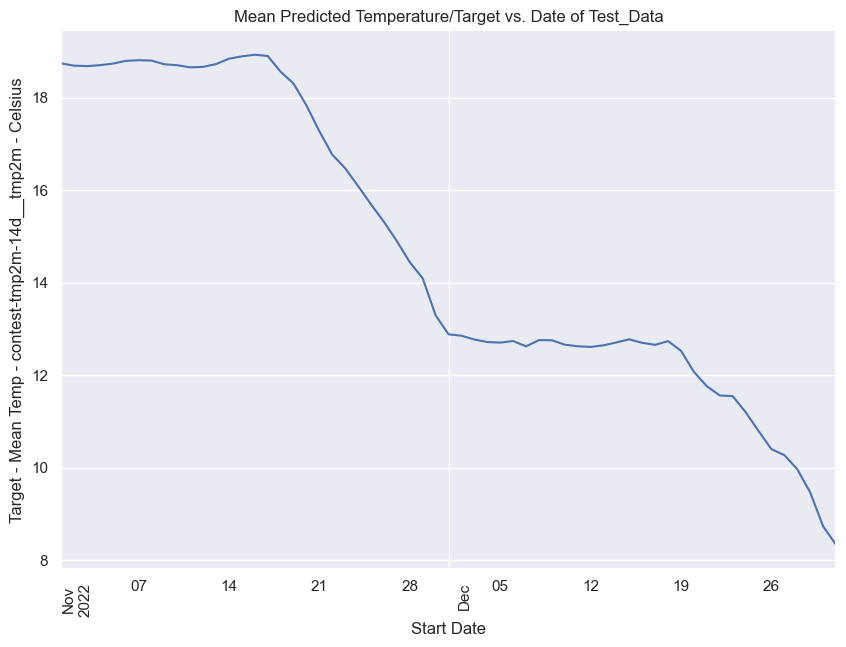

In [211]:
#Visualize mean daily prediction temps over startdate
plt.figure()
submission.groupby(by=['startdate']).mean()['Predictions'].plot()
plt.title('Mean Predicted Temperature/Target vs. Date of Test_Data')
plt.ylabel('Target - Mean Temp - contest-tmp2m-14d__tmp2m - Celsius')
plt.xlabel('Start Date')
plt.xticks(rotation=90)
plt.show()

These temps look reasonable and we will proceed with the submission. 

In [212]:
# Rename predictions to target variable as in sample solution from WiDS
submission = submission.rename(columns = {'Predictions':'contest-tmp2m-14d__tmp2m'})

In [215]:
# Drop start date to match sample solution
submission = submission.drop(['startdate'], axis = 1)

In [216]:
# Check
submission

,contest-tmp2m-14d__tmp2m,Index
0,28.385288,375734
1,28.325583,375735
2,28.530644,375736
3,28.483178,375737
4,28.648197,375738
...,...,...
31349,3.478709,407083
31350,3.660469,407084
31351,3.361483,407085
31352,2.882080,407086


In [173]:
# Read in sample solution to compare format
sample_solution = pd.read_csv('data/sample_solution.csv')

In [174]:
# Check - Our submission is in the same format as the sample solution. 
sample_solution

,contest-tmp2m-14d__tmp2m,index
0,27.073876,375734
1,25.109308,375735
2,22.557390,375736
3,25.572875,375737
4,20.781073,375738
...,...,...
31349,28.303967,407083
31350,26.635933,407084
31351,27.057762,407085
31352,26.871066,407086


In [218]:
#Export Submission
submission.to_csv('data/submission_mack.csv', index=False)

In [219]:
#Export time_test_data
time_test_data.to_csv('data/time_test_data_clean.csv', index=False)

# Notebook 2 Conclusion
Workflow Initial MLPRegressor --> MLPRegressor Optimization --> MLPR vs. RFR Comparison--> RFR Baseline WiDS Submission

We have refined our ability to prepare and evaluate models in this notebook.  We adopted a data reduction strategy to reduce each parameter's data type to minimize memory load and run times. We determined that the regressor models have quicker run times on my local machine over Google Collab.  We can look into other methods of running cloud-based models such as AWS if run times becoming a major in inhibition to advancement.  

My task as part of my WiDS team was to evaluate the Random Forest Regressor and Multi-layer Perceptron Regressor models. Both models have proven effective in predictive regression time series modeling.  

After optimizing the MLPRegressor, we see that the Random Forest Regressor optimized in Notebook 1 achieved better scoring metrics.  We wanted to make sure to get in a submission to WiDS to establish our baseline and know that we could properly format a submission.

After fitting our optimized RFR with the full `training_data` from WiDS, we ran the WiDS `test_data` through the RFR model to gain predictions for our baseline submission.  We successfully made the submission to the WiDS Kaggle site.  WiDS evaluated our predictions on the actual target mean temperatures and we scored a root mean squared error of 1.91 degrees celsius.  This gives us a good baseline, and we will feel confident formatting submissions in the future. 

We will need to carry out a variety of steps in successive notebooks to achieve better results. 

**Next Steps**
- Feature engineering
    - We will research steps to boost the predictive power of our features.
- More comprehensive model evaluation
    - We will need to extend our grid searches to other regression models.  
